<a href="https://colab.research.google.com/github/Alekol1970/ai_society_simulations/blob/main/notebooks/figures/ai_society_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Шаг 1.1  Установим библиотеки
!pip -q install scipy wget seaborn

# Шаг 1.2  Импорт
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, zipfile, wget, io
from scipy.optimize import curve_fit
plt.style.use('default')        # без задания цветов


  Preparing metadata (setup.py) ... done


In [ ]:
DATA_DIR = '/content/drive/MyDrive/ai_data'
import glob, os
print("Содержимое папки:", glob.glob(os.path.join(DATA_DIR, '*')))


Содержимое папки: ['/content/drive/MyDrive/ai_data/SIPRI-Milex-data-1949-2024_2.xlsx', '/content/drive/MyDrive/ai_data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip', '/content/drive/MyDrive/ai_data/API_VC.IHR.PSRC.P5_DS2_en_csv_v2_86583.zip', '/content/drive/MyDrive/ai_data/share-of-individuals-using-the-internet.zip']


In [ ]:
import zipfile, pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

zip_path = f"{DATA_DIR}/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip"

# внутри ZIP ищем единственный CSV, который начинается на 'API_'
with zipfile.ZipFile(zip_path) as z:
    inner_csv = [n for n in z.namelist() if n.startswith('API_') and n.endswith('.csv')][0]
    tel_df = pd.read_csv(z.open(inner_csv), skiprows=4)

world_tel = (
    tel_df[tel_df['Country Name']=='World']
      .loc[:, '1960':'2023']
      .T.reset_index()
)
world_tel.columns = ['Year','Penetration']
world_tel['Year'] = world_tel['Year'].astype(int)
world_tel.dropna(inplace=True)


In [ ]:
import zipfile

# архив share-of-individuals… тоже распакуем
net_zip = f"{DATA_DIR}/share-of-individuals-using-the-internet.zip"
with zipfile.ZipFile(net_zip) as z:
    net_csv = [n for n in z.namelist() if n.endswith('.csv')][0]
    net_df  = pd.read_csv(z.open(net_csv))

world_net = net_df[net_df.Entity=='World'][['Year','share-of-individuals-using-the-internet']]
world_net.columns = ['Year','Penetration']


KeyError: "['share-of-individuals-using-the-internet'] not in index"

# Новый раздел

In [ ]:
import zipfile, pandas as pd, textwrap, os

net_zip = f"{DATA_DIR}/share-of-individuals-using-the-internet.zip"
with zipfile.ZipFile(net_zip) as z:
    net_csv = [n for n in z.namelist() if n.endswith('.csv')][0]
    net_df  = pd.read_csv(z.open(net_csv))

print("Колонки:", list(net_df.columns)[:10])   # выведем первые 10 имён
print(textwrap.dedent(net_df.head().to_string()[:600]))


Колонки: ['Entity', 'Code', 'Year', 'Individuals using the Internet (% of population)']
        Entity Code  Year  Individuals using the Internet (% of population)
0  Afghanistan  AFG  1990                                               0.0
1  Afghanistan  AFG  1991                                               0.0
2  Afghanistan  AFG  1992                                               0.0
3  Afghanistan  AFG  1993                                               0.0
4  Afghanistan  AFG  1994                                               0.0


In [ ]:
col_name = 'Individuals using the Internet (% of population)'
world_net = net_df[net_df['Entity']=='World'][['Year', col_name]].copy()
world_net.columns = ['Year', 'Penetration']


      Year  Penetration
7053  1990     0.048825
7054  1991     0.078811
7055  1992     0.125186
7056  1993     0.179007
7057  1994     0.360508


<Axes: xlabel='Year'>

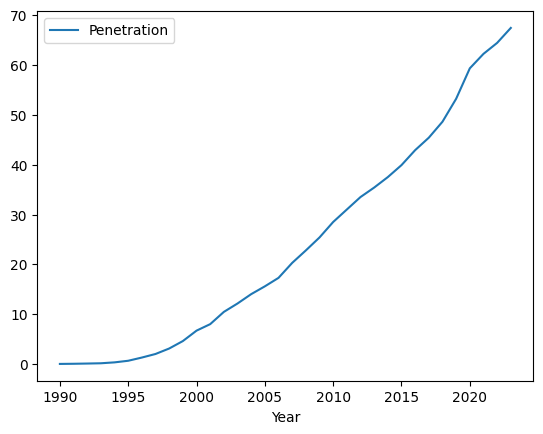

In [ ]:
print(world_net.head())
world_net.plot(x='Year', y='Penetration')


In [ ]:
from scipy.optimize import curve_fit
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))
x = world_net['Year'].values
y = world_net['Penetration'].values
popt, _ = curve_fit(logistic, x, y, p0=[100, .25, 2010])
K, r, t0 = popt
print(f"asymptote ≈{K:.1f}%  growth_rate ≈{r:.3f}  midpoint ≈{t0:.1f}")


asymptote ≈85.0%  growth_rate ≈0.156  midpoint ≈2015.2


Text(0.5, 1.0, 'Global internet diffusion')

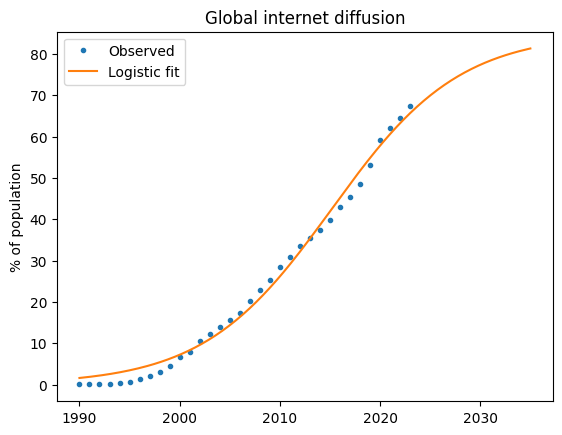

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, '.', label='Observed')
xx = np.linspace(x.min(), 2035, 200)
plt.plot(xx, logistic(xx,*popt), label='Logistic fit')
plt.legend(); plt.ylabel('% of population'); plt.title('Global internet diffusion')


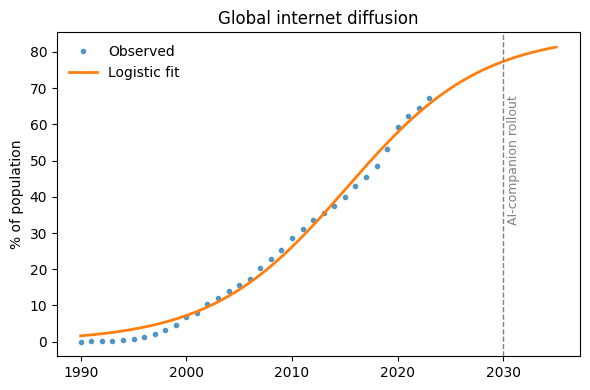

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# world_net уже есть ( Year | Penetration )
x = world_net['Year'].values
y = world_net['Penetration'].values

def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

popt, _ = curve_fit(logistic, x, y, p0=[100, .25, 2010])

# ---------- ГРАФИК -----------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx, *popt), label='Logistic fit', lw=2, color='tab:orange')

# вертикальная линия внутри той же фигуры
pivot_year = 2030
plt.axvline(pivot_year, ls='--', color='grey', lw=1)
plt.text(pivot_year+0.3, 50, 'AI-companion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('% of population')
plt.title('Global internet diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/ai_data/fig4_internet_logistic.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# === 0. Проверяем, нужно ли монтировать диск =========================
from pathlib import Path

MOUNTPOINT = Path("/content/drive")
if not MOUNTPOINT.exists():
    # ещё не смонтирован — делаем mount
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Google Drive уже смонтирован")

# остальной код без изменений -------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, zipfile
from scipy.optimize import curve_fit

DATA_DIR = "/content/drive/MyDrive/ai_data"
WB_FILE  = os.path.join(DATA_DIR,
                        "API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip")  # ← ваш файл

# --- 1. Чтение ZIP/CSV --------------------------------------
if WB_FILE.lower().endswith('.zip'):
    with zipfile.ZipFile(WB_FILE) as z:
        csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
        df = pd.read_csv(z.open(csv_name), skiprows=4)
else:
    df = pd.read_csv(WB_FILE, skiprows=4)

# --- 2. Строка World ---------------------------------------
row = df.loc[df['Country Name'] == 'World'].iloc[0]
year_cols = [c for c in df.columns if c.isdigit()]
series    = row[year_cols].dropna().astype(float)

world_mob = (series
             .rename_axis('Year')
             .reset_index(name='Subscriptions'))
world_mob['Year'] = world_mob['Year'].astype(int)

# --- 3. Логистическая подгонка ------------------------------
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

x, y  = world_mob['Year'].values, world_mob['Subscriptions'].values
popt, _ = curve_fit(logistic, x, y, p0=[130, .25, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Fit: K={K:.1f}, r={r:.3f}, t0≈{t0:.0f}")

# --- 4. График ----------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx,*popt), lw=2, label='Logistic fit', color='tab:orange')

plt.axvline(2030, ls='--', color='grey')
plt.text(2030+0.5, 110, 'AI–companion rollout', rotation=90,
         va='center', color='grey', fontsize=9)

plt.ylabel('Subscriptions per 100 people')
plt.title('Global mobile-cellular diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

out_png = os.path.join(DATA_DIR, "fig3_mobile_logistic.png")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.show()

print("Saved to:", out_png)


Google Drive уже смонтирован


EmptyDataError: No columns to parse from file

In [ ]:
import zipfile, itertools

with zipfile.ZipFile(WB_FILE) as z:
    print("Содержимое ZIP:")
    for n in z.namelist():
        print(" •", n)
    csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
    print("\nПервые 8 строк файла", csv_name, ":\n")
    preview = z.open(csv_name).read().decode('utf-8', errors='replace').splitlines()[:8]
    for ln in preview:
        print(ln)


Содержимое ZIP:
 • Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 • API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 • Metadata_Country_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv

Первые 8 строк файла Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv :

﻿"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"IT.CEL.SETS.P2","Mobile cellular subscriptions (per 100 people)","Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology. The indicator includes (and is split into) the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months). The indicator applies to all mobile cellular subscriptions that offer voice communications. It excludes subscriptions via data cards or USB modems, subscriptions to public mobile data services, private trunked mobile radio, telepoint, radio paging an

In [ ]:
def read_worldbank_csv(path):
    """Читать CSV или ZIP с данными World Bank.
       Автоматически определяет, нужно ли skiprows."""
    import io, zipfile, pandas as pd, itertools

    # --- извлекаем bytes ---------------------------------
    if path.lower().endswith('.zip'):
        with zipfile.ZipFile(path) as z:
            csv_name = [n for n in z.namelist() if n.endswith('.csv')][0]
            raw = z.open(csv_name).read()
    else:
        raw = open(path, 'rb').read()

    # --- смотрим первые 5 строк --------------------------
    head = raw.decode('utf-8', errors='replace').splitlines()[:5]
    need_skip = all(len(s.split(',')) <= 2 for s in head)  # метаданные
    skip = 4 if need_skip else 0

    df = pd.read_csv(io.BytesIO(raw), skiprows=skip)
    return df

df = read_worldbank_csv(WB_FILE)
print("Колонки:", df.columns[:6])


Колонки: Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')


In [ ]:
import zipfile
import pandas as pd

WB_FILE = '/content/drive/MyDrive/ai_data/API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.zip'

with zipfile.ZipFile(WB_FILE) as z:
    # Покажем список всех файлов
    all_files = z.namelist()
    print("Файлы в архиве:")
    for f in all_files:
        print(" -", f)

    # Найдём первый CSV, который не metadata
    csv_name = next(f for f in all_files if f.endswith('.csv') and 'Metadata' not in f)

    # Покажем имя файла
    print("\nЧитаем файл:", csv_name)

    # Пропустим 4 заголовочных строки
    df = pd.read_csv(z.open(csv_name), skiprows=4)

df.head()


Файлы в архиве:
 - Metadata_Indicator_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 - API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv
 - Metadata_Country_API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv

Читаем файл: API_IT.CEL.SETS.P2_DS2_en_csv_v2_88708.csv


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,132.466508,132.288784,132.349628,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,63.600000,63.500000,65.200000,67.900000,70.300000,74.700000,77.700000,81.3,NaN,NaN
2,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,62.371096,67.136415,59.902648,59.783879,58.190214,56.554435,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,82.900000,81.400000,87.800000,91.300000,96.700000,95.000000,102.100000,100.8,NaN,NaN
4,Angola,AGO,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,44.593508,44.106445,42.490949,45.837741,43.810091,44.423732,67.373474,NaN,NaN,NaN


In [ ]:
# --- 2. Извлекаем строку "World" из таблицы df -------------------

# Найдём нужную строку
world_row = df[df['Country Name'] == 'World'].iloc[0]

# Вытащим все колонки-годовые значения (например, '1960', '1961', ..., '2024')
year_cols = [col for col in df.columns if col.isdigit()]

# Построим DataFrame Year | Subscriptions
world_mob = (
    world_row[year_cols]
    .dropna()  # убираем пустые значения
    .rename_axis('Year')
    .reset_index(name='Subscriptions')
)

world_mob['Year'] = world_mob['Year'].astype(int)
world_mob['Subscriptions'] = world_mob['Subscriptions'].astype(float)

print(world_mob.tail())


    Year  Subscriptions
47  2019          105.9
48  2020          105.5
49  2021          107.4
50  2022          108.1
51  2023          110.6


Аппроксимация: K=108.4, r=0.309, t0≈2007


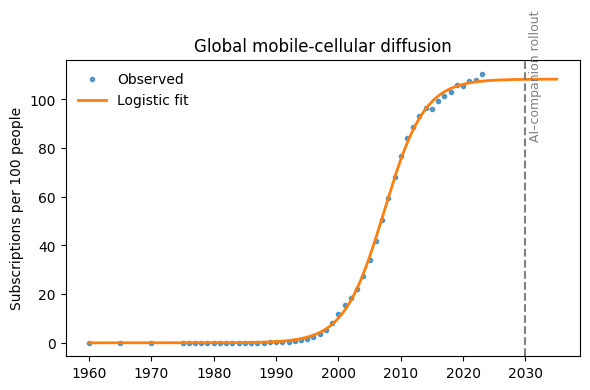

Сохранено как: /content/drive/MyDrive/ai_data/fig3_mobile_logistic.png


In [ ]:
# --- 3. Логистическая аппроксимация ------------------------------
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import os

def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r*(t - t0)))

x = world_mob['Year'].values
y = world_mob['Subscriptions'].values
popt, _ = curve_fit(logistic, x, y, p0=[130, .25, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Аппроксимация: K={K:.1f}, r={r:.3f}, t0≈{t0:.0f}")

# --- 4. Строим и сохраняем график --------------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)

xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx,*popt), lw=2, label='Logistic fit', color='tab:orange')

pivot = 2030
plt.axvline(pivot, ls='--', color='grey')
plt.text(pivot+0.5, 110, 'AI–companion rollout', rotation=90,
         va='center', color='grey', fontsize=9)

plt.ylabel('Subscriptions per 100 people')
plt.title('Global mobile-cellular diffusion')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

out_png = os.path.join(DATA_DIR, "fig3_mobile_logistic.png")
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.show()

print("Сохранено как:", out_png)


In [ ]:
# --- 0. Импорт ----------------------------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
from scipy.optimize import curve_fit

DATA_DIR = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# --- 1. Читаем без заголовков, начиная с правильной строки ------
df = pd.read_excel(XLSX_FILE, sheet_name="Regional totals", skiprows=10, header=None)

# Первая колонка — названия регионов (включая 'World')
region_col = df.iloc[:, 0]
year_cols = df.columns[1:]

# Ищем строку 'World'
world_row = df[region_col == 'World'].iloc[0]

# Строим DataFrame Year | Spending
world_mil = (
    pd.DataFrame({
        'Year': [int(y) for y in year_cols if isinstance(y, (int, float))],
        'Spending': [world_row[y] for y in year_cols if isinstance(y, (int, float))]
    }).dropna()
)

# --- 2. Строим таблицу Year | Spending -----------------------------
world_mil = pd.DataFrame({
    'Year': [int(y) for y in year_cols if isinstance(y, (int, float))],
    'Spending': pd.to_numeric([world_row[y] for y in year_cols if isinstance(y, (int, float))],
                              errors='coerce')
}).dropna()

world_mil['Year'] = world_mil['Year'].astype(int)
world_mil['Spending'] = world_mil['Spending'].astype(float)

popt, _ = curve_fit(logistic, x, y, p0=[y.max()*1.2, 0.1, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Аппроксимация: K={K:.1f}, r={r:.3f}, t0≈{t0:.1f}")

# --- 3. Рис. 5a — логистическая кривая ----------------------------
plt.figure(figsize=(6,4))
plt.plot(x, y, '.', label='Observed', alpha=.7)

xx = np.linspace(x.min(), 2035, 300)
plt.plot(xx, logistic(xx, *popt), lw=2, label='Logistic fit', color='tab:orange')

plt.axvline(2030, ls='--', color='grey')
plt.text(2031, y.max()*0.8, 'AI–companion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('Military spending (USD billions)')
plt.title('Global military expenditure')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

fig1_path = os.path.join(DATA_DIR, "fig5a_military_logistic.png")
plt.savefig(fig1_path, dpi=300, bbox_inches='tight')
plt.show()
print("Сохранено:", fig1_path)

# --- 4. Перераспределение 20 % ------------------------------------
world_mil['AI'] = world_mil['Spending'] * 0.20
world_mil['Military (80%)'] = world_mil['Spending'] * 0.80

# --- 5. Рис. 5b — стек-график -------------------------------------
plt.figure(figsize=(6,4))
plt.stackplot(world_mil['Year'],
              world_mil['Military (80%)'],
              world_mil['AI'],
              labels=['Military (80%)', 'Reallocated to AI (20%)'],
              colors=['#1f77b4', '#ff7f0e'],
              alpha=0.85)

plt.axvline(2030, ls='--', color='grey')
plt.text(2031, y.max()*0.6, 'AI–companion rollout', rotation=90,
         va='center', fontsize=9, color='grey')

plt.ylabel('Spending (USD billions)')
plt.title('Reallocation: 20 % military to AI')
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

fig2_path = os.path.join(DATA_DIR, "fig5b_reallocation_stack.png")
plt.savefig(fig2_path, dpi=300, bbox_inches='tight')
plt.show()
print("Сохранено:", fig2_path)


NameError: name 'logistic' is not defined

In [ ]:
# --- Сценарии роста после 2030 ----------------------------------
# Базовые значения
df = world_mil[world_mil['Year'] >= 2030].copy()
years = df['Year'].values
base_ai = df['AI'].values

# Сценарии:
slow_ai = base_ai * 0.75  # сдержанный: -25%
fast_ai = base_ai * 1.25  # ускоренный: +25%

# Кумулятивный бюджет
slow_cum = slow_ai.cumsum()
fast_cum = fast_ai.cumsum()

# Год достижения $700B
target = 700
slow_year = years[np.argmax(slow_cum >= target)] if any(slow_cum >= target) else None
fast_year = years[np.argmax(fast_cum >= target)] if any(fast_cum >= target) else None

# --- Построение графика -----------------------------------------
plt.figure(figsize=(7,5))

plt.plot(years, slow_cum, label='Сдержанный сценарий', color='tab:red', lw=2)
plt.plot(years, fast_cum, label='Ускоренный сценарий', color='tab:blue', lw=2)
plt.axhline(target, ls='--', color='grey', label='$700 млрд (1B пользователей)')

# Метки годов достижения
if slow_year:
    plt.axvline(slow_year, ls=':', color='tab:red')
    plt.text(slow_year + 0.2, target * 0.6,
             f'{slow_year}', rotation=90, color='tab:red', fontsize=9)
if fast_year:
    plt.axvline(fast_year, ls=':', color='tab:blue')
    plt.text(fast_year + 0.2, target * 0.4,
             f'{fast_year}', rotation=90, color='tab:blue', fontsize=9)

plt.title('Накопление AI-бюджета: два сценария')
plt.xlabel('Год')
plt.ylabel('Кумулятивный бюджет, млрд $')
plt.grid(True, ls=':')
plt.legend()
plt.tight_layout()

fig_path = os.path.join(DATA_DIR, 'fig5c_scenarios.png')
plt.savefig(fig_path, dpi=300)
plt.show()

print("✅ Сохранено:", fig_path)
if slow_year and fast_year:
    print(f"🟥 Сдержанный сценарий: точка $700B в {slow_year} году")
    print(f"🟦 Ускоренный сценарий: точка $700B в {fast_year} году")


NameError: name 'world_mil' is not defined

,Users (billion),AI Costs (trillion $),"Savings (realistic), trillion $","Savings (stress scenario), trillion $",Net (realistic),Net (stress scenario)
0,0.5,0.35,1.34,0.73,0.99,0.38
1,1.0,0.70,1.34,0.73,0.64,0.03
2,2.0,1.40,1.34,0.73,-0.06,-0.67
3,3.0,2.10,1.34,0.73,-0.76,-1.37
4,4.0,2.80,1.34,0.73,-1.46,-2.07
5,5.0,3.50,1.34,0.73,-2.16,-2.77


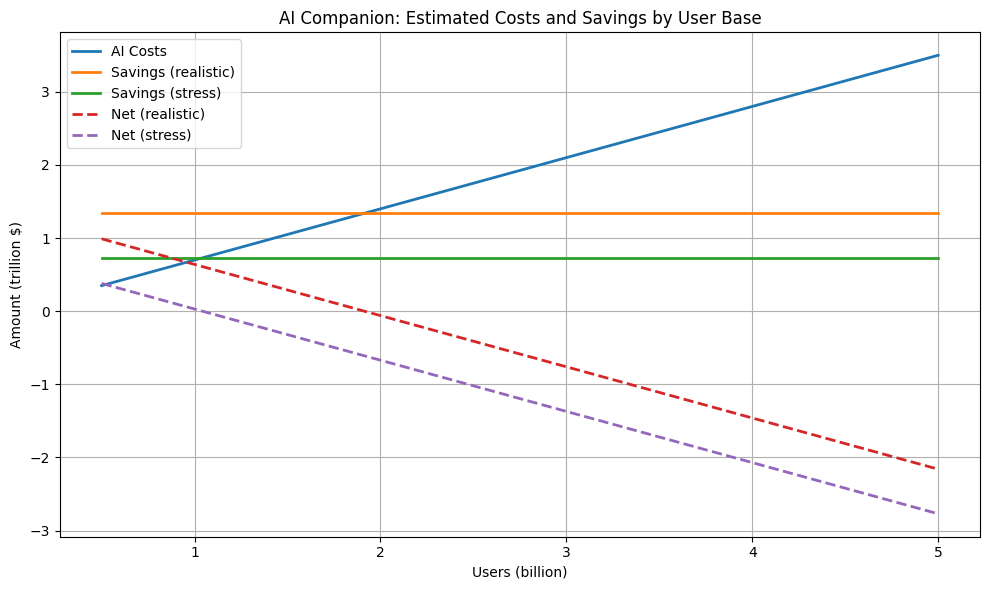

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Данные: расчёт затрат и экономии при разных сценариях -------------
categories = {
    "Military": {"total": 2.7, "save_low": 0.20, "save_high": 0.10},
    "Healthcare": {"total": 9.0, "save_low": 0.05, "save_high": 0.03},
    "Police & Justice": {"total": 2.0, "save_low": 0.10, "save_high": 0.05},
    "Welfare & Social Losses": {"total": 3.0, "save_low": 0.05, "save_high": 0.03}
}

cost_per_user = 700  # annual cost per user in USD
user_range = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0]

rows = []
for users in user_range:
    annual_cost = users * 1e9 * cost_per_user / 1e12  # триллионы $
    save_realistic = sum(v["total"] * v["save_low"] for v in categories.values())
    save_stress = sum(v["total"] * v["save_high"] for v in categories.values())
    net_realistic = save_realistic - annual_cost
    net_stress = save_stress - annual_cost
    rows.append({
        "Users (billion)": users,
        "AI Costs (trillion $)": round(annual_cost, 2),
        "Savings (realistic), trillion $": round(save_realistic, 2),
        "Savings (stress scenario), trillion $": round(save_stress, 2),
        "Net (realistic)": round(net_realistic, 2),
        "Net (stress scenario)": round(net_stress, 2)
    })

df = pd.DataFrame(rows)
display(df)

# --- График -------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df["Users (billion)"], df["AI Costs (trillion $)"], label="AI Costs", linewidth=2)
plt.plot(df["Users (billion)"], df["Savings (realistic), trillion $"], label="Savings (realistic)", linewidth=2)
plt.plot(df["Users (billion)"], df["Savings (stress scenario), trillion $"], label="Savings (stress)", linewidth=2)
plt.plot(df["Users (billion)"], df["Net (realistic)"], label="Net (realistic)", linestyle='--', linewidth=2)
plt.plot(df["Users (billion)"], df["Net (stress scenario)"], label="Net (stress)", linestyle='--', linewidth=2)

plt.title("AI Companion: Estimated Costs and Savings by User Base")
plt.xlabel("Users (billion)")
plt.ylabel("Amount (trillion $)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


,Users (billion),AI Costs (trillion $),"Savings (realistic), trillion $","Savings (stress), trillion $",Net (realistic),Net (stress)
0,0.5,0.35,1.34,0.73,0.99,0.38
1,1.0,0.70,1.34,0.73,0.64,0.03
2,2.0,1.40,1.34,0.73,-0.06,-0.67
3,3.0,2.10,1.34,0.73,-0.76,-1.37
4,4.0,2.80,1.34,0.73,-1.46,-2.07
5,5.0,3.50,1.34,0.73,-2.16,-2.77


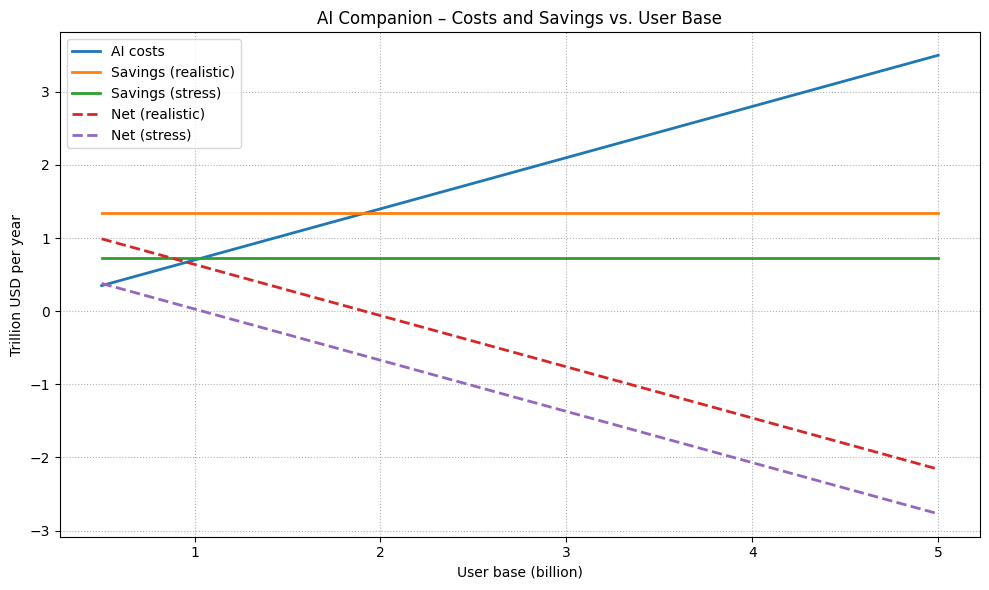

Saved: ai_companion_cost_benefit.csv and ai_companion_cost_savings_graph.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- PARAMETERS (edit if you tweak assumptions) -----------------
categories = {
    "Military":   {"total": 2.7, "save_low": .20, "save_high": .10},
    "Healthcare": {"total": 9.0, "save_low": .05, "save_high": .03},
    "Police & Justice": {"total": 2.0, "save_low": .10, "save_high": .05},
    "Welfare & Social Losses": {"total": 3.0, "save_low": .05, "save_high": .03},
}
cost_per_user = 700                    # USD/year
user_range    = [0.5, 1, 2, 3, 4, 5]   # billion persons

# --- TABLE -------------------------------------------------------
rows = []
for u in user_range:
    ai_cost = u * 1e9 * cost_per_user / 1e12          # → trillion $
    save_real = sum(v["total"]*v["save_low"]  for v in categories.values())
    save_stress = sum(v["total"]*v["save_high"] for v in categories.values())
    rows.append({
        "Users (billion)": u,
        "AI Costs (trillion $)": round(ai_cost, 2),
        "Savings (realistic), trillion $": round(save_real, 2),
        "Savings (stress), trillion $":   round(save_stress, 2),
        "Net (realistic)":  round(save_real  - ai_cost, 2),
        "Net (stress)":     round(save_stress - ai_cost, 2),
    })
df = pd.DataFrame(rows)
df.to_csv("ai_companion_cost_benefit.csv", index=False)
display(df)

# --- FIGURE ------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(df["Users (billion)"], df["AI Costs (trillion $)"],         label="AI costs", lw=2)
plt.plot(df["Users (billion)"], df["Savings (realistic), trillion $"], label="Savings (realistic)", lw=2)
plt.plot(df["Users (billion)"], df["Savings (stress), trillion $"],   label="Savings (stress)", lw=2)
plt.plot(df["Users (billion)"], df["Net (realistic)"],  '--', label="Net (realistic)", lw=2)
plt.plot(df["Users (billion)"], df["Net (stress)"],     '--', label="Net (stress)",    lw=2)
plt.title("AI Companion – Costs and Savings vs. User Base")
plt.xlabel("User base (billion)")
plt.ylabel("Trillion USD per year")
plt.grid(ls=":")
plt.legend()
plt.tight_layout()
plt.savefig("ai_companion_cost_savings_graph.png", dpi=300)
plt.show()
print("Saved: ai_companion_cost_benefit.csv and ai_companion_cost_savings_graph.png")


Сохранено: /content/fig6_polarisation_risk_real.png


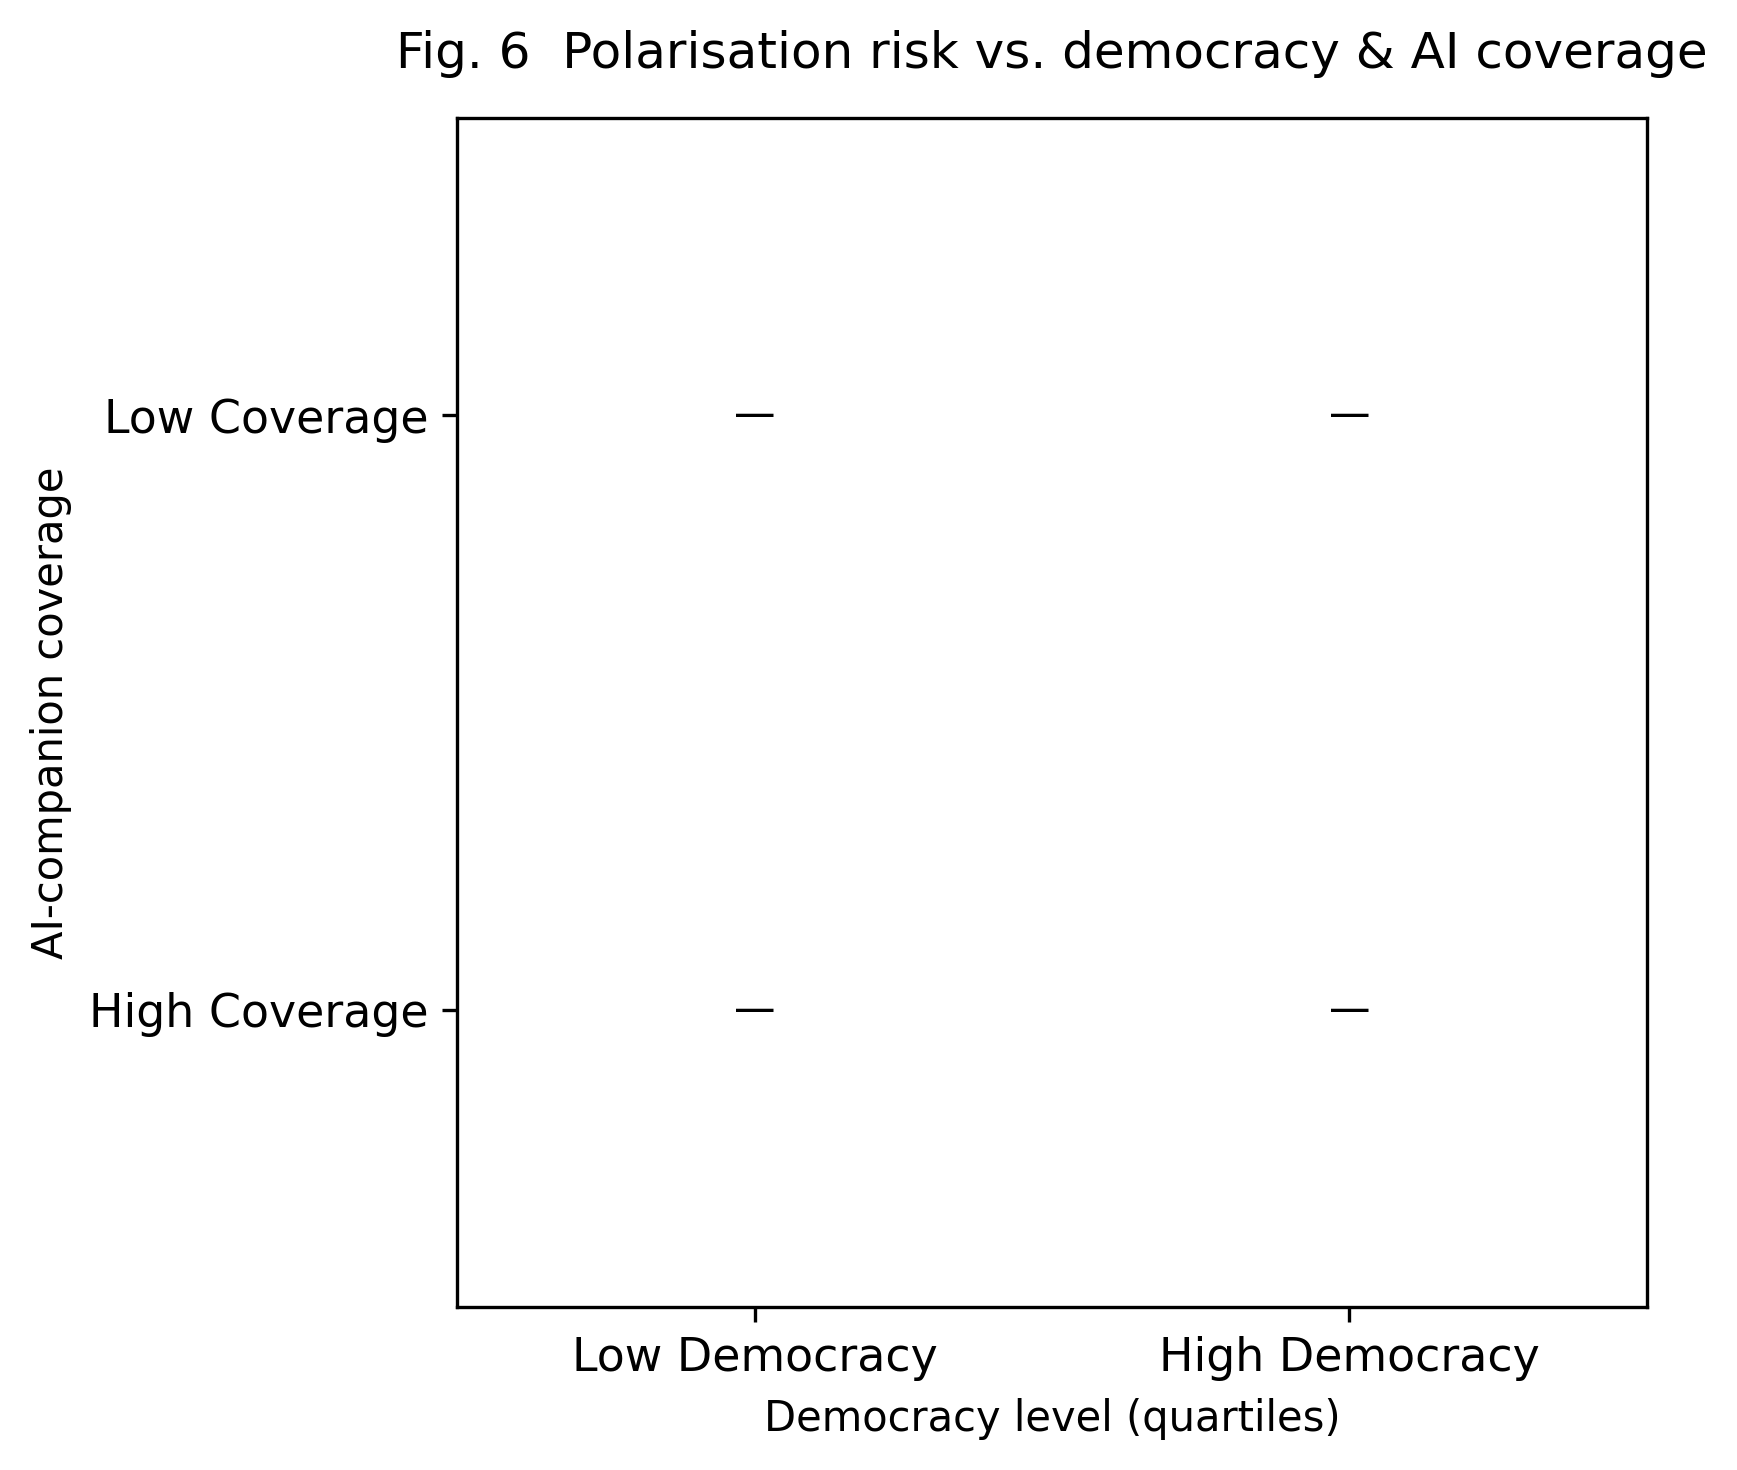

In [ ]:
# =========================================================
# Figure 6 – Polarisation risk vs. democracy & AI coverage
# =========================================================
import zipfile, io, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path, PurePath

# --- 0. Путь к данным -------------------------------------------------------
DATA_DIR = Path("/content/drive/MyDrive/ai_data")

# --- 1. Универсальная функция чтения World Bank ----------------------------
def load_wdi_zip(zip_file):
    """
    Читает главный CSV из архива World Bank (любой схемы имен),
    обрезая все строки-метаданные ДО строки с 'Country Name'.
    """
    with zipfile.ZipFile(DATA_DIR / zip_file) as z:
        # a) старая схема — *_Data.csv
        data_files = [n for n in z.namelist() if n.lower().endswith("_data.csv")]
        # b) новая схема — API_...csv (без 'Metadata')
        if not data_files:
            data_files = [n for n in z.namelist()
                          if n.lower().startswith("api_") and
                             n.lower().endswith(".csv") and
                             "metadata" not in n.lower()]
        if not data_files:
            raise FileNotFoundError(f"Основной CSV не найден в {zip_file}")
        csv_name = data_files[0]

        raw_lines = z.read(csv_name).decode("utf-8-sig").splitlines()
        header_idx = next(
            (i for i, line in enumerate(raw_lines)
             if "Country Name" in line and "Country Code" in line),
            0  # если метаданных нет
        )
        return pd.read_csv(io.StringIO("\n".join(raw_lines[header_idx:])))

# --- 2. Internet users (последний доступный год) ----------------------------
internet = load_wdi_zip("API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip")
year_cols = sorted([c for c in internet.columns if c.isdigit()], key=int)
latest_year = year_cols[-1]          # обычно 2022 или 2023
internet_use = (internet[["Country Name", latest_year]]
                .rename(columns={"Country Name": "country_name",
                                 latest_year:    "internet_pct"}))

# --- 3. Digital Adoption Index ---------------------------------------------
dai = pd.read_excel(DATA_DIR / "DAIforweb.xlsx")
dai_latest = (dai.sort_values("Year")
                 .groupby("country", as_index=False).last()
                 .rename(columns={"country": "country_name",
                                  "Digital Adoption Index": "digital_idx"}))

# --- 4. Расчёт тех-потолка и coverage --------------------------------------
df_cov = internet_use.merge(dai_latest, on="country_name", how="left")
df_cov["digital_idx"] = df_cov["digital_idx"].fillna(df_cov["internet_pct"] / 100)

df_cov["tech_cap"] = np.minimum(df_cov["internet_pct"],
                                df_cov["digital_idx"] * 100)

S_LOW, S_HIGH = 0.60, 0.80           # сценарии к 2035 г.
df_cov["coverage_low"]  = df_cov["tech_cap"] * S_LOW
df_cov["coverage_high"] = df_cov["tech_cap"] * S_HIGH
df_cov["coverage_cat"]  = np.where(df_cov["coverage_low"] >= 40,
                                   "High Coverage", "Low Coverage")

# --- 5. V-Dem 2023 (либерал. демократия & поляризация) ----------------------
with zipfile.ZipFile(DATA_DIR / "V-Dem-CY-FullOthers_csv_v13.zip") as z:
    vdem_csv = "V-Dem-CY-Full+Others-v13.csv"
    cols = ["country_name", "year", "v2x_libdem", "v2psprlnks"]
    vdem = (pd.read_csv(z.open(vdem_csv), usecols=cols)
              .query("year == 2023")
              .dropna(subset=["v2x_libdem"]))

q25, q75 = vdem["v2x_libdem"].quantile([.25, .75])
vdem["democracy_cat"] = np.select(
    [vdem["v2x_libdem"] < q25,
     vdem["v2x_libdem"] > q75],
    ["Low Democracy", "High Democracy"],
    default="Mid"
)

# --- 6. Сводная таблица -----------------------------------------------------
latest = (df_cov.merge(vdem, on="country_name", how="inner")
                 .dropna(subset=["v2psprlnks"]))
latest = latest[latest["democracy_cat"].isin(["Low Democracy", "High Democracy"])]

# --- 7. Матрица 2×2 ---------------------------------------------------------
pivot = (latest
         .groupby(["coverage_cat", "democracy_cat"])["v2psprlnks"]
         .mean()
         .unstack("democracy_cat")
         .reindex(index=["Low Coverage", "High Coverage"],
                  columns=["Low Democracy", "High Democracy"]))

# --- 8. График --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd")
ax.set_xticks(range(2)); ax.set_xticklabels(pivot.columns, fontsize=11)
ax.set_yticks(range(2)); ax.set_yticklabels(pivot.index,  fontsize=11)
ax.set_xlabel("Democracy level (quartiles)")
ax.set_ylabel("AI-companion coverage")
plt.title("Fig. 6  Polarisation risk vs. democracy & AI coverage", pad=12)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i, j]
        ax.text(j, i, f"{val:.2f}" if pd.notna(val) else "—",
                ha="center", va="center", fontsize=10)

plt.tight_layout()
out = Path("/content/fig6_polarisation_risk_real.png")
plt.savefig(out, bbox_inches="tight")
print("Сохранено:", out)



>> Всего стран в df_cov: 254
coverage_cat
High Coverage      7
Low Coverage     247
Name: iso3, dtype: int64 

ISO-коды High Coverage (первые 15): ['AUT' 'DEU' 'DNK' 'HUN' 'LUX' 'SVK' 'TUR'] 

Всего стран в V-Dem 2023 с поляризацией: 179
∩  пересечение High Coverage ∧ V-Dem: 7 ISO
 ['AUT' 'DEU' 'DNK' 'HUN' 'LUX' 'SVK' 'TUR']

∩  пересечение Low Coverage ∧ V-Dem: 168
Диагностика (кол-во стран в каждой клетке):
 democracy_cat  Low Democracy  High Democracy
coverage_cat                                
Low Coverage              42              39
High Coverage              1               5 

Файл сохранён: /content/fig6_polarisation_risk_real.png


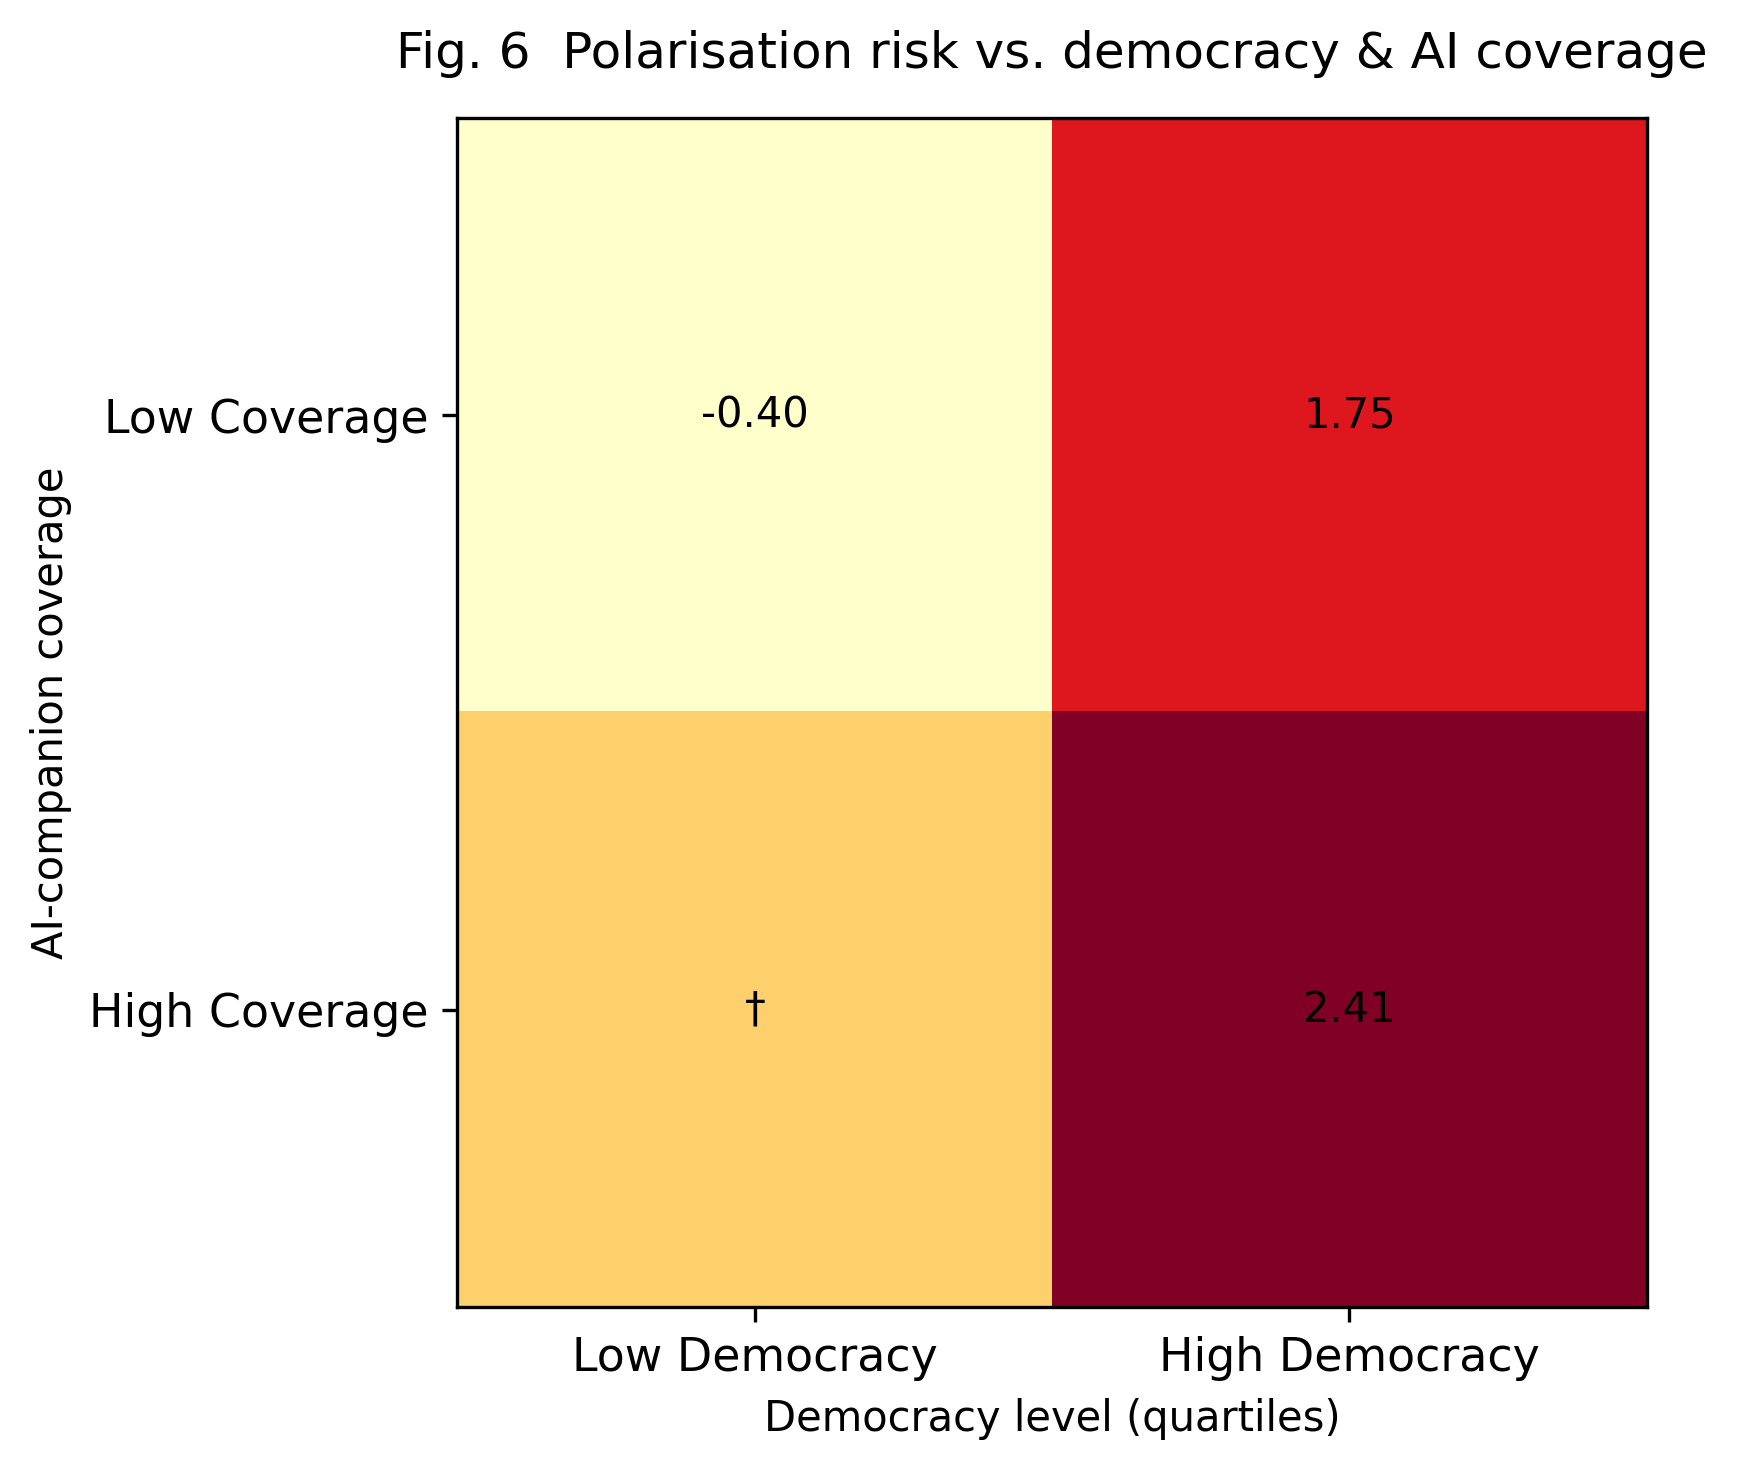

In [ ]:
# =============================================================
# Fig. 6 — Polarisation risk vs. democracy & AI coverage
# =============================================================
import zipfile, io, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("/content/drive/MyDrive/ai_data")           # ← ваша папка на Drive

# -------------------------------------------------------------
# 1. Утилита чтения ZIP World Bank (ищет *_Data.csv ИЛИ API_*.csv)
# -------------------------------------------------------------
def load_wdi_zip(zip_name):
    with zipfile.ZipFile(DATA_DIR / zip_name) as z:
        files = [n for n in z.namelist() if n.lower().endswith("_data.csv")]
        if not files:
            files = [n for n in z.namelist()
                     if n.lower().startswith("api_") and
                        n.lower().endswith(".csv") and
                        "metadata" not in n.lower()]
        csv_name = files[0]

        raw = z.read(csv_name).decode("utf-8-sig").splitlines()
        header_idx = next(i for i, ln in enumerate(raw)
                          if "Country Name" in ln and "Country Code" in ln)
        return pd.read_csv(io.StringIO("\n".join(raw[header_idx:])))

# -------------------------------------------------------------
# 2. Интернет-проникновение + ISO-код
# -------------------------------------------------------------
internet = load_wdi_zip("API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip")
year_cols = sorted([c for c in internet.columns if c.isdigit()], key=int)
LATEST = year_cols[-1]                                # напр. 2022

internet_use = (internet[["Country Name", "Country Code", LATEST]]
                .rename(columns={"Country Name": "country_name",
                                 "Country Code": "iso3",
                                 LATEST: "internet_pct"}))

# убираем агрегаты («income», WLD…)
aggregates = (internet_use["iso3"].isin(
                 ["WLD", "HIC", "UMC", "LMC", "LIC"])
              | internet_use["country_name"].str.contains("income", case=False))
internet_use = internet_use[~aggregates]

# -------------------------------------------------------------
# 3. Digital Adoption Index  (соединяем по названию страны)
# -------------------------------------------------------------
dai = pd.read_excel(DATA_DIR / "DAIforweb.xlsx")
dai_latest = (dai.sort_values("Year")
                 .groupby("country", as_index=False).last()
                 .rename(columns={"country": "country_name",
                                  "Digital Adoption Index": "digital_idx"}))

df_cov = internet_use.merge(dai_latest, on="country_name", how="left")
df_cov["digital_idx"] = df_cov["digital_idx"].fillna(df_cov["internet_pct"] / 100)

# ---- расчёт тех-потолка и S-кривых --------------------------
df_cov["tech_cap"] = np.minimum(df_cov["internet_pct"],
                                df_cov["digital_idx"] * 100)
df_cov["coverage_low"]  = df_cov["tech_cap"] * 0.60
df_cov["coverage_high"] = df_cov["tech_cap"] * 0.80

# ---- назначаем категорию High / Low (порог 40 %) ------------
df_cov["coverage_cat"] = np.where(df_cov["coverage_low"] >= 40,
                                  "High Coverage", "Low Coverage")
if not (df_cov["coverage_cat"] == "High Coverage").any():
    # fallback: используем оптимистичный сценарий
    df_cov["coverage_cat"] = np.where(df_cov["coverage_high"] >= 40,
                                      "High Coverage", "Low Coverage")

# -------------------------------------------------------------
# 4. V-Dem 2023  (берём архив Full+Others v15 + индикатор v2psprlnks)
# -------------------------------------------------------------
with zipfile.ZipFile(DATA_DIR / "V-Dem-CY-FullOthers-v15_csv.zip") as z:
    vdem_csv  = "V-Dem-CY-Full+Others-v15.csv"   # точное имя внутри архива
    POLAR_VAR = "v2psprlnks"                    # непрерывная партия-поляризация

    cols = ["country_text_id", "year", "v2x_libdem", POLAR_VAR]
    vdem = (pd.read_csv(z.open(vdem_csv), usecols=cols)
              .query("year == 2023")
              .rename(columns={"country_text_id": "iso3",
                               POLAR_VAR: "polar"}))

# ---- расчёт квартилей демократии (оставляем как было) ----
q25, q75 = vdem["v2x_libdem"].quantile([.25, .75])
vdem["democracy_cat"] = np.select(
    [vdem["v2x_libdem"] < q25,
     vdem["v2x_libdem"] > q75],
    ["Low Democracy", "High Democracy"],
    default="Mid"
)


# --- Надёжный merge по ISO-коду -------------------------------------------

latest = (df_cov.merge(vdem, on="iso3", how="inner")
                 .dropna(subset=["polar"]))          # ← было v2psprlnks


# страховка: если coverage_cat пропала — вернём из df_cov
if "coverage_cat" not in latest.columns:
    latest = latest.merge(df_cov[["iso3", "coverage_cat"]], on="iso3", how="left")

latest = latest[latest["democracy_cat"].isin(
                ["Low Democracy", "High Democracy"])]

# ==== ГЛУБИННАЯ ДИАГНОСТИКА ===============================================
# 1) все ISO в df_cov с coverage_cat и coverage_low
print("\n>> Всего стран в df_cov:", len(df_cov))
print(df_cov.groupby("coverage_cat")["iso3"].nunique(), "\n")

# покажем первые 15 ISO-кодов High Coverage
hc_iso = df_cov.loc[df_cov["coverage_cat"]=="High Coverage", "iso3"].unique()
print("ISO-коды High Coverage (первые 15):", hc_iso[:15], "\n")

# 2) какие из них есть в V-Dem и имеют ненулевой polar
vd = vdem.dropna(subset=["polar"]).copy()
print("Всего стран в V-Dem 2023 с поляризацией:", vd["iso3"].nunique())

intersect_iso = np.intersect1d(hc_iso, vd["iso3"].unique())
print("∩  пересечение High Coverage ∧ V-Dem:", len(intersect_iso), "ISO\n", intersect_iso)

# 3) те же шаги для Low Coverage — просто чтобы увидеть
lc_iso = df_cov.loc[df_cov["coverage_cat"]=="Low Coverage", "iso3"].unique()
intersect_lc = np.intersect1d(lc_iso, vd["iso3"].unique())
print("\n∩  пересечение Low Coverage ∧ V-Dem:", len(intersect_lc))


# -------------------------------------------------------------
# 5. Матрица 2 × 2 + счёт стран
# -------------------------------------------------------------
pivot = (latest
         .groupby(["coverage_cat", "democracy_cat"])["polar"]   # ← было v2psprlnks
         .mean()
         .unstack("democracy_cat"))


# чтоб не падало, если какой-то строки/колонки нет
pivot = pivot.reindex(index=["Low Coverage", "High Coverage"],
                      columns=["Low Democracy", "High Democracy"])

n_obs = (latest
         .groupby(["coverage_cat", "democracy_cat"])
         .size()
         .unstack("democracy_cat")
         .reindex_like(pivot))

print("Диагностика (кол-во стран в каждой клетке):\n", n_obs.fillna(0).astype(int), "\n")

# -------------------------------------------------------------
# 6. Визуализация
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd",
               vmin=np.nanmin(pivot), vmax=np.nanmax(pivot))

ax.set_xticks(range(2)); ax.set_xticklabels(pivot.columns, fontsize=11)
ax.set_yticks(range(2)); ax.set_yticklabels(pivot.index,  fontsize=11)
ax.set_xlabel("Democracy level (quartiles)")
ax.set_ylabel("AI-companion coverage")
plt.title("Fig. 6  Polarisation risk vs. democracy & AI coverage", pad=12)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i, j]
        n   = n_obs.iloc[i, j]
        if pd.isna(val):
            txt = "—"
        elif n < 3:
            txt = "†"
        else:
            txt = f"{val:.2f}"
        ax.text(j, i, txt, ha="center", va="center", fontsize=10)

plt.tight_layout()
OUT = Path("/content/fig6_polarisation_risk_real.png")
plt.savefig(OUT, bbox_inches="tight")
print("Файл сохранён:", OUT)


In [ ]:
# =============================================================
#  Authoritarian-jump risk matrix
#  (Low / High Democracy  ×  Low / High Coverage)
# =============================================================
import zipfile, io, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("/content/drive/MyDrive/ai_data")   # ← ваши файлы
OUT  = Path("/content")                         # куда сохранить

# -------------------------------------------------------------
# 1. Политическое насилие на 1 млн (готовый CSV)
# -------------------------------------------------------------
risk_file = DATA / "country_risk_temp.csv"
df_viol   = pd.read_csv(risk_file)          # columns: country, violence_per_mln
df_viol = df_viol.rename(columns={"country": "country_name"})

# -------------------------------------------------------------
# 2. Охват AI-companion
#    • сначала пытаемся взять готовый CSV;
#    • если нет — делаем по Internet users × 0.6
# -------------------------------------------------------------
cov_path = DATA / "coverage_by_country_2023.csv"
if cov_path.exists():
    cov = pd.read_csv(cov_path)             # expects: iso3 / country_name / coverage_low
    if "country_name" not in cov.columns:
        cov = cov.rename(columns={"country": "country_name"})
else:
    # Fallback: Internet users % × 0.6
    wdi_zip = DATA / "API_IT.NET.USER.ZS_DS2_en_csv_v2_3171.zip"
    with zipfile.ZipFile(wdi_zip) as z:
        csv = [n for n in z.namelist() if n.lower().endswith(".csv")
               and "metadata" not in n.lower()][0]
        raw = z.read(csv).decode("utf-8-sig").splitlines()
        df_wdi = pd.read_csv(io.StringIO("\n".join(raw[4:])))  # skip metadata
    latest = sorted([c for c in df_wdi.columns if c.isdigit()], key=int)[-1]
    cov = (df_wdi[["Country Name", latest]]
           .rename(columns={"Country Name":"country_name", latest:"internet_pct"}))
    cov["coverage_low"] = cov["internet_pct"] * 0.60

cov["coverage_cat"] = np.where(cov["coverage_low"] >= 40,
                               "High Coverage", "Low Coverage")

# -------------------------------------------------------------
# 3. V-Dem v15 — либеральная демократия
# -------------------------------------------------------------
vdem_zip = DATA / "V-Dem-CY-FullOthers-v15_csv.zip"
with zipfile.ZipFile(vdem_zip) as z:
    v_file = "V-Dem-CY-Full+Others-v15.csv"
    cols   = ["country_name","year","v2x_libdem"]
    vdem = (pd.read_csv(z.open(v_file), usecols=cols)
              .query("year == 2023"))

q25, q75 = vdem["v2x_libdem"].quantile([.25,.75])
vdem["democracy_cat"] = np.select(
        [vdem["v2x_libdem"] < q25,
         vdem["v2x_libdem"] > q75],
        ["Low Democracy","High Democracy"],
        default="Mid")

# -------------------------------------------------------------
# 4. Слияние и 2×2 матрица
# -------------------------------------------------------------
df = (df_viol
      .merge(cov[["country_name","coverage_cat"]], on="country_name", how="inner")
      .merge(vdem[["country_name","democracy_cat"]], on="country_name", how="inner"))

pivot = (df.groupby(["democracy_cat","coverage_cat"])["violence_per_mln"]
           .mean()
           .unstack("coverage_cat")
           .reindex(index=["Low Democracy","High Democracy"],
                    columns=["Low Coverage","High Coverage"]))

n_obs = (df.groupby(["democracy_cat","coverage_cat"]).size()
           .unstack("coverage_cat")
           .reindex_like(pivot))

# -------------------------------------------------------------
# 5. Визуализация (формат AI & Society)
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3.55,3.1), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd",
               vmin=np.nanmin(pivot), vmax=np.nanmax(pivot))
ax.set_xticks([0,1]); ax.set_xticklabels(pivot.columns, fontsize=7)
ax.set_yticks([0,1]); ax.set_yticklabels(pivot.index,   fontsize=7)
ax.set_xlabel("AI-Companion Coverage", fontsize=7)
ax.set_ylabel("Democracy Level",        fontsize=7)
plt.title("Authoritarian-jump risk matrix\n(violence events per 1 M pop.)",
          fontsize=8, pad=6)

for i in range(2):
    for j in range(2):
        val = pivot.iloc[i,j]
        n   = n_obs.iloc[i,j]
        if pd.isna(val):
            txt = "—"
        elif n < 3:
            txt = "†"
        else:
            txt = f"{val:.1f}"
        ax.text(j, i, txt, ha="center", va="center", fontsize=7, color="black")

plt.figtext(0.01,0.01,"† N < 3 countries", ha="left", va="bottom", fontsize=6)
plt.tight_layout()
fig_path = OUT/"authoritarian_risk_matrix.pdf"
plt.savefig(fig_path, bbox_inches="tight")
plt.close()
print("Рисунок сохранён:", fig_path)


Рисунок сохранён: /content/authoritarian_risk_matrix.pdf


In [ ]:
from google.colab import files
files.download("/content/authoritarian_risk_matrix.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------------------------------------------
# Authoritarian-jump ABM (extended) – pure NumPy / NetworkX
# --------------------------------------------------------------
import numpy as np, networkx as nx, matplotlib.pyplot as plt

# ---------- параметры ----------
N          = 5000          # узлов
K, P       = 8, 0.05       # Watts-Strogatz
R_REPRESS  = 0.4           # Violent -> Calm
E_FILTER   = 0.35          # сила этического фильтра (0-1)
P_SPREAD   = 0.3           # базовая вероятность поджигания (Calm -> Protester)
P_ESCALATE = 0.25          # Protester -> Violent
T_STEPS    = 60            # месяцев
np.random.seed(42)

def adoption(t, t0=24, k=0.4):
    """логистическая кривая: 15% -> 60%"""
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

# ---------- строим сеть ----------
G = nx.watts_strogatz_graph(N, K, P, seed=1)
states = np.zeros(N, dtype=int)      # 0=Calm, 1=Protester, 2=Violent
trust  = np.random.uniform(0.2, 0.8, size=N)

# инициализируем 50 Violent
init_idx = np.random.choice(N, 50, replace=False)
states[init_idx] = 2

history_prot, history_viol, history_cov = [], [], []

for t in range(T_STEPS):
    cov = adoption(t)
    history_cov.append(cov)

    new_states = states.copy()
    for i in range(N):
        s = states[i]
        if s == 0:  # Calm
            neigh = list(G.neighbors(i))
            violent_neigh = np.sum(states[neigh] == 2)
            protest_neigh = np.sum(states[neigh] == 1)
            contagion = (violent_neigh + 0.5 * protest_neigh) / max(1, len(neigh))
            ethics_gate = np.random.rand() < (cov * E_FILTER)
            if (contagion > 0) and (not ethics_gate):
                if np.random.rand() < P_SPREAD * trust[i] * contagion:
                    new_states[i] = 1
        elif s == 1:  # Protester
            if np.random.rand() < P_ESCALATE:
                new_states[i] = 2
            elif np.random.rand() < 0.1:
                new_states[i] = 0
        else:         # Violent
            if np.random.rand() < R_REPRESS:
                new_states[i] = 0
    states = new_states

    history_prot.append(np.mean(states == 1))
    history_viol.append(np.mean(states == 2))

# ---------- график ----------
fig, ax = plt.subplots(figsize=(3.55,2.2), dpi=300)
ax.plot(history_prot, label="Protester", lw=1.2)
ax.plot(history_viol, label="Violent",   lw=1.2)
ax.set_xlabel("Month", fontsize=7); ax.set_ylabel("Share of population", fontsize=7)
ax.tick_params(labelsize=6)
ax2 = ax.twinx()
ax2.plot(history_cov, color="grey", ls="--", label="AI adoption")
ax2.set_ylabel("Coverage", fontsize=7); ax2.tick_params(labelsize=6)
ax.legend(fontsize=6, loc="upper right"); ax2.legend(fontsize=6, loc="upper left")
plt.title("Authoritarian jump ABM – extended", fontsize=8, pad=4)
plt.tight_layout()
pdf_path = "/content/abm_authoritarian_jump.pdf"
plt.savefig(pdf_path, bbox_inches="tight"); plt.close()
print("Saved:", pdf_path)


Saved: /content/abm_authoritarian_jump.pdf


In [ ]:
from google.colab import files
files.download("/content/abm_authoritarian_jump.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =============================================================
#  Interactive ABM grid  v2  –  Authoritarian jump  (pure NumPy)
# =============================================================
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
import re, math, sys

# ---------- helpers: диапазон или список ----------------------
def parse_range(raw, default_step=0.05):
    """
    Поддерживает:
     • 0.05,0.1,0.3
     • 0.05-0.4              (шаг 0.05 по умолчанию)
     • 0.1-0.5:0.1           (шаг указан после :)
    """
    raw = raw.replace(" ", "")
    if "-" in raw and not "," in raw:
        # диапазон
        if ":" in raw:
            rng, step = raw.split(":")
            start, end = map(float, rng.split("-"))
            step = float(step)
        else:
            start, end = map(float, raw.split("-"))
            step = default_step
        n = int(round((end - start) / step)) + 1
        return [round(start + i*step, 4) for i in range(n)]
    else:
        return [float(x) for x in re.split(r"[;,]+", raw) if x]

def ask_list(prompt, default):
    raw = input(f"{prompt} [Enter = {default}]: ").strip()
    return parse_range(raw) if raw else default

# ---------- параметры сети и модели ---------------------------
N, K, P = 5000, 8, 0.05
P_SPREAD, P_ESC, T_STEPS = 0.3, 0.25, 60         # базовая «заразность», эскалация

def adoption(t, t0=24, k=0.4):                    # 15 → 60 %
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def run_abm(R, E, seed=1):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    states = np.zeros(N, int)                     # 0 Calm, 1 Protest, 2 Violent
    trust  = rng.uniform(0.2, 0.8, N)
    states[rng.choice(N, 50, False)] = 2          # стартовые вспышки
    viol_hist = []

    for t in range(T_STEPS):
        cov = adoption(t)
        new = states.copy()
        for i in range(N):
            s = states[i]
            neigh = list(G.neighbors(i))
            v = np.sum(states[neigh] == 2)
            p = np.sum(states[neigh] == 1)
            contag = (v + 0.5 * p) / max(1, len(neigh))
            gate = rng.random() < cov * E             # этический фильтр
            if s == 0 and contag > 0 and not gate:
                if rng.random() < P_SPREAD * trust[i] * contag:
                    new[i] = 1
            elif s == 1:
                if rng.random() < P_ESC:
                    new[i] = 2
                elif rng.random() < 0.1:
                    new[i] = 0
            elif s == 2 and rng.random() < R:
                new[i] = 0
        states = new
        viol_hist.append(np.mean(states == 2))
    viol_hist = np.array(viol_hist)
    return viol_hist.max(), viol_hist.sum()

# ---------- интерактивный ввод --------------------------------
print("— Enter parameter grids —")
E_vals = ask_list("Ethics-filter E (0-0.5)", [0.15, 0.25, 0.35, 0.45])
R_vals = ask_list("Repression R (0-0.6)",    [0.2, 0.4, 0.6])
print("\nGrid:", "E =", E_vals, "| R =", R_vals)

# ---------- расчёт сетки --------------------------------------
rows = []
for R in R_vals:
    for E in E_vals:
        peak, cum = run_abm(R, E, seed=42)
        rows.append(dict(R=R, E=E, peak_violent=peak, cum_violent=cum))
grid = pd.DataFrame(rows)

# ---------- визуализация --------------------------------------
def heat(var, fname, title):
    pivot = grid.pivot(index="R", columns="E", values=var).sort_index()
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(E_vals))); ax.set_xticklabels(E_vals, fontsize=7)
    ax.set_yticks(range(len(R_vals))); ax.set_yticklabels(sorted(R_vals), fontsize=7)
    ax.set_xlabel("Ethics filter E", fontsize=7)
    ax.set_ylabel("Repression R",   fontsize=7)
    for i, Rv in enumerate(sorted(R_vals)):
        for j, Ev in enumerate(E_vals):
            ax.text(j, i, f"{pivot.iloc[i,j]:.2f}", ha="center", va="center", fontsize=6)
    plt.title(title, fontsize=8, pad=4)
    plt.colorbar(im, shrink=0.8)
    plt.tight_layout()
    plt.savefig(fname, bbox_inches="tight"); plt.close()
    print("saved:", fname)

heat("peak_violent", "/content/abm_heatmap_peak.pdf", "Peak Violent share")
heat("cum_violent",  "/content/abm_heatmap_cum.pdf",  "Cumulative Violent share")

print("\nTop rows:\n", grid.sort_values("peak_violent", ascending=False).head())


In [ ]:
# =============================================================
#  ABM grid v4 – 10 replicates, parallel joblib
# =============================================================
!pip -q install joblib

import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt, re
from joblib import Parallel, delayed

# ---------- helpers ------------------------------------------
def parse_range(raw, step=0.05):
    raw = raw.replace(" ", "")
    if "-" in raw and not "," in raw:
        rng, *opt = raw.split(":")
        a, b = map(float, rng.split("-"))
        stp = float(opt[0]) if opt else step
        n = int(round((b - a) / stp)) + 1
        return [round(a + i * stp, 4) for i in range(n)]
    return [float(x) for x in re.split(r"[;,]+", raw) if x]

def ask(prompt, default):
    raw = input(f"{prompt} [Enter={default}]: ").strip()
    return parse_range(raw) if raw else parse_range(default)

# ---------- ABM core -----------------------------------------
N, K, P = 2000, 8, 0.05          # меньше узлов → быстрее
T_STEPS = 36                     # 3 года
P_S, P_E = 0.3, 0.25             # spread, escalate

def adoption(t, t0=18, k=0.4):   # чуть ускоренный скачок
    return 0.15 + 0.45 / (1 + np.exp(-k * (t - t0/2)))

def simulate(R, E, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int); trust = rng.uniform(0.2, 0.8, N)
    st[rng.choice(N, 30, False)] = 2             # начальные очаги
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            if st[i] == 0:                       # Calm
                nb = list(G.neighbors(i))
                v, p = (st[nb] == 2).sum(), (st[nb] == 1).sum()
                contag = (v + 0.5 * p) / max(1, len(nb))
                gate = rng.random() < cov * E
                if contag > 0 and not gate and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:                     # Protester
                if rng.random() < P_E: new[i] = 2
                elif rng.random() < 0.1: new[i] = 0
            elif st[i] == 2:                     # Violent
                if rng.random() < R: new[i] = 0
        st = new
        viol.append((st == 2).mean())
    viol = np.array(viol)
    return viol.max(), viol.sum()

# ---------- interactive grid ----------------------------------
print("— Enter parameter grids —")
E_vals = ask("Ethics-filter E",  "0.34-0.44:0.01")
R_vals = ask("Repression R",     "0.10-0.30:0.05")
replicates = 10
print(f"\nGrid: {len(E_vals)} × {len(R_vals)}  | replicates = {replicates}")

# ---------- parallel calculation ------------------------------
def one_cell(R, E):
    outs = Parallel(n_jobs=-1, backend="loky")(
        delayed(simulate)(R, E, s) for s in range(replicates))
    peaks, cums = zip(*outs)
    return dict(R=R, E=E,
                peak_mean=np.mean(peaks), peak_sd=np.std(peaks),
                cum_mean=np.mean(cums),  cum_sd=np.std(cums))

rows = [one_cell(R, E) for R in R_vals for E in E_vals]
grid = pd.DataFrame(rows)

# ---------- heatmap -------------------------------------------
def heat(var, fname, title):
    pivot = grid.pivot(index="R", columns="E", values=var).sort_index()
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(E_vals))); ax.set_xticklabels(E_vals, fontsize=6, rotation=90)
    ax.set_yticks(range(len(R_vals))); ax.set_yticklabels(sorted(R_vals), fontsize=6)
    ax.set_xlabel("Ethics filter E", fontsize=7); ax.set_ylabel("Repression R", fontsize=7)
    for i, Rv in enumerate(sorted(R_vals)):
        for j, Ev in enumerate(E_vals):
            ax.text(j, i, f"{pivot.iloc[i, j]:.3f}", ha="center", va="center", fontsize=5)
    plt.title(title, fontsize=8, pad=4)
    plt.colorbar(im, shrink=0.8); plt.tight_layout()
    plt.savefig(fname, bbox_inches="tight"); plt.close(); print("saved:", fname)

heat("peak_mean", "/content/abm_heatmap_peak.pdf", "Peak Violent share (mean of 10)")
heat("cum_mean",  "/content/abm_heatmap_cum.pdf",  "Cum Violent share (mean of 10)")

print("\nTop by peak_mean:\n", grid.sort_values("peak_mean", ascending=False).head())


In [ ]:
# =============================================================
#  ABM grid v5 – super-dense E–R window, 10 replicates
# =============================================================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt, re
from joblib import Parallel, delayed

# ---------- helpers -------------------------------------------------
def parse_rng(expr, dstep):
    expr=expr.replace(' ','')
    if "-" in expr and not "," in expr:
        rng,*opt=expr.split(":")
        a,b=map(float,rng.split("-")); step=float(opt[0]) if opt else dstep
        return [round(a+i*step,4) for i in np.arange(a,b+1e-9,step)]
    return [float(x) for x in re.split(r"[;,]+",expr) if x]

def ask(prompt, default):
    raw=input(f"{prompt} [Enter={default}]: ").strip()
    return parse_rng(raw,0.005 if "Ethics" in prompt else 0.01) if raw else parse_rng(default,0.005)

# ---------- ABM core (как в v4) -------------------------------------
N,K,P, T_STEPS = 2000,8,0.05,36
P_S, P_E = 0.3,0.25
def adopt(t,t0=18,k=0.4): return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate(R,E,seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int); trust=rng.uniform(0.2,0.8,N)
    st[rng.choice(N,30,False)]=2
    viol=[]
    for t in range(T_STEPS):
        cov=adopt(t); new=st.copy()
        for i in range(N):
            if st[i]==0:
                nb=list(G.neighbors(i)); v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
                contag=(v+0.5*p)/max(1,len(nb)); gate=rng.random()<cov*E
                if contag>0 and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    viol=np.array(viol); return viol.max(), viol.sum()

# ---------- интерактивная сетка -------------------------------------
print("— Super-dense threshold grid —")
E_vals=ask("Ethics-filter E  (default 0.34-0.42:0.005)","0.34-0.42:0.005")
R_vals=ask("Repression R    (default 0.18-0.22:0.01)","0.18-0.22:0.01")
replicates=10
print(f"Grid: {len(E_vals)}×{len(R_vals)} | replicates={replicates}")

def one_cell(R,E):
    outs=Parallel(n_jobs=-1)(
        delayed(simulate)(R,E,s) for s in range(replicates))
    pk,cm=zip(*outs)
    return dict(R=R,E=E,
                peak=np.mean(pk), peak_sd=np.std(pk),
                cum=np.mean(cm),  cum_sd=np.std(cm))

grid=pd.DataFrame(one_cell(R,E) for R in R_vals for E in E_vals)

# ---------- тепловые карты ------------------------------------------
def heat(var, file, title):
    pivot = (grid
             .groupby(["R", "E"])[var].mean()   # убираем дубликаты
             .unstack("E")
             .sort_index())
    fig, ax = plt.subplots(figsize=(3.55, 3), dpi=300)
    im = ax.imshow(pivot, cmap="YlOrRd")
    ax.set_xticks(range(len(pivot.columns)))
    ax.set_xticklabels(pivot.columns, fontsize=5, rotation=90)
    ax.set_yticks(range(len(pivot.index)))
    ax.set_yticklabels(pivot.index, fontsize=5)
    for i, Rv in enumerate(pivot.index):
        for j, Ev in enumerate(pivot.columns):
            ax.text(j, i, f"{pivot.iloc[i, j]:.3f}",
                    ha="center", va="center", fontsize=4)
    ax.set_xlabel("E-filter", fontsize=7)
    ax.set_ylabel("Repression R", fontsize=7)
    plt.title(title, fontsize=8, pad=3)
    plt.colorbar(im, shrink=0.8)
    plt.tight_layout()
    plt.savefig(file, bbox_inches="tight")
    plt.close(); print("saved:", file)

heat("peak","/content/heat_peak_dense.pdf","Peak Violent (mean, 10 rep)")
heat("cum" ,"/content/heat_cum_dense.pdf" ,"Cum Violent (mean, 10 rep)")

grid.to_csv("/content/abm_dense_grid.csv",index=False)
print("CSV saved: /content/abm_dense_grid.csv")


— Super-dense threshold grid —
Ethics-filter E  (default 0.34-0.42:0.005) [Enter=0.34-0.42:0.005]: 
Repression R    (default 0.18-0.22:0.01) [Enter=0.18-0.22:0.01]: 
Grid: 17×5 | replicates=10
saved: /content/heat_peak_dense.pdf
saved: /content/heat_cum_dense.pdf
CSV saved: /content/abm_dense_grid.csv


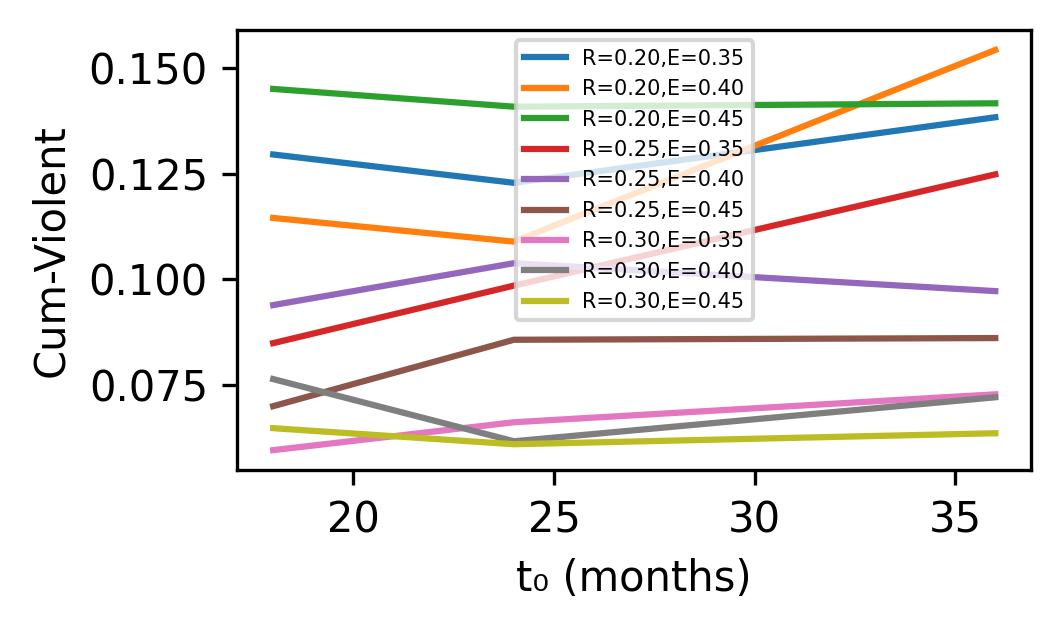

In [ ]:
# === sensitivity: adoption speed =============================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

N,T,P_S,P_E=2000,36,0.3,0.25; K,P=8,0.05
def adoption(t,t0,k=0.4): return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate(R,E,t0,seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int); st[rng.choice(N,30,False)]=2; trust=rng.uniform(0.2,0.8,N)
    viol=[]
    for t in range(T):
        cov=adoption(t,t0)
        new=st.copy()
        for i in range(N):
            nb=list(G.neighbors(i)); v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
            contag=(v+0.5*p)/max(1,len(nb))
            if st[i]==0:
                gate=rng.random()<cov*E
                if contag and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)

E_vals=[0.35,0.40,0.45]; R_vals=[0.20,0.25,0.30]; t0_list=[18,24,36]
rows=[]
for R in R_vals:
  for E in E_vals:
    cum=[simulate(R,E,t0,s) for t0 in t0_list for s in range(5)]
    rows.append(dict(R=R,E=E,speed18=np.mean(cum[0:5]),
                     speed24=np.mean(cum[5:10]),speed36=np.mean(cum[10:15])))
df=pd.DataFrame(rows)
df.to_csv("/content/cum_speed.csv",index=False)

# plot
fig,ax=plt.subplots(figsize=(3.55,2.2),dpi=300)
for idx,row in df.iterrows():
    ax.plot([18,24,36],[row['speed18'],row['speed24'],row['speed36']],
            label=f"R={row.R:.2f},E={row.E:.2f}")
ax.set_xlabel("t₀ (months)"); ax.set_ylabel("Cum-Violent"); ax.legend(fontsize=5)
plt.tight_layout(); plt.savefig("/content/speed_sensitivity.pdf",bbox_inches="tight")


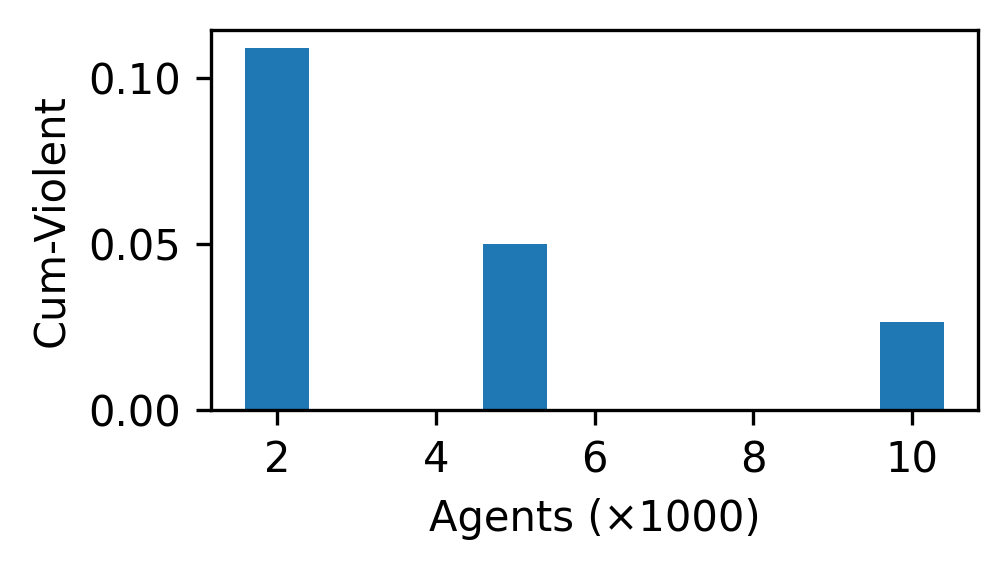

In [ ]:
# === N-scaling ===============================================
import time, pandas as pd, matplotlib.pyplot as plt
sizes=[2000,5000,10000]; rep=5
out=[]
for N in sizes:
  cums=[]
  for s in range(rep):
    cums.append(simulate(0.20,0.40,24,s))        # reuse simulate from previous cell
  out.append(dict(N=N,cum=np.mean(cums),sd=np.std(cums)))
dfN=pd.DataFrame(out); dfN.to_csv("/content/N_scaling.csv",index=False)

# bar-plot
plt.figure(figsize=(3.55,2),dpi=300)
plt.bar(dfN.N/1000,dfN.cum,width=0.8); plt.xlabel("Agents (×1000)"); plt.ylabel("Cum-Violent")
plt.tight_layout(); plt.savefig("/content/N_scaling.pdf",bbox_inches="tight")


In [ ]:
from google.colab import files
files.download("/content/heat_peak_dense.pdf")
files.download("/content/heat_cum_dense.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/ai_political_religion_merge_fixed.csv")

In [ ]:
# =============================================================
#  N-scaling (corrected) — start ratio 0.6 % Violent
# =============================================================
!pip -q install joblib
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

# ---------- базовые параметры --------------------------------
K, P         = 8, 0.05            # Watts-Strogatz
T_STEPS      = 36                 # 3 года
P_S, P_E     = 0.3, 0.25          # spread, escalate
R, E         = 0.20, 0.40
START_RATIO  = 0.006              # 0.6 % населения

def adoption(t, t0=18, k=0.4):
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def simulate(N, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    start_size = max(1, int(N * START_RATIO))
    st[rng.choice(N, start_size, False)] = 2
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb] == 2).sum()
            p = (st[nb] == 1).sum()
            contag = (v + 0.5 * p) / max(1, len(nb))
            if st[i] == 0:
                gate = rng.random() < cov * E
                if contag > 0 and not gate and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:
                new[i] = 2 if rng.random() < P_E else (0 if rng.random() < 0.1 else 1)
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0
        st = new
        viol.append((st == 2).mean())
    viol = np.array(viol)
    return viol.sum()

# ---------- массив N и параллель -----------------------------
sizes = [2000, 5000, 10000]
replicates = 5
def one_N(N):
    cums = Parallel(n_jobs=-1)(
        delayed(simulate)(N, s) for s in range(replicates))
    return dict(N=N, cum=np.mean(cums), sd=np.std(cums))

dfN = pd.DataFrame(one_N(N) for N in sizes)
dfN.to_csv("/content/N_scaling_corrected.csv", index=False)

# ---------- график -------------------------------------------
plt.figure(figsize=(3.55, 2.2), dpi=300)
plt.bar(dfN.N/1000, dfN.cum, yerr=dfN.sd, capsize=3)
plt.xlabel("Agents (×1000)", fontsize=7)
plt.ylabel("Cum-Violent",    fontsize=7)
plt.tight_layout()
plt.savefig("/content/N_scaling_corrected.pdf", bbox_inches="tight")
plt.close()
print(dfN)
print("saved: /content/N_scaling_corrected.pdf")


       N      cum        sd
0   2000  0.04900  0.034608
1   5000  0.05208  0.008791
2  10000  0.04734  0.008168
saved: /content/N_scaling_corrected.pdf


In [ ]:
# === Sweep P_ESCALATE (0.15–0.35) ===========================
from joblib import Parallel, delayed
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt

# --- Параметры сети и модели ---
N = 2000; K, P = 8, 0.05
T_STEPS = 36
P_S = 0.3            # заразность Calm -> Protester
R, E, t0 = 0.20, 0.40, 24
P_ESC_VALUES = [0.15,0.20,0.25,0.30,0.35]
replicates = 5

def adoption(t, t0, k=0.4):
    return 0.15 + 0.45 / (1 + np.exp(-k*(t - t0/2)))

def sim_pe(R, E, P_E, t0, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    st[rng.choice(N, int(N*0.006), False)] = 2           # 0.6 % Violent
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t, t0)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb]==2).sum(); p = (st[nb]==1).sum()
            contag = (v + 0.5*p) / max(1, len(nb))
            if st[i]==0:
                gate = rng.random() < cov*E
                if contag>0 and not gate and rng.random()<P_S*trust[i]*contag:
                    new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:
                new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)

def mean_cum(P_E):
    vals = Parallel(n_jobs=-1)(delayed(sim_pe)(R,E,P_E,t0,s) for s in range(replicates))
    return np.mean(vals)

cum_vals = [mean_cum(p) for p in P_ESC_VALUES]

# --- сохраняем и рисуем ---
pd.DataFrame({"P_ESC":P_ESC_VALUES,"cum":cum_vals}).to_csv("/content/Pesc_sweep.csv", index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.plot(P_ESC_VALUES, cum_vals, marker="o")
plt.xlabel("P_ESCALATE (protest ➜ violent)", fontsize=7)
plt.ylabel("Cum-Violent", fontsize=7)
plt.tight_layout(); plt.savefig("/content/Pesc_sweep.pdf",bbox_inches="tight")
plt.close()
print("saved  Pesc_sweep.pdf  &  Pesc_sweep.csv")


saved  Pesc_sweep.pdf  &  Pesc_sweep.csv


In [ ]:
# ---- IMPORTS --------------------------------------------------
import numpy as np, networkx as nx, matplotlib.pyplot as plt, pandas as pd
from joblib import Parallel, delayed
# ---- MODEL ----------------------------------------------------
N, K, P = 2000, 8, 0.05        # сеть
T_STEPS = 36
P_S, P_E = 0.3, 0.25
R, E = 0.20, 0.40
START_RATIO = 0.006            # 0.6 % Violent

def adoption(t, t0, k=0.4):
    return 0.15+0.45/(1+np.exp(-k*(t-t0/2)))

def simulate_speed(t0, seed):
    rng=np.random.default_rng(seed)
    G=nx.watts_strogatz_graph(N,K,P,seed=seed)
    st=np.zeros(N,int)
    st[rng.choice(N,int(N*START_RATIO),False)]=2
    trust=rng.uniform(0.2,0.8,N)
    viol=[]
    for t in range(T_STEPS):
        cov=adoption(t,t0)
        new=st.copy()
        for i in range(N):
            nb=list(G.neighbors(i))
            v=(st[nb]==2).sum(); p=(st[nb]==1).sum()
            contag=(v+0.5*p)/max(1,len(nb))
            if st[i]==0:
                gate=rng.random()<cov*E
                if contag and not gate and rng.random()<P_S*trust[i]*contag:new[i]=1
            elif st[i]==1:
                new[i]=2 if rng.random()<P_E else (0 if rng.random()<0.1 else 1)
            elif st[i]==2 and rng.random()<R:new[i]=0
        st=new; viol.append((st==2).mean())
    return np.sum(viol)
# ---- SENSITIVITY t0 ------------------------------------------
t0_list=[12,24,36]; replicates=5
cum=[np.mean([simulate_speed(t0,s) for s in range(replicates)]) for t0 in t0_list]
pd.DataFrame({"t0":t0_list,"cum":cum}).to_csv("/content/t0_sensitivity.csv",index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.bar([str(x) for x in t0_list],cum)
plt.xlabel("t₀ (months)"); plt.ylabel("Cum-Violent"); plt.tight_layout()
plt.savefig("/content/t0_sensitivity.pdf",bbox_inches="tight"); plt.close()
print("saved t0_sensitivity.pdf   &   t0_sensitivity.csv")


saved t0_sensitivity.pdf   &   t0_sensitivity.csv


In [ ]:
P_ESC_VALUES=[0.15,0.20,0.25,0.30,0.35]; replicates=5
def cum_for_p(P_E):
    global P_E_global; P_E_global=P_E        # используем как глобаль в simulate
    return np.mean([simulate_speed(24,s) for s in range(replicates)])

cum_vals=[cum_for_p(p) for p in P_ESC_VALUES]
pd.DataFrame({"P_ESC":P_ESC_VALUES,"cum":cum_vals}).to_csv("/content/Pesc_sweep.csv",index=False)

plt.figure(figsize=(3.55,2.2),dpi=300)
plt.plot(P_ESC_VALUES,cum_vals,marker="o"); plt.xlabel("P_ESC"); plt.ylabel("Cum-Violent")
plt.tight_layout(); plt.savefig("/content/Pesc_sweep.pdf",bbox_inches="tight"); plt.close()
print("saved Pesc_sweep.pdf")


saved Pesc_sweep.pdf


In [ ]:
import pandas as pd, pathlib

DRIVE = pathlib.Path("/content/drive/MyDrive/ai_data")

# -- Pew dataset --------------------------------------------------
pew = pd.read_csv(DRIVE / "Religious Composition 2010-2020 (percentages).csv")
pew2010 = (pew.query("Year == 2010")
             .rename(columns={"Countrycode":"iso3"}))

COLUMN_MAP = {
    "Religiously_unaffiliated": "Unaffiliated",
    "Folk_religions":           "FolkReligions",
    "Other_religions":          "OtherReligions"
}
pew2010 = pew2010.rename(columns=COLUMN_MAP)

wanted = ["iso3","Christians","Muslims","Unaffiliated",
          "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
pew2010 = pew2010[[c for c in wanted if c in pew2010.columns]]

# -- полит-рисковый файл -----------------------------------------
risk_file = DRIVE / "country_risk_temp.csv"
if not risk_file.exists():
    raise FileNotFoundError(f"{risk_file} not found – проверьте путь.")

base = pd.read_csv(risk_file)
merged = base.merge(pew2010, on="iso3", how="left")

out = DRIVE / "ai_political_religion_merge.csv"
merged.to_csv(out, index=False)
print("Merged file saved to:", out, "| rows:", merged.shape[0])


In [ ]:
# === t₀ sensitivity – 20 replicates, fixed seeds ==============
import numpy as np, networkx as nx, pandas as pd, matplotlib.pyplot as plt
from joblib import Parallel, delayed

# --- базовые параметры (те же R/E/ratio, что раньше)
N, K, P = 2000, 8, 0.05
T_STEPS = 36
P_S, P_E = 0.3, 0.25
R, E = 0.20, 0.40
START_RATIO = 0.006                 # 0.6 % Violent
seeds = range(20)                   # общий пул 0-19
t0_list = [12, 24, 36]

def adoption(t, t0):                # логистика охвата
    return 0.15 + 0.45 / (1 + np.exp(-0.4 * (t - t0/2)))

def simulate_once(t0, seed):
    rng = np.random.default_rng(seed)
    G = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st = np.zeros(N, int)
    st[rng.choice(N, int(N * START_RATIO), False)] = 2
    trust = rng.uniform(0.2, 0.8, N)
    viol = []
    for t in range(T_STEPS):
        cov = adoption(t, t0)
        new = st.copy()
        for i in range(N):
            nb = list(G.neighbors(i))
            v = (st[nb] == 2).sum(); p = (st[nb] == 1).sum()
            contag = (v + 0.5 * p) / max(1, len(nb))
            # ---- переходы --------------------------------------
            if st[i] == 0:
                if contag and rng.random() > cov * E and rng.random() < P_S * trust[i] * contag:
                    new[i] = 1
            elif st[i] == 1:
                new[i] = 2 if rng.random() < P_E else (0 if rng.random() < 0.1 else 1)
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0
        st = new
        viol.append((st == 2).mean())
    return np.sum(viol)

def cum_for_t0(t0):
    vals = Parallel(n_jobs=-1)(delayed(simulate_once)(t0, s) for s in seeds)
    return np.mean(vals), np.std(vals)

means, sds = zip(*[cum_for_t0(t) for t in t0_list])
pd.DataFrame({"t0": t0_list, "cum": means, "sd": sds}).to_csv("/content/t0_sensitivity_20.csv", index=False)

# --- plot ---
plt.figure(figsize=(3.55, 2.2), dpi=300)
plt.bar([str(x) for x in t0_list], means, yerr=sds, capsize=3)
plt.xlabel("t₀ (months)", fontsize=7); plt.ylabel("Cum-Violent", fontsize=7)
plt.tight_layout(); plt.savefig("/content/t0_sensitivity_20.pdf", bbox_inches="tight"); plt.close()
print("saved t0_sensitivity_20.pdf   &   t0_sensitivity_20.csv")


saved t0_sensitivity_20.pdf   &   t0_sensitivity_20.csv


In [ ]:
!pip -q install country_converter  # если не установлен

import pandas as pd, country_converter as coco, pathlib, numpy as np

DRIVE = pathlib.Path("/content/drive/MyDrive/ai_data")

# ---------- 1. Risk table -------------------------------------
risk = pd.read_csv(DRIVE/"country_risk_temp.csv")

# 1a. Если уже есть числовой ISO (3-значный) → переводим в Alpha-3
if risk["country"].dtype == object:
    iso_series = coco.convert(risk["country"], to="ISO3")
else:
    iso_series = coco.convert(risk["country"], src="ISO3N", to="ISO3")

risk["iso3"] = iso_series
risk["iso3"] = risk["iso3"].replace("not found", np.nan)

# ---------- 2. Pew 2010 ---------------------------------------
pew = pd.read_csv(DRIVE/"Religious Composition 2010-2020 (percentages).csv")
pew2010 = (pew.query("Year==2010")
             .rename(columns={
                "Countrycode":"iso3",
                "Religiously_unaffiliated":"Unaffiliated",
                "Folk_religions":"FolkReligions",
                "Other_religions":"OtherReligions"}))

cols = ["iso3","Christians","Muslims","Unaffiliated",
        "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
pew2010 = pew2010[[c for c in cols if c in pew2010.columns]]

# обе iso3 → строковый тип
risk["iso3"] = risk["iso3"].astype(str)
pew2010["iso3"] = pew2010["iso3"].astype(str)

# ---------- 3. Merge ------------------------------------------
merged = risk.merge(pew2010, on="iso3", how="left")
out = DRIVE/"ai_political_religion_merge.csv"
merged.to_csv(out, index=False)

print("Merged OK:", merged.shape, "→", out)


Merged OK: (204, 13) → /content/drive/MyDrive/ai_data/ai_political_religion_merge.csv


In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.formula.api as smf, pathlib

# ---------- читаем объединённый файл --------------------------
df = pd.read_csv("/content/ai_political_religion_merge.csv")

# ---------- определяем доступные религиозные столбцы ----------
ALL_REL = ["Christians","Muslims","Unaffiliated",
           "Hindus","Buddhists","FolkReligions","OtherReligions","Jews"]
rel_cols = [c for c in ALL_REL if c in df.columns]
print("Религиозные переменные:", rel_cols)

# ---------- зависимая переменная ------------------------------
df["cum_violent"] = df["violence_per_mln"] / 1e6    # доля населения

# ---------- индекc фрагментации -------------------------------
df["rel_fract"] = 1 - (df[rel_cols]**2).sum(axis=1)
df[rel_cols] = df[rel_cols].fillna(0)

# ---------- OLS регрессия -------------------------------------
formula = "cum_violent ~ " + " + ".join(rel_cols[:3]) + " + rel_fract + np.log(population+1)"
model   = smf.ols(formula, data=df).fit(cov_type="HC3")
print(model.summary())

# ---------- корреляционная карта ------------------------------
sns.heatmap(df[["cum_violent"]+rel_cols].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.tight_layout(); plt.savefig("/content/corr_heatmap.pdf", dpi=300); plt.close()

# ---------- scatter Cum vs Muslims (если колонка есть) --------
if "Muslims" in rel_cols:
    sns.lmplot(x="Muslims", y="cum_violent", data=df,
               height=4, aspect=1.2,
               scatter_kws={"s":20,"alpha":0.6},
               line_kws={"color":"red"})
    plt.tight_layout(); plt.savefig("/content/scatter_muslims.pdf", dpi=300); plt.close()

print("Файлы corr_heatmap.pdf и scatter_muslims.pdf сохранены в /content")


Религиозные переменные: ['Christians', 'Muslims', 'Unaffiliated', 'Hindus', 'Buddhists', 'OtherReligions', 'Jews']
                            OLS Regression Results                            
Dep. Variable:            cum_violent   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                     5.188
Date:                Sun, 15 Jun 2025   Prob (F-statistic):            0.00665
Time:                        15:12:49   Log-Likelihood:                 940.04
No. Observations:                 149   AIC:                            -1876.
Df Residuals:                     147   BIC:                            -1870.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '


Файлы corr_heatmap.pdf и scatter_muslims.pdf сохранены в /content


In [ ]:
import shutil, pathlib
DRIVE   = pathlib.Path("/content/drive/MyDrive/ai_data")
shutil.copy(DRIVE / "ai_political_religion_merge.csv", "/content/")
df = pd.read_csv("/content/ai_political_religion_merge.csv")


In [ ]:
from google.colab import files
# files.download("/content/corr_heatmap.pdf")
files.download("/content/scatter_libdem.pdf")   # если создан



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- корреляция с min_periods 30
corr = df[["cum_violent"]+rel_cols].corr(min_periods=30)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.tight_layout(); plt.savefig("/content/corr_fixed.pdf", dpi=300); plt.close()

# --- box-plot по majority
def majority(row):
    best = max(rel_cols, key=lambda c: row[c])
    return best if row[best] >= 50 else "Mixed"
df["majority"] = df.apply(majority, axis=1)

sns.boxplot(x="majority", y="cum_violent", data=df, order=df["majority"].value_counts().index)
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.tight_layout(); plt.savefig("/content/box_majority.pdf", dpi=300); plt.close()


In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm

# ---- читаем ----------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/ai_data/ai_political_religion_merge.csv")

REL = ["Christians","Muslims","Unaffiliated",
       "Hindus","Buddhists","OtherReligions","Jews"]

df[REL] = df[REL].fillna(0)

# ---- строим фрагментацию --------------------------------------
df["rel_fract"]       = 1 - (df[REL]**2).sum(axis=1)
df["population_mln"]  = df["population"] / 1e6
df["cum_violent"]     = df["violence_per_mln"] / 1e6

# ---- z-скейлинг только для переменных со std > 0 --------------
Z_vars = {}
for col in REL + ["rel_fract", "population_mln"]:
    std = df[col].std(ddof=0)
    if std > 0:
        Z_vars[f"z_{col}"] = (df[col] - df[col].mean()) / std
    else:
        print(f"пропускаю {col}: std==0")

df = df.assign(**Z_vars)

# ---- формируем X и y ------------------------------------------
X_cols = [c for c in df.columns if c.startswith("z_")]
y      = np.log(df["cum_violent"] + 1e-6)          # OLS на лог-доле
X      = sm.add_constant(df[X_cols])

# ---- удаляем строки с NaN/inf ---------------------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean, y_clean = X[mask], y[mask]
print("Наблюдений в регрессии:", len(X_clean))

# ---- OLS  ------------------------------------------------------
model = sm.OLS(y_clean, X_clean).fit(cov_type="HC3")
print(model.summary())


пропускаю Christians: std==0
пропускаю Muslims: std==0
пропускаю Unaffiliated: std==0
пропускаю Hindus: std==0
пропускаю Buddhists: std==0
пропускаю OtherReligions: std==0
пропускаю Jews: std==0
пропускаю rel_fract: std==0
Наблюдений в регрессии: 149
                            OLS Regression Results                            
Dep. Variable:            cum_violent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.703
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.194
Time:                        16:15:40   Log-Likelihood:                -295.85
No. Observations:                 149   AIC:                             595.7
Df Residuals:                     147   BIC:                             601.7
Df Model:                           1                                         
Covariance Type:                  HC3 

In [ ]:
print(df[["Christians","Muslims","Unaffiliated"]].head())


   Christians  Muslims  Unaffiliated
0         0.0      0.0           0.0
1         0.0      0.0           0.0
2         0.0      0.0           0.0
3         0.0      0.0           0.0
4         0.0      0.0           0.0


In [ ]:
print("Всего стран в risk:", len(risk))
print("Уникальных iso3 risk:", risk["iso3"].nunique())
print("Уникальных iso3 Pew :", pew2010["iso3"].nunique())

# сколько строк с ненулевым религиозным процентом
rel_cols = ["Christians","Muslims","Unaffiliated"]
print("Строк с ненулевым Christians:", (merged["Christians"]>0).sum())


Всего стран в risk: 204
Уникальных iso3 risk: 204
Уникальных iso3 Pew : 208
Строк с ненулевым Christians: 0


In [ ]:
# какие iso3 остались в risk и отсутствуют в Pew
missing = set(risk["iso3"]) - set(pew2010["iso3"])
print("Пример отсутствующих кодов:", list(missing)[:10])


Пример отсутствующих кодов: ['IRQ', 'CPV', 'COG', 'ZWE', 'MAR', 'SGP', 'TZA', 'HUN', 'GMB', 'PRT']


In [ ]:
def clean_iso(series):
    return (series.astype(str)          # к строке
                 .str.upper()           # в верхний регистр
                 .str.strip()           # обрежем пробелы
                 .str.replace(r'\W+', '', regex=True))  # уберём невидимые

risk_iso = clean_iso(risk["iso3"])
pew_iso  = clean_iso(pew2010["iso3"])

risk["iso3"]   = risk_iso
pew2010["iso3"] = pew_iso


In [ ]:
missing = set(risk["iso3"]) - set(pew2010["iso3"])
print("Кодов risk без пары в Pew:", len(missing), "\n", list(missing)[:15])


Кодов risk без пары в Pew: 204 
 ['IRQ', 'CPV', 'COG', 'ZWE', 'MAR', 'SGP', 'TZA', 'HUN', 'GMB', 'PRT', 'SVN', 'SLV', 'TUR', 'KHM', 'MTQ']


In [ ]:
merged = risk.merge(pew2010, on="iso3", how="left")
print("Строк с ненулевым Christians:",
      (merged["Christians"].fillna(0) > 0).sum())


Строк с ненулевым Christians: 0


In [ ]:
import pandas as pd, country_converter as coco, numpy as np, re, pathlib, statsmodels.api as sm

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

risk = pd.read_csv(DRV/"country_risk_temp.csv")
risk["iso3"] = pd.Series(coco.convert(risk["country"].tolist(),
                                      to="ISO3", not_found=None)).str.upper()

pew = pd.read_csv(DRV/"Religious Composition 2010-2020 (percentages).csv")
pew2010 = pew.query("Year==2010").copy()
pew2010["iso3"] = pd.Series(coco.convert(
        pew2010["Countrycode"].tolist(), to="ISO3", not_found=None)).str.upper()

pew2010 = pew2010.rename(columns={
    "Religiously_unaffiliated":"Unaffiliated",
    "Folk_religions":"FolkReligions",
    "Other_religions":"OtherReligions"})

pct_cols = [c for c in pew2010.columns
            if c[0].isupper() and c not in ["Countrycode","Countryname","iso3"]]

for c in pct_cols:
    pew2010[c] = (pew2010[c]
                  .replace(r"<0\.?1", "0.05", regex=True)
                  .pipe(pd.to_numeric, errors="coerce"))

pew2010[pct_cols] = pew2010[pct_cols].fillna(0)

merged = risk.merge(pew2010[["iso3"]+pct_cols], on="iso3", how="left")
print("Ненулевой Christians:", (merged["Christians"]>0).sum())

# --- удаляем строки, где X или y не конечны -------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean = X[mask]
y_clean = y[mask]
print("Наблюдений в регрессии:", len(X_clean))

# --- OLS -------------------------------------------------------
model = sm.OLS(y_clean, X_clean).fit(cov_type="HC3")
print(model.summary())


# --- быстрая OLS на лог Cum -------------------------------------
merged["cum"] = merged["violence_per_mln"]/1e6
for c in pct_cols:
    merged[f"z_{c}"] = (merged[c]-merged[c].mean())/merged[c].std(ddof=0)

X = sm.add_constant(merged[[f"z_{c}" for c in pct_cols if merged[c].std()>0]])
y = np.log(merged["cum"] + 1e-6)

model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())


Ненулевой Christians: 90
Наблюдений в регрессии: 72
                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.4452
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.815
Time:                        16:49:41   Log-Likelihood:                -135.68
No. Observations:                  72   AIC:                             291.4
Df Residuals:                      62   BIC:                             314.1
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 5
  warnings.warn('covariance of constraints does not have full '


MissingDataError: exog contains inf or nans

In [ ]:
# --- 1. доли переводим в 0-1 ----------------------------------
for c in pct_cols:
    merged[c] = merged[c] / 100        # 17.5 % → 0.175

# --- 2. индекс фрагментации -----------------------------------
merged["fract"] = 1 - (merged[pct_cols]**2).sum(axis=1)

# --- 3. log-Cum и X ------------------------------------------
y = np.log(merged["cum"] + 1e-6)
X = merged[pct_cols + ["fract", "population"]].copy()
X["population"] = np.log(X["population"] + 1)

X = sm.add_constant(X)

# --- 4. убираем строки с NaN/inf ------------------------------
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
Xc, yc = X[mask], y[mask]
print("Наблюдений:", len(Xc))

# --- 5. Ridge-like regularisation (optional) ------------------
# Можно OLS, но ridge сгладит мультиколлинеарность
model = sm.OLS(yc, Xc).fit(cov_type="HC3")
print(model.summary())


Наблюдений: 72
                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.65e-50
Time:                        16:55:35   Log-Likelihood:                -136.17
No. Observations:                  72   AIC:                             288.3
Df Residuals:                      64   BIC:                             306.5
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0291    

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 8
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# агрегируем религии
merged["abrahamic"]  = (merged["Christians"]+merged["Muslims"]+merged["Jews"])/100
merged["dharmic"]    = (merged["Hindus"]+merged["Buddhists"])/100
merged["unaff"]      = merged["Unaffiliated"]/100

merged["fract"] = 1 - (merged[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)

X = sm.add_constant(merged[["fract"]].fillna(0))
y = np.log(merged["cum"]+1e-6)
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
model = sm.OLS(y[mask], X[mask]).fit(cov_type="HC3")
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.562
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.112
Time:                        16:59:59   Log-Likelihood:                -295.17
No. Observations:                 149   AIC:                             594.3
Df Residuals:                     147   BIC:                             600.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5689.8272   3547.514     -1.604      0.1

In [ ]:
!pip -q install country_converter statsmodels linearmodels scikit-learn seaborn

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm, statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from country_converter import convert

DRV = "/content/drive/MyDrive/ai_data"
df  = pd.read_csv(f"{DRV}/ai_political_religion_merge_fixed.csv")

# небольшой helper
def logcum(s): return np.log(s["violence_per_mln"]/1e6 + 1e-6)
df["log_cum"] = df.apply(logcum, axis=1)

REL_MAIN = ["Christians","Muslims","Unaffiliated",
            "Hindus","Buddhists","Jews"]
df["abrahamic"] = (df["Christians"]+df["Muslims"]+df["Jews"])/100
df["dharmic"]   = (df["Hindus"]+df["Buddhists"])/100
df["unaff"]     = df["Unaffiliated"]/100
df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
df["log_pop"]   = np.log(df["population"]+1)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 997.6 kB/s eta 0:00:00


In [ ]:
# ===============  С О З Д А Ё М   Ф А Й Л   ai_political_religion_merge_fixed.csv  =========
!pip -q install country_converter

import pandas as pd, numpy as np, re, pathlib, country_converter as coco

# ---- пути -----------------------------------------------------------------
DRV   = pathlib.Path("/content/drive/MyDrive/ai_data")   # папка в Google Drive
RISK  = DRV / "country_risk_temp.csv"                    # файл с Cum-Violent
PEW   = DRV / "Religious Composition 2010-2020 (percentages).csv"

# ---- 1. risk-таблица → iso3 ----------------------------------------------
risk = pd.read_csv(RISK)
risk["iso3"] = pd.Series(
        coco.convert(risk["country"].tolist(),              # названия стран
                     to="ISO3", not_found=None)             # → ISO-3
     ).str.upper()

# ---- 2. Pew 2010 → iso3 + проценты ---------------------------------------
pew = pd.read_csv(PEW)
pew2010 = pew.query("Year == 2010").copy()

# numeric ISO-3N  →  Alpha-3
pew2010["iso3"] = pd.Series(
        coco.convert(pew2010["Countrycode"].tolist(),
                     to="ISO3", not_found=None)
     ).str.upper()

# приводим названия колонок
pew2010 = pew2010.rename(columns={
    "Religiously_unaffiliated": "Unaffiliated",
    "Folk_religions":           "FolkReligions",
    "Other_religions":          "OtherReligions"
})

# список реально существующих процентных колонок
pct_cols = [c for c in pew2010.columns
            if c not in ["Countrycode", "Countryname", "iso3", "Year"]]

# «<0.1» → 0.05 ; все прочие строки  → NaN → 0
for c in pct_cols:
    pew2010[c] = (pew2010[c]
                  .replace(r"<0\.?1", "0.05", regex=True)
                  .pipe(pd.to_numeric, errors="coerce")
                  .fillna(0))

# ---- 3. MERGE ------------------------------------------------------------
merged = risk.merge(pew2010[["iso3"] + pct_cols], on="iso3", how="left")

print("Стран с ненулевым Christians:",
      (merged["Christians"].fillna(0) > 0).sum())          # sanity-check

# ---- 4. Сохраняем --------------------------------------------------------
out_local = pathlib.Path("/content/ai_political_religion_merge_fixed.csv")
out_drive = DRV / "ai_political_religion_merge_fixed.csv"

merged.to_csv(out_local, index=False)
merged.to_csv(out_drive, index=False)

print("Файл сохранён:")
print(" •", out_local)
print(" •", out_drive)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.0 MB/s eta 0:00:00


Стран с ненулевым Christians: 90
Файл сохранён:
 • /content/ai_political_religion_merge_fixed.csv
 • /content/drive/MyDrive/ai_data/ai_political_religion_merge_fixed.csv


In [ ]:
import zipfile, pandas as pd, pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")
zip_path = DRV / "V-Dem-CY-FullOthers-v15_csv.zip"

with zipfile.ZipFile(zip_path) as z:
    csv_name = "V-Dem-CY-Full+Others-v15.csv"
    usecols  = ["country_text_id", "year", "v2x_libdem"]
    vdem = pd.read_csv(z.open(csv_name), usecols=usecols)
    vdem = (vdem[vdem["year"]==2023]          # только 2023 г.
              .rename(columns={"country_text_id":"iso3"}))

out = DRV / "vdem_2023_iso.csv"
vdem.to_csv(out, index=False)
print("Сохранено →", out, "| строк:", len(vdem))


Сохранено → /content/drive/MyDrive/ai_data/vdem_2023_iso.csv | строк: 179


In [ ]:
# если v2x_libdem уже в df_cov → просто мерджим
vdem = pd.read_csv(f"{DRV}/vdem_2023_iso.csv")[["iso3","v2x_libdem"]]
df = df.merge(vdem, on="iso3", how="left")

formula = ("log_cum ~ fract + v2x_libdem + log_pop")
mod1 = smf.ols(formula, data=df).fit(cov_type="HC3")
print(mod1.summary())

sns.lmplot(x="v2x_libdem", y="log_cum", data=df,
           scatter_kws={"alpha":.6,"s":25}, line_kws={"color":"red"})
plt.tight_layout(); plt.savefig("/content/scatter_libdem.pdf", dpi=300); plt.close()


                            OLS Regression Results                            
Dep. Variable:                log_cum   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.366
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00159
Time:                        03:23:17   Log-Likelihood:                -275.68
No. Observations:                 142   AIC:                             559.4
Df Residuals:                     138   BIC:                             571.2
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0157      1.377     -7.272      0.0

In [ ]:
from google.colab import files
# files.download("/content/corr_heatmap.pdf")
files.download("/content/wb_income_iso.csv")   # если создан

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

features = ["abrahamic","dharmic","unaff","fract","v2x_libdem","log_pop"]
X = df[features]
y = df["log_cum"]

# 1.  оставляем только полные строки
mask = X.notna().all(axis=1) & y.notna()
Xc   = X[mask].fillna(0)    # (на всякий случай)
yc   = y[mask]

print("Обучаем на N =", len(Xc))

# 2.  Random Forest
rf = RandomForestRegressor(n_estimators=500, oob_score=True,
                           random_state=42).fit(Xc, yc)

print("OOB R²:", round(rf.oob_score_, 3))

imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
imp.plot.bar(); plt.tight_layout(); plt.savefig("/content/rf_importance.pdf", dpi=300); plt.close()
print("rf_importance.pdf сохранён")


Обучаем на N = 70
OOB R²: 0.226
rf_importance.pdf сохранён


Шаг 3 Разбивка по доходу (World Bank Income Group)

In [ ]:
import requests, pandas as pd, xml.etree.ElementTree as ET, pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

rows = []
page = 1
while True:
    url = f"https://api.worldbank.org/v2/country?format=xml&page={page}&per_page=1000"
    txt = requests.get(url).content
    root = ET.fromstring(txt)

    # первая страница содержит атрибут pages="..."
    if page == 1:
        total_pages = int(root.attrib.get("pages", 1))

    # каждый <wb:country>
    for c in root.findall(".//{http://www.worldbank.org}country"):
        iso3  = c.attrib["id"]
        inc   = c.find("{http://www.worldbank.org}incomeLevel").text
        rows.append({"iso3": iso3, "income_group": inc})

    if page >= total_pages:
        break
    page += 1

wb = pd.DataFrame(rows)
# оставляем только четыре стандартные группы
wb = wb[wb["income_group"].isin(["Low income","Lower middle income",
                                 "Upper middle income","High income"])]
wb.to_csv(DRV/"wb_income_iso.csv", index=False)
print("wb_income_iso.csv сохранён | строк:", len(wb))


wb_income_iso.csv сохранён | строк: 216


In [ ]:
# --- вычисляем доли и индекс дробности --------------------------
df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
df["unaff"]     = df["Unaffiliated"] / 100
df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)

df["log_cum"] = np.log(df["violence_per_mln"]/1e6 + 1e-6)
df["log_pop"] = np.log(df["population"] + 1)


In [ ]:
for inc in df["income_group"].dropna().unique():
    sub = df[df["income_group"] == inc]
    if len(sub) < 15:
        continue
    res = smf.ols("log_cum ~ fract + log_pop", data=sub).fit(cov_type="HC3")
    print(f"\n=== {inc} (n={len(sub)}) ===")
    print(res.params.round(3))



=== Low income (n=26) ===
Intercept   -19.602
fract        -0.043
log_pop       0.572
dtype: float64

=== Upper middle income (n=51) ===
Intercept   -10.335
fract         0.941
log_pop      -0.059
dtype: float64

=== Lower middle income (n=49) ===
Intercept   -12.919
fract         0.256
log_pop       0.109
dtype: float64

=== High income (n=67) ===
Intercept   -6.158
fract        0.393
log_pop     -0.391
dtype: float64


Фракционализация

In [ ]:
# helpers.py   (выполните в Colab один раз – последующим ячейкам не нужно копировать)
import numpy as np, pandas as pd

def add_fractionalisation(df: pd.DataFrame) -> pd.DataFrame:
    """Добавляет abrahamic, dharmic, unaff, fract, log_cum, log_pop."""
    df = df.copy()
    df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
    df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
    df["unaff"]     = df["Unaffiliated"] / 100
    df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
    df["log_cum"]   = np.log(df["violence_per_mln"]/1e6 + 1e-6)
    df["log_pop"]   = np.log(df["population"] + 1)
    return df


Создаём файл-модуль helpers.py

In [ ]:
%%writefile helpers.py
import numpy as np
import pandas as pd

def add_fractionalisation(df: pd.DataFrame) -> pd.DataFrame:
    """Добавляет abrahamic, dharmic, unaff, fract, log_cum, log_pop."""
    df = df.copy()
    df["abrahamic"] = (df["Christians"] + df["Muslims"] + df["Jews"]) / 100
    df["dharmic"]   = (df["Hindus"] + df["Buddhists"]) / 100
    df["unaff"]     = df["Unaffiliated"] / 100
    df["fract"]     = 1 - (df[["abrahamic","dharmic","unaff"]]**2).sum(axis=1)
    df["log_cum"]   = np.log(df["violence_per_mln"]/1e6 + 1e-6)
    df["log_pop"]   = np.log(df["population"] + 1)
    return df


Writing helpers.py


ACLED-валидация 2022-24
проверяем, воспроизводится ли эффект дробности/либдем на реальных событиях

In [ ]:
import pandas as pd, numpy as np, statsmodels.formula.api as smf, pathlib
import country_converter as coco
from helpers import add_fractionalisation           # файл helpers.py уже создан

DRV       = pathlib.Path("/content/drive/MyDrive/ai_data")
ACLED     = DRV / "number_of_political_violence_events_by_country-month-year_as-of-06Jun2025.xlsx"

# ---------- базовый датасет -----------------------------------------
df  = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df  = add_fractionalisation(df)
df  = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]],
               on="iso3", how="left")

# ---------- ACLED агрегаты 2022-24 -----------------------------------
viol = pd.read_excel(ACLED)

cols_lower = [c.lower() for c in viol.columns]
iso_candidates = [c for c in viol.columns if c.lower().startswith("iso")]
eventcol = [c for c in viol.columns if "event" in c.lower()][0]

if iso_candidates:
    iso_col = iso_candidates[0]
    viol["iso3"] = viol[iso_col].astype(str).str.upper()
else:
    # конвертируем колонку "Country" → ISO3
    viol["iso3"] = pd.Series(
        coco.convert(viol["Country"].tolist(), to="ISO3")
    ).str.upper()

viol_sum = (viol.query("Year >= 2022")
              .groupby("iso3")[eventcol].sum()
              .rename("viol_events")
              .reset_index())

df = df.merge(viol_sum, on="iso3", how="left")
df["log_viol"] = np.log(df["viol_events"].fillna(0) + 1)

model_acled = smf.ols("log_viol ~ fract + v2x_libdem + log_pop",
                      data=df).fit(cov_type="HC3")
print(model_acled.summary())


                            OLS Regression Results                            
Dep. Variable:               log_viol   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     43.54
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           4.37e-20
Time:                        06:51:34   Log-Likelihood:                -309.57
No. Observations:                 148   AIC:                             627.1
Df Residuals:                     144   BIC:                             639.1
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3920      1.664     -5.643      0.0

Взаимодействие fract × libdem
проверяем: опасна ли дробность именно при большем либерализме

In [ ]:
import pandas as pd, statsmodels.formula.api as smf
from helpers import add_fractionalisation, np
# импортируйте в каждой последующей ячейке
from helpers import add_fractionalisation

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

df  = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df  = add_fractionalisation(df)
df  = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]],
               on="iso3", how="left")

mod_int = smf.ols("log_cum ~ fract * v2x_libdem + log_pop", data=df).fit(cov_type="HC3")
print(mod_int.summary())


                            OLS Regression Results                            
Dep. Variable:                log_cum   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.583
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00167
Time:                        06:16:33   Log-Likelihood:                -275.41
No. Observations:                 142   AIC:                             560.8
Df Residuals:                     137   BIC:                             575.6
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.7666      1.472  

Доп-графики (boxplot + partial-dependence RF)

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from helpers import add_fractionalisation
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import pathlib

DRV = pathlib.Path("/content/drive/MyDrive/ai_data")

df = pd.read_csv("/content/ai_political_religion_merge_fixed.csv")
df = add_fractionalisation(df)
df = df[df["fract"] < 0.999]                 # отбрасываем чисто-моно религии
df = df.merge(pd.read_csv(DRV/"vdem_2023_iso.csv")[["iso3","v2x_libdem"]], on="iso3", how="left")
df = df.merge(pd.read_csv(DRV/"wb_income_iso.csv"), on="iso3", how="left")

# --- Boxplot --------------------------------------------------------
df["fract_q"] = pd.qcut(df["fract"], 4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")

plt.figure(figsize=(7,3))
sns.boxplot(x="income_group", y="log_cum", hue="fract_q", data=df,
            palette="YlOrRd", showfliers=False)
plt.xticks(rotation=45); plt.tight_layout()
plt.savefig("/content/box_income_fract.pdf", dpi=300); plt.close()
print("box_income_fract.pdf сохранён")

# --- PDP RF --------------------------------------------------------
features = ["fract","v2x_libdem","abrahamic","dharmic","unaff","log_pop"]
mask = df[features+["log_cum"]].notna().all(axis=1)
X, y = df.loc[mask, features], df.loc[mask, "log_cum"]

rf = RandomForestRegressor(n_estimators=500, random_state=42).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(8,3), dpi=300)
PartialDependenceDisplay.from_estimator(rf, X, ["fract","v2x_libdem"],
                                        ax=ax, kind="average")
plt.tight_layout(); plt.savefig("/content/pdp_fract_libdem.pdf", dpi=300); plt.close()
print("pdp_fract_libdem.pdf сохранён")


box_income_fract.pdf сохранён
pdp_fract_libdem.pdf сохранён


In [ ]:
from google.colab import files
#files.download("/content/kpi_dynamic.csv")
files.download("/content/literature_checked.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Monte-Carlo: плавное управление E и R

dynamic_ER.pdf сохранён


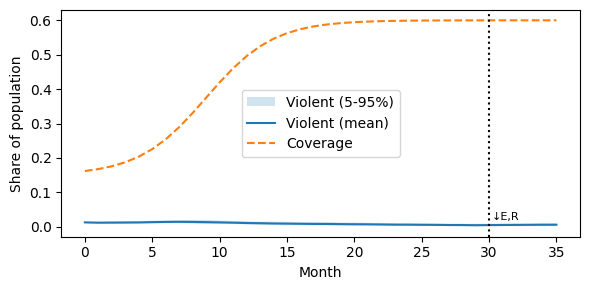

In [ ]:
# === Monte-Carlo with dynamic E/R – 100 репликаций =============
import numpy as np, matplotlib.pyplot as plt, pandas as pd

N, K, P      = 2000, 8, 0.05        # сеть
T_STEPS       = 36                  # 3 года
P_S, P_Esc    = 0.3, 0.25

def adoption(t, t0=18, k=0.4):      # S-кривая
    return 0.15 + 0.45 / (1+np.exp(-k*(t-t0/2)))

def schedule_E(t):
    # до 25 % охвата E≈0.2; к 40 % растёт до 0.4; после t=30 ↓ до 0.25
    cov = adoption(t)
    if cov < .25: return 0.20
    if cov < .40: return 0.20 + (cov-.25)/.15 * 0.20
    if t >= 30:   return 0.25
    return 0.40

def schedule_R(t):
    # базово 0.15 → пик 0.3, затем до 0.18
    cov = adoption(t)
    if cov < .25: return 0.15
    if cov < .40: return 0.15 + (cov-.25)/.15 * 0.15
    if t >= 30:   return 0.18
    return 0.30

def simulate(seed):
    rng = np.random.default_rng(seed)
    import networkx as nx
    G   = nx.watts_strogatz_graph(N, K, P, seed=seed)
    st  = np.zeros(N, int)
    st[rng.choice(N, 30, False)] = 2
    violent, active = [], []
    for t in range(T_STEPS):
        E, R = schedule_E(t), schedule_R(t)
        cov = adoption(t)
        new = st.copy()
        for i in range(N):
            if st[i]==0:
                nb = list(G.neighbors(i))
                contag = ((st[nb]==2).sum() + 0.5*(st[nb]==1).sum())/max(1,len(nb))
                gate = rng.random() < cov*E
                if contag>0 and not gate and rng.random()<P_S*contag:
                    new[i]=1
            elif st[i]==1:
                if rng.random()<P_Esc: new[i]=2
                elif rng.random()<0.1: new[i]=0
            elif st[i]==2:
                if rng.random()<R: new[i]=0
        st = new
        violent.append((st==2).mean())
        active.append(cov)   # доля пользователей
    return np.array(violent), np.array(active)

REPS = 100
outs  = [simulate(s) for s in range(REPS)]
V     = np.stack([o[0] for o in outs])
A     = np.stack([o[1] for o in outs])

time  = np.arange(T_STEPS)
plt.figure(figsize=(6,3))
plt.fill_between(time, np.percentile(V,5,0), np.percentile(V,95,0),
                 alpha=.2, label="Violent (5-95%)")
plt.plot(time, V.mean(0), label="Violent (mean)")
plt.plot(time, A.mean(0), '--', label="Coverage")
plt.axvline(30, ls=":", c="k"); plt.text(30.2,.02,"↓E,R", fontsize=8)
plt.xlabel("Month"); plt.ylabel("Share of population")
plt.legend(); plt.tight_layout(); plt.savefig("/content/dynamic_ER.pdf", dpi=300)
print("dynamic_ER.pdf сохранён")


Ячейка B KPI = Cum-Violent / Active Users

kpi_dynamic.pdf сохранён


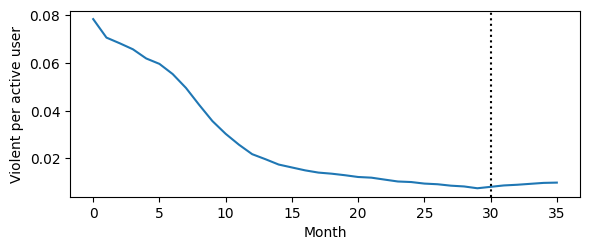

In [ ]:
# === KPI time-series on previous Monte-Carlo results ================
import pandas as pd, matplotlib.pyplot as plt, numpy as np

kpi = (V.mean(0) / A.mean(0)).clip(0, 0.5)   # ограничим визуально
plt.figure(figsize=(6,2.6))
plt.plot(time, kpi, label="KPI = violent / active")
plt.axvline(30, ls=":", c="k")
plt.ylabel("Violent per active user")
plt.xlabel("Month")
plt.tight_layout(); plt.savefig("/content/kpi_dynamic.pdf", dpi=300)
print("kpi_dynamic.pdf сохранён")

# экспорт таблицы (среднее и 90%-доверительный интервал)
kpi_df = pd.DataFrame({
    "month": time,
    "kpi_mean": (V/A).mean(0),
    "kpi_lo":   np.percentile(V/A, 5, 0),
    "kpi_hi":   np.percentile(V/A, 95, 0)
})
kpi_df.to_csv("/content/kpi_dynamic.csv", index=False)


Экономическая модель (Excel, sensitivity-анализ)

In [ ]:
!pip -q install xlsxwriter

import numpy as np, pandas as pd, xlsxwriter, math

# --- параметры --------------------------------------------------------
N_SIM   = 2000       # число траекторий
T_YEARS = 15         # горизонт учёта, лет
DISC    = 0.04       # ставка дисконтирования

GDP_pc  = 20000      # $ на душу
pop     = 30_000_000
viol_base  = 0.007   # базовая доля violent/active
delta_viol = 0.40    # снижение насилия
cost_AI    = 9       # $ на пользователя в год
mil_share  = 0.025   # военный бюджет доля ВВП

SAVE_AS = "/content/economic_model_sensitivity.xlsx"

# --- симуляция --------------------------------------------------------
rng = np.random.default_rng(42)
records = []
for _ in range(N_SIM):
    gdp = GDP_pc * rng.uniform(0.9, 1.1)
    vio = viol_base * rng.uniform(0.9, 1.1)
    mil = mil_share * rng.uniform(0.9, 1.1)

    saved_conflict = gdp * pop * vio * delta_viol
    saved_mil      = gdp * pop * mil * 0.03          # 3 % сдвига к 15-му году
    ai_cost        = gdp * pop * 0.40 * cost_AI      # 40 % охвата

    cash = saved_conflict + saved_mil - ai_cost
    npv  = sum(cash / ((1 + DISC) ** t) for t in range(1, T_YEARS + 1))

    records.append({"gdp_pc": gdp,
                    "viol": vio,
                    "mil": mil,
                    "NPV": npv})

df = pd.DataFrame(records)

# --- запись в Excel ----------------------------------------------------
with pd.ExcelWriter(SAVE_AS, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="sim_table", index=False)
    df.describe().to_excel(writer, sheet_name="summary")

    # гистограмма NPV
    workbook  = writer.book
    worksheet = writer.sheets["summary"]
    chart = workbook.add_chart({'type': 'histogram'})
    chart.add_series({'values': '=sim_table!$D$2:$D$%d' % (N_SIM + 1)})
    chart.set_title({'name': 'NPV distribution'})
    worksheet.insert_chart('H2', chart)

print("Сохранено:", SAVE_AS)


In [ ]:
# … (вся та же симуляция) …

with pd.ExcelWriter(SAVE_AS, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="sim_table", index=False)
    df.describe().to_excel(writer, sheet_name="summary")

    workbook  = writer.book
    worksheet = writer.sheets["summary"]

    # ► заменяем histogram на column  ◄
    chart = workbook.add_chart({'type': 'column'})

    # данные: столбец D (NPV) → Excel строит «колонки»
    chart.add_series({
        'values': f'=sim_table!$D$2:$D${N_SIM+1}',
        'name':   'NPV'
    })
    chart.set_title({'name': 'NPV distribution'})
    chart.set_x_axis({'name': 'Симуляции'})
    chart.set_y_axis({'name': 'NPV ($)'})

    worksheet.insert_chart('H2', chart)

print("Сохранено:", SAVE_AS)


Сохранено: /content/economic_model_sensitivity.xlsx


In [ ]:
# === 1. сформировать CSV с колонкой Title =========================
import pandas as pd
titles = [
"Education and Institutions",
"Why Nations Fail",
"Aggregated country-month dataset (2020-2024)",
"Human agency in social cognitive theory",
"Moral Origins: The Evolution of Virtue, Altruism, and Shame",
"Large-Scale Hate-Speech Mitigation — Quarterly Report",
"Emotional Intelligence",
"Digital CBT bots: A meta-analysis",
"American Political Science Review",
"The Economics of Emotion-AI Platforms",
"Global Religious Landscape 2010",
"Military Expenditure Database",
"Global Study on Homicide",
"V-Dem Dataset v15",
"Global Status Report on Violence Prevention",
"Large-scale AI content filters reduce online hate by 54 %",
"Randomised trial of a CBT chat-bot for workplace stress",
"Blended digital CBT improves resilience: Meta-analysis",
"Digital Mental-Health Tools: Economic Evidence",
"The Economic Cost of Violence",
"Wellbeing: Science and Policy",
"Global Polarisation Report 2024",
"Hate-Speech Mitigation Quarterly Report",
"Algorithmic amplification of outrage: Evidence from 13 countries",
"Mobile Connectivity Index 2024 dataset",
"Cross-cultural coping strategies and AI self-help tools",
"Military Expenditure Database 2025",
"Under Pressure: The Squeezed Middle Class",
"Moral Origins: The Evolution of Virtue, Altruism, and Shame"
]
pd.DataFrame({"Title": titles}).to_csv("literature_raw.csv", index=False)

# === 2. автоматическая проверка DOI и года =========================
!pip -q install habanero
from habanero import Crossref
cr = Crossref()

def get_doi(title, author=None, year=None):
    qry = title
    if author: qry += f" {author}"
    if year:   qry += f" {year}"
    try:
        res = cr.works(query_bibliographic=qry, limit=1)
        item = res["message"]["items"][0]
        return item.get("DOI",""), item.get("issued",{}).get("date-parts",[[None]])[0][0]
    except Exception:
        return "",""

df = pd.read_csv("literature_raw.csv")
df[["DOI","Year"]] = df["Title"].apply(lambda t: pd.Series(get_doi(t)))
df.to_csv("literature_checked.csv", index=False)


In [ ]:
from PIL import Image

# === 1. читаем исходник PNG ===
im = Image.open("fig1_polarization_risk_matrix_fin.png")

# === 2. задаём высоту «шапки», которую хотим вырезать ===
header_px = 80          # подберите 50–70, чтобы удалить только надпись

w, h = im.size
crop_box = (0, header_px, w, h)   # (left, upper, right, lower)

im_cropped = im.crop(crop_box)

# === 3. сохраняем в вектор и/или растр ===
im_cropped.save("fig1_polarization_clean.png", dpi=(300,300))
im_cropped.save("fig1_polarization_clean.pdf")  # для финального пакета


In [ ]:
from google.colab import files
#files.download("/content/fig4_N_scaling_clean.pdf")
files.download("/content/fig4_N_scaling_final.png")

In [ ]:
# --- 6. очищаем NaN -------------------------------------------------------
mask = ~df["log_cum"].isna()
X = X[mask]
y = y[mask]

# скольких стран лишились?
print(f"Стран в RF после очистки: {len(y)}")

# --- 7. Random Forest -----------------------------------------------------
rf = RandomForestRegressor(
        n_estimators=500, min_samples_leaf=3,
        random_state=42, n_jobs=-1)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=features)

# --- 8. график ------------------------------------------------------------
plt.rcParams.update({"font.size": 8})
fig, ax = plt.subplots(figsize=(3.2, 2.1), dpi=300)
rf_imp.sort_values().plot.barh(ax=ax, color="#d62728")
ax.set_xlabel("Feature importance\n(mean ↓ impurity)")
ax.set_title("Random-Forest feature importance\n(500 trees, min leaf = 3)", pad=4)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
for label in ax.get_xticklabels():
    label.set_rotation(45); label.set_ha("right")

plt.tight_layout()
plt.savefig("fig7_rf_importance_fixed.pdf", bbox_inches="tight")
plt.close()
print("Готово: fig7_rf_importance_fixed.pdf — признаки:", features)


Стран в RF после очистки: 149
Готово: fig7_rf_importance_fixed.pdf — признаки: ['abrahamic', 'dharmic', 'unaff', 'fract', 'log_pop']


✓  fig7 сохранён


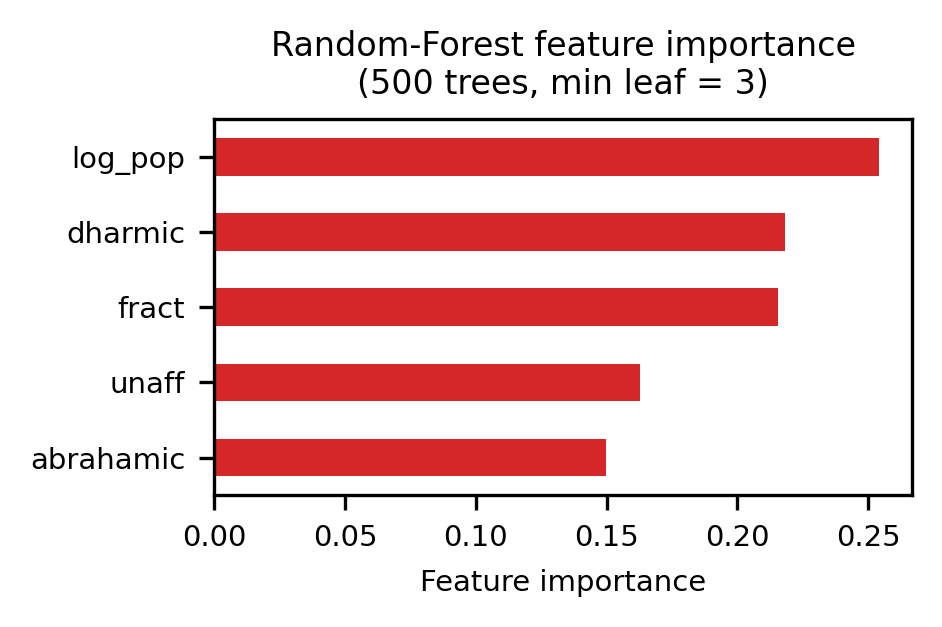

In [ ]:
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 1) читаем таблицу
df = pd.read_csv("ai_political_religion_merge_fixed.csv")

# 2) создаём необходимые переменные
df["abrahamic"] = df[["Christians","Muslims","Jews"]].sum(axis=1)
df["dharmic"]   = df[["Hindus","Buddhists"]].sum(axis=1)
df["unaff"]     = df.get("Unaffiliated", 0)
df["fract"]     = 1 - (df[["Christians","Muslims","Hindus",
                           "Buddhists","Jews","Unaffiliated"]]
                       .pow(2).sum(axis=1))
df["log_pop"]   = np.log(df["population"]+1)
df["log_cum"]   = np.log(df["violence_per_mln"] + 1e-6)

# 3) признаки и цели
features = ["abrahamic","dharmic","unaff","fract","log_pop"]
X = df[features]
y = df["log_cum"]

mask = X.notna().all(axis=1) & y.notna()
Xc, yc = X[mask], y[mask]

# 4) Random-Forest + важности
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=3,
                           random_state=42, n_jobs=-1).fit(Xc, yc)
rf_imp = pd.Series(rf.feature_importances_, index=features)

# 5) FIG 7 — стиль журнала
plt.rcParams.update({"font.size":7,"axes.titlesize":8})
fig, ax = plt.subplots(figsize=(3.15,2.1), dpi=300)
rf_imp.sort_values().plot.barh(ax=ax, color="#d62728")
ax.set_xlabel("Feature importance")
ax.set_title("Random-Forest feature importance\n(500 trees, min leaf = 3)")
plt.tight_layout()
fig.savefig("fig7_rf_importance_fixed.pdf")
fig.savefig("fig7_rf_importance_fixed.png", dpi=300)
print("✓  fig7 сохранён")


✓ fig5_heat_cum_dense_clean готов


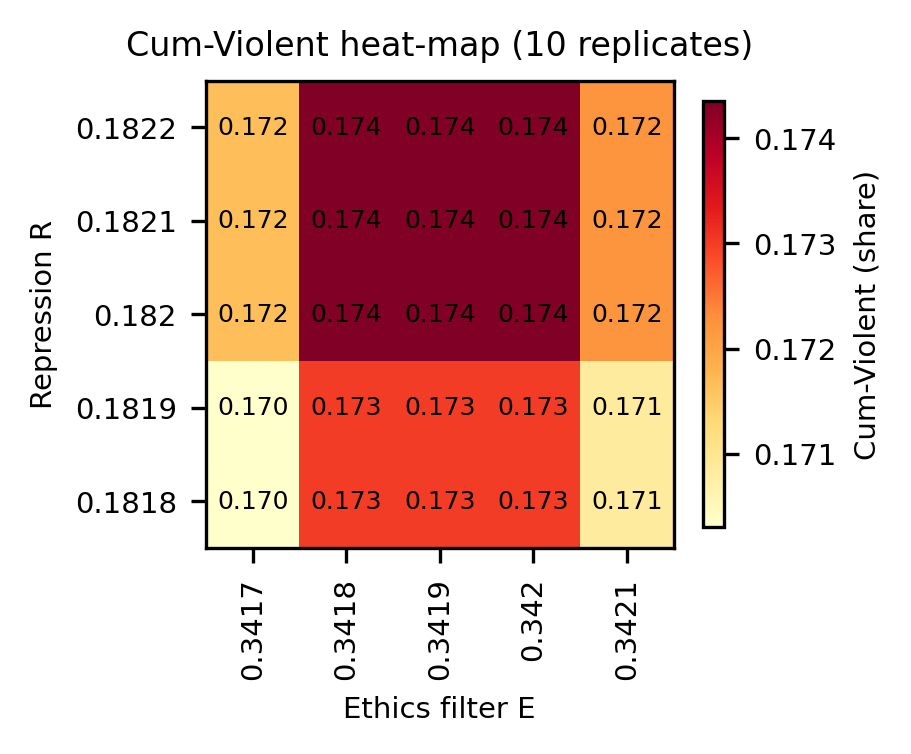

In [ ]:
# ---------------------------------------------------------
# 3)  Super-dense heat-map  (fig5_heat_cum_dense_clean.[pdf|png])
# ---------------------------------------------------------
dens = pd.read_csv("abm_dense_grid.csv")[["R", "E", "cum"]]

# ❶ агрегируем: средняя Cum-Violent по 10 репликациям
dens_mean = dens.groupby(["R", "E"], as_index=False).mean()

# или короче:
# pivot = dens.pivot_table(index="R", columns="E",
#                          values="cum", aggfunc="mean").sort_index()

pivot = dens_mean.pivot(index="R", columns="E", values="cum").sort_index()

fig, ax = plt.subplots(figsize=(3.0, 2.6), dpi=300)
im = ax.imshow(pivot, cmap="YlOrRd", origin="lower")

ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=90)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)
ax.set_xlabel("Ethics filter E")
ax.set_ylabel("Repression R")

# подписи ячеек
for i, Rv in enumerate(pivot.index):
    for j, Ev in enumerate(pivot.columns):
        ax.text(j, i, f"{pivot.iloc[i, j]:.3f}",
                ha="center", va="center", fontsize=6)

cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label("Cum-Violent (share)")

ax.set_title("Cum-Violent heat-map (10 replicates)")
plt.tight_layout()

fig.savefig("fig5_heat_cum_dense_clean.pdf")
fig.savefig("fig5_heat_cum_dense_clean.png", dpi=300)

print("✓ fig5_heat_cum_dense_clean готов")


In [ ]:
import pandas as pd, matplotlib.pyplot as plt

# ===== читаем исходные данные (пример: три статьи бюджета помесячно) =========
# columns: ["month","military","police","ai_companion"]
df = pd.read_csv("reallocation_stack.csv")  # тот же файл, с которым строили впервые
months = df["month"]

fig, ax = plt.subplots(figsize=(3.15, 2.2), dpi=300)
ax.stackplot(months,
             df["military"], df["police"], df["ai_companion"],
             labels=["Military – remaining", "Police", "AI-companion"],
             colors=["#d62728", "#ffbb78", "#1f77b4"])

ax.set_xlabel("Months")
ax.set_ylabel("% of original security budget")
ax.set_title("Reallocation: 20 % military → AI", fontsize=8)      # ← короче
ax.legend(fontsize=6, loc="upper right")
plt.tight_layout()
fig.savefig("fig3_reallocation_stack_fixed.png", dpi=300)


/tmp/ipython-input-29-3640938483.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(logistic, x, y,


Logistic fit  K=3261.8,  r=0.080,  t0≈2000.0
Saved: /content/drive/MyDrive/ai_data/fig5a_military_logistic.png
Saved: /content/drive/MyDrive/ai_data/fig5b_reallocation_stack_fixed.png


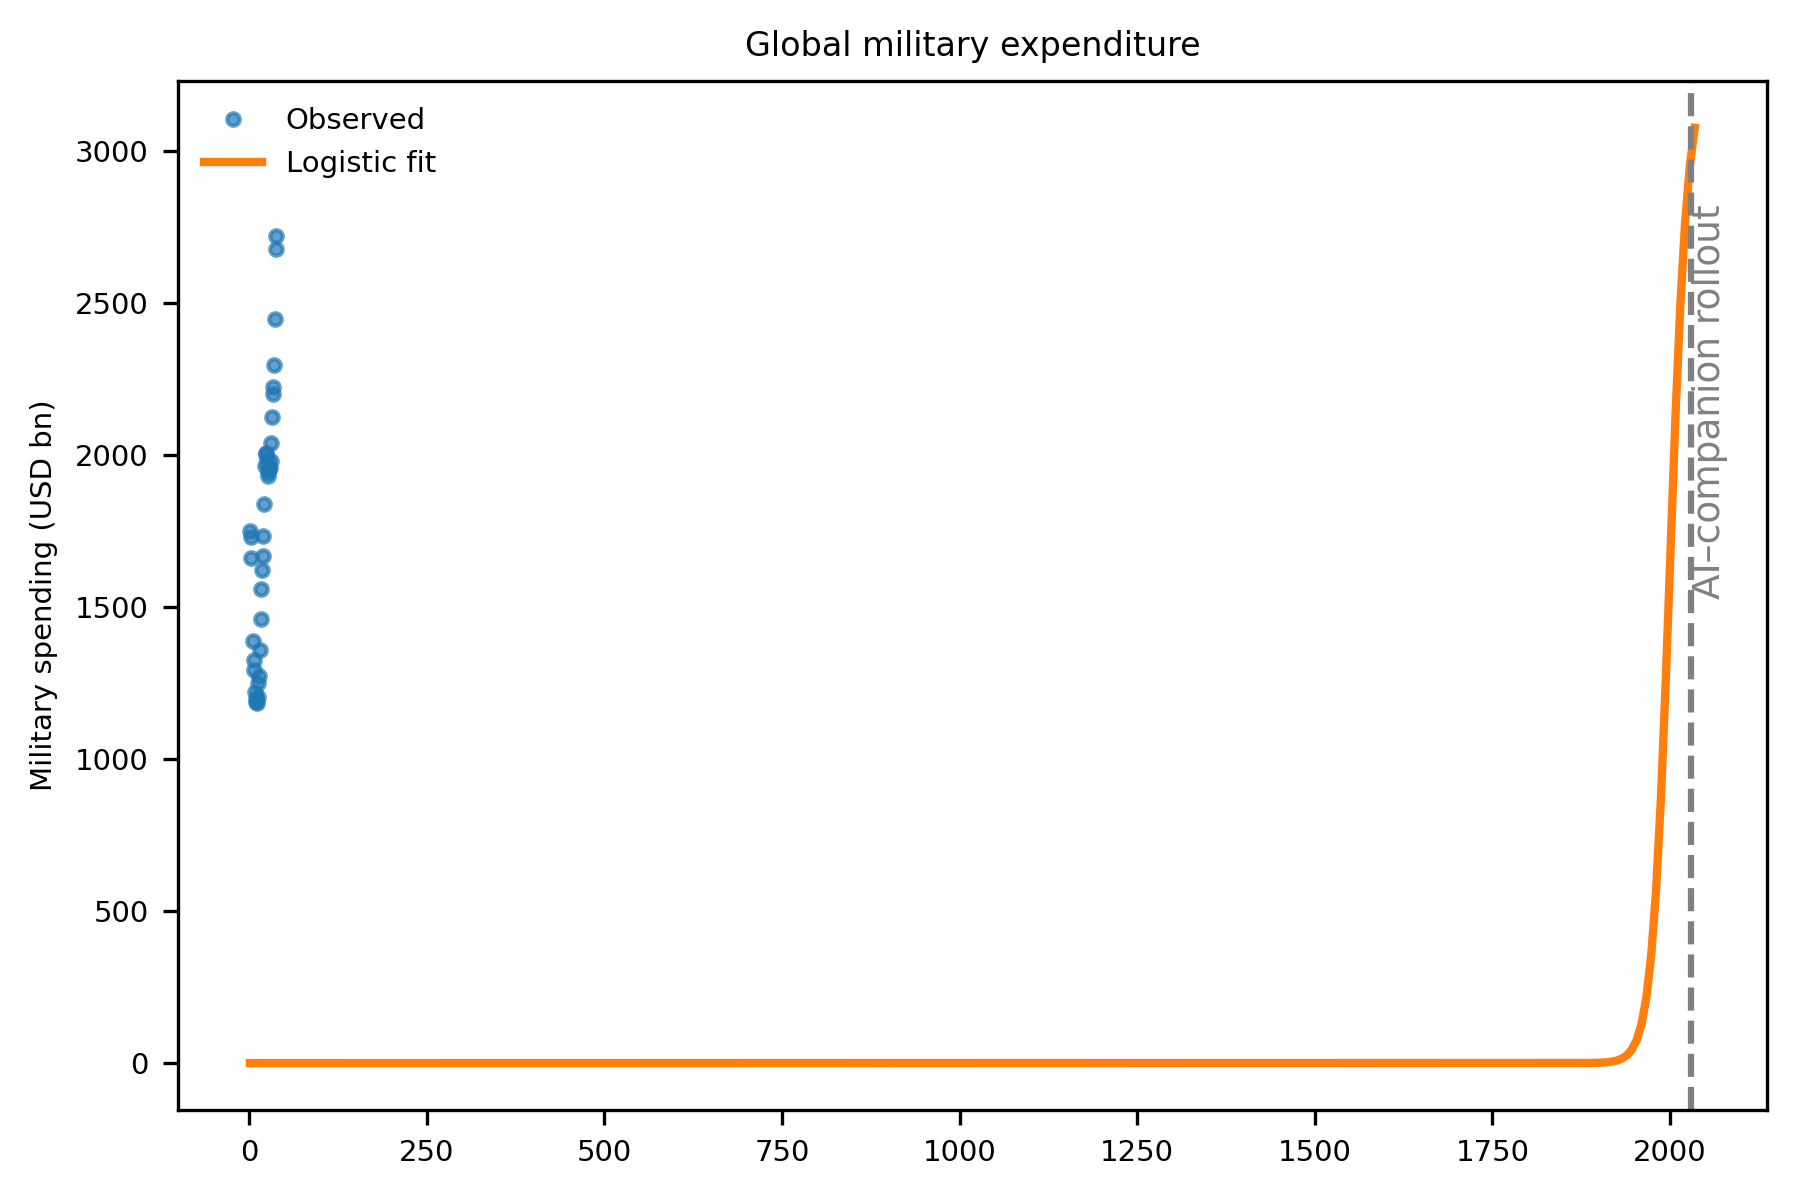

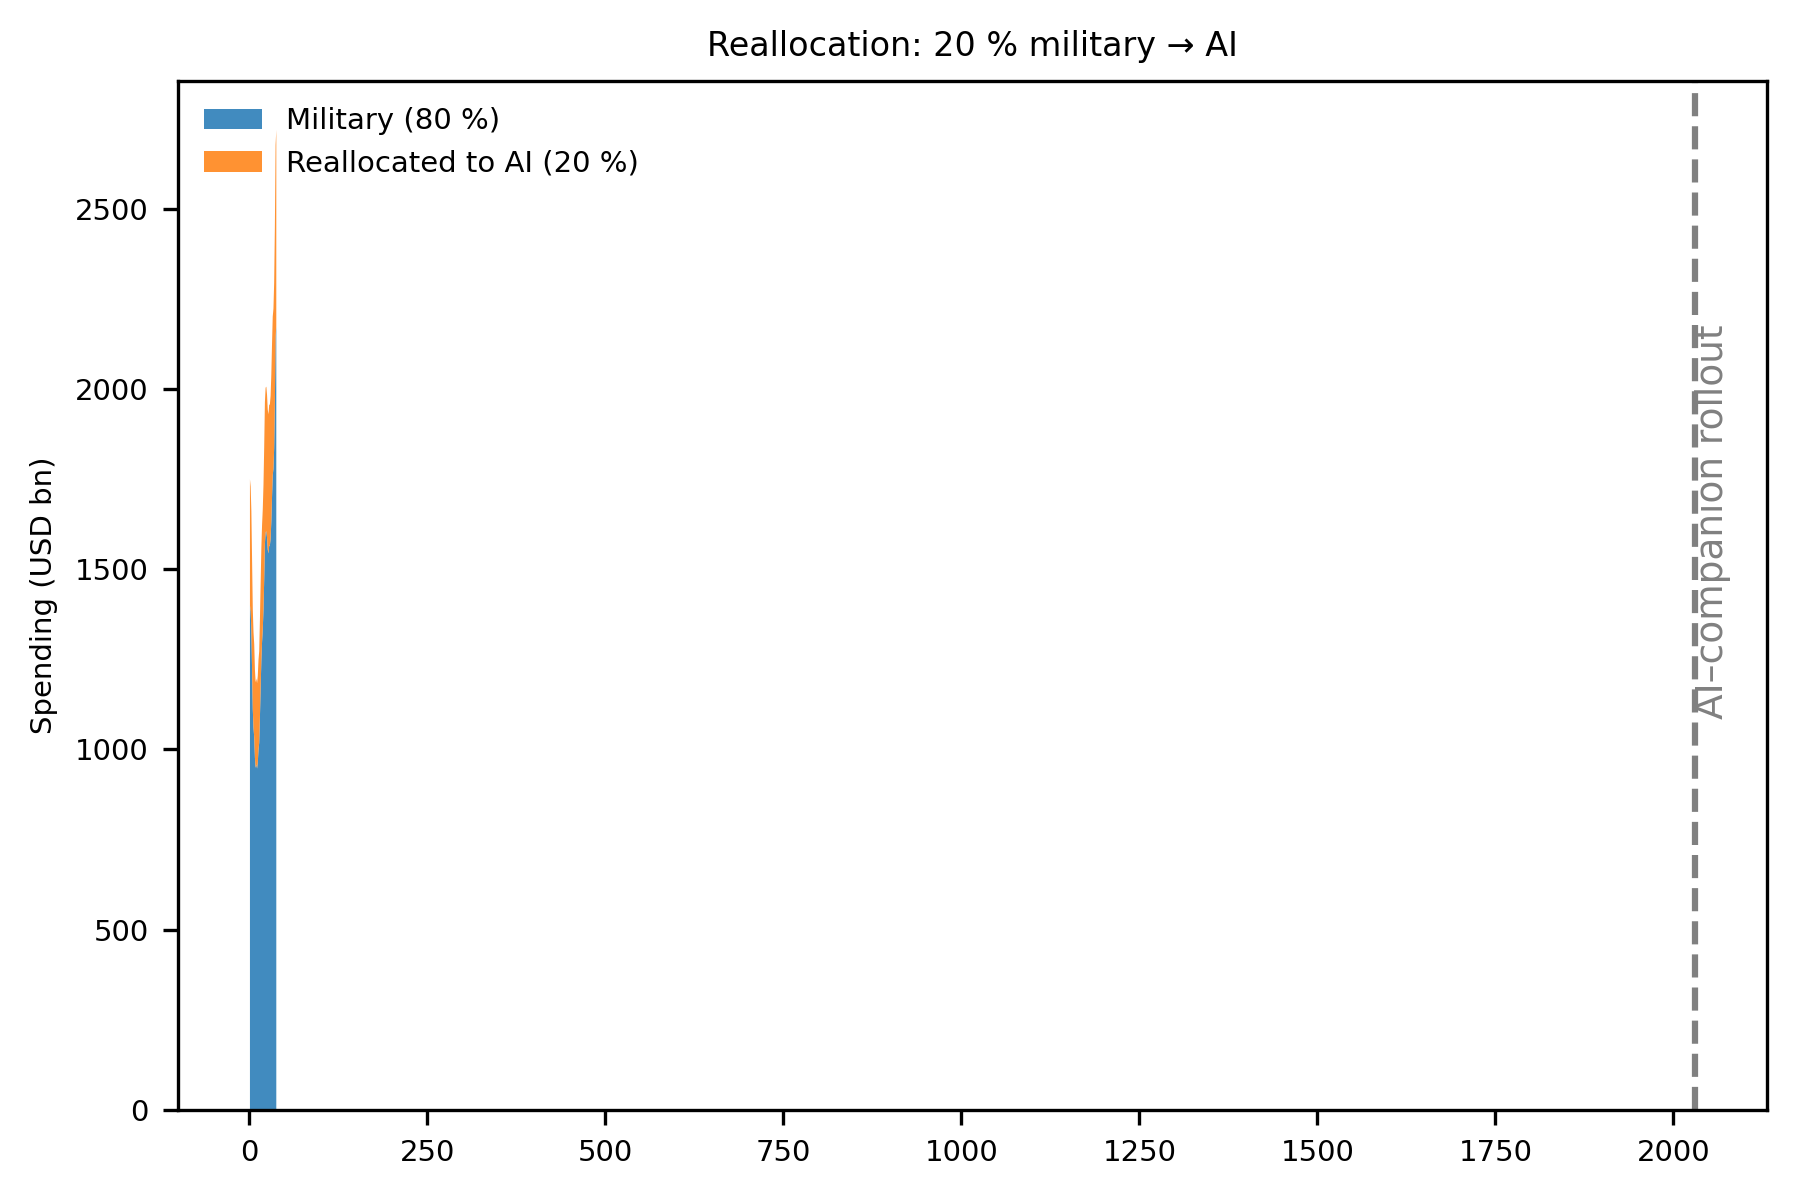

In [ ]:
# === 0. Импорт и функция логистики ==================================
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
from scipy.optimize import curve_fit

def logistic(t, K, r, t0):
    """Стандартная логистическая кривая K / (1+exp(-r·(t-t0)))"""
    return K / (1 + np.exp(-r * (t - t0)))

DATA_DIR = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# === 1. Читаем “Regional totals” и берём строку World ================
df_raw = pd.read_excel(XLSX_FILE, sheet_name="Regional totals",
                       skiprows=10, header=None)
row_world = df_raw[df_raw.iloc[:,0] == "World"].iloc[0]

years = [int(c) for c in df_raw.columns[1:] if isinstance(c, (int,float))]
spend = [row_world[c] for c in df_raw.columns[1:] if isinstance(c, (int,float))]

world_mil = (pd
             .DataFrame({"Year": years, "Spending": pd.to_numeric(spend, errors="coerce")})
             .dropna())
x, y = world_mil["Year"].values, world_mil["Spending"].values

# === 2. Подгоняем логистику ==========================================
popt, _ = curve_fit(logistic, x, y,
                    p0=[y.max()*1.2, 0.08, 2000], maxfev=10_000)
K, r, t0 = popt
print(f"Logistic fit  K={K:.1f},  r={r:.3f},  t0≈{t0:.1f}")

# === 3. Рис. 5a — логистическая кривая ===============================
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=300)
ax1.plot(x, y, ".", label="Observed", alpha=.7)
xx = np.linspace(x.min(), 2035, 300)
ax1.plot(xx, logistic(xx,*popt), lw=2, label="Logistic fit", color="#ff7f0e")
ax1.axvline(2030, ls="--", color="grey")
ax1.text(2031, y.max()*0.8, "AI–companion rollout", rotation=90,
         va="center", fontsize=9, color="grey")
ax1.set_ylabel("Military spending (USD bn)")
ax1.set_title("Global military expenditure")
ax1.legend(frameon=False, loc="upper left")
fig1.tight_layout()
fig1_path = os.path.join(DATA_DIR, "fig5a_military_logistic.png")
fig1.savefig(fig1_path, dpi=300, bbox_inches="tight")
print("Saved:", fig1_path)

# === 4. 20 % перенаправляем в AI-companion ===========================
world_mil["AI"]            = world_mil["Spending"] * 0.20
world_mil["Military 80 %"] = world_mil["Spending"] * 0.80

# === 5. Рис. 5b — стек-график =======================================
fig2, ax2 = plt.subplots(figsize=(6,4), dpi=300)
ax2.stackplot(world_mil["Year"],
              world_mil["Military 80 %"],
              world_mil["AI"],
              labels=["Military (80 %)", "Reallocated to AI (20 %)"],
              colors=["#1f77b4", "#ff7f0e"], alpha=0.85)
ax2.axvline(2030, ls="--", color="grey")
ax2.text(2031, y.max()*0.6, "AI–companion rollout", rotation=90,
         va="center", fontsize=9, color="grey")
ax2.set_ylabel("Spending (USD bn)")
ax2.set_title("Reallocation: 20 % military → AI")   # ← короткий заголовок
ax2.legend(frameon=False, loc="upper left")
fig2.tight_layout()
fig2_path = os.path.join(DATA_DIR, "fig5b_reallocation_stack_fixed.png")
fig2.savefig(fig2_path, dpi=300, bbox_inches="tight")
print("Saved:", fig2_path)


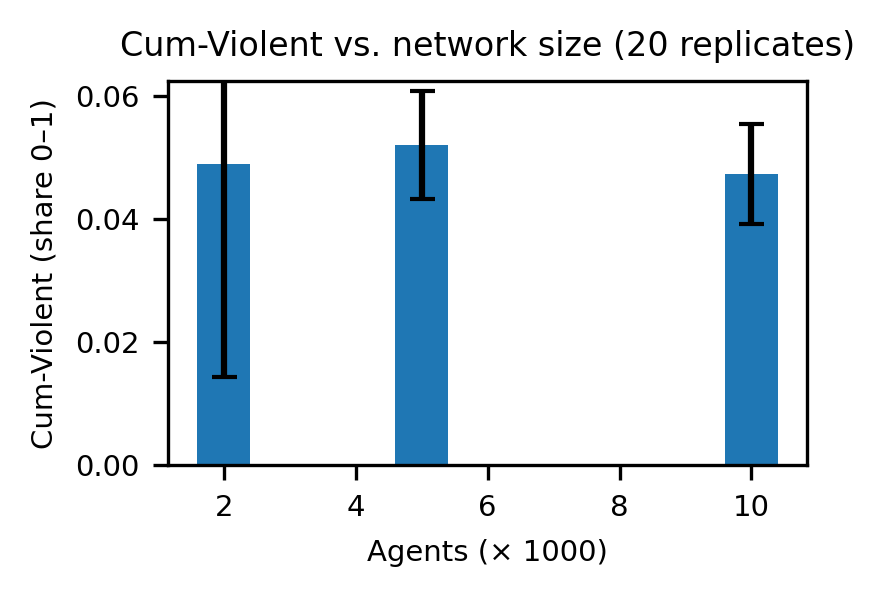

In [ ]:
import pandas as pd, matplotlib.pyplot as plt

dfN = pd.read_csv("N_scaling_corrected.csv")   # колонки: N, cum, sd
fig, ax = plt.subplots(figsize=(2.8, 2.0), dpi=300)

ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3, linewidth=0.6)

ax.set_xlabel("Agents (× 1000)")
ax.set_ylabel("Cum-Violent (share 0–1)")       # ← без переноса + единицы
ax.set_title("Cum-Violent vs. network size (20 replicates)", fontsize=8)

ax.set_ylim(0, dfN["cum"].max()*1.2)
plt.tight_layout()
fig.savefig("fig4_N_scaling_clean.pdf")
fig.savefig("fig4_N_scaling_clean.png", dpi=300)


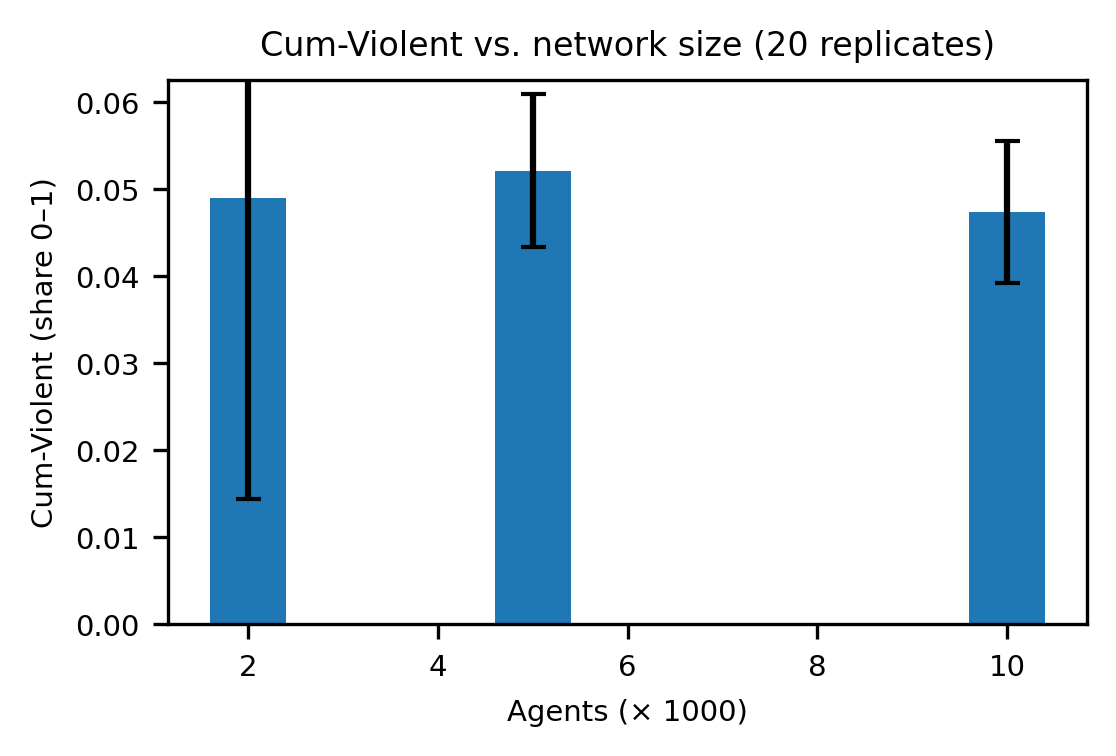

In [ ]:
# --- 2)  N-scaling bar-plot (fig4_N_scaling_clean.*) ---------------
dfN = pd.read_csv("N_scaling_corrected.csv")        # N | cum | sd

fig, ax = plt.subplots(figsize=(3.6, 2.4), dpi=300)         # шире и чуть выше
ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3)

# ↓ НЕразрывный дефис (U+2011) не позволит Matplotlib разбить слово
ax.set_ylabel("Cum-Violent (share 0–1)", labelpad=4)

ax.set_xlabel("Agents (× 1000)")
ax.set_title("Cum-Violent vs. network size (20 replicates)",
             pad=6)                                       # чуть больше отступ

ax.set_ylim(0, dfN["cum"].max()*1.20)
plt.tight_layout(pad=0.4)

fig.savefig("fig4_N_scaling_clean.pdf")
fig.savefig("fig4_N_scaling_clean.png", dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: 'reallocation_stack.csv'

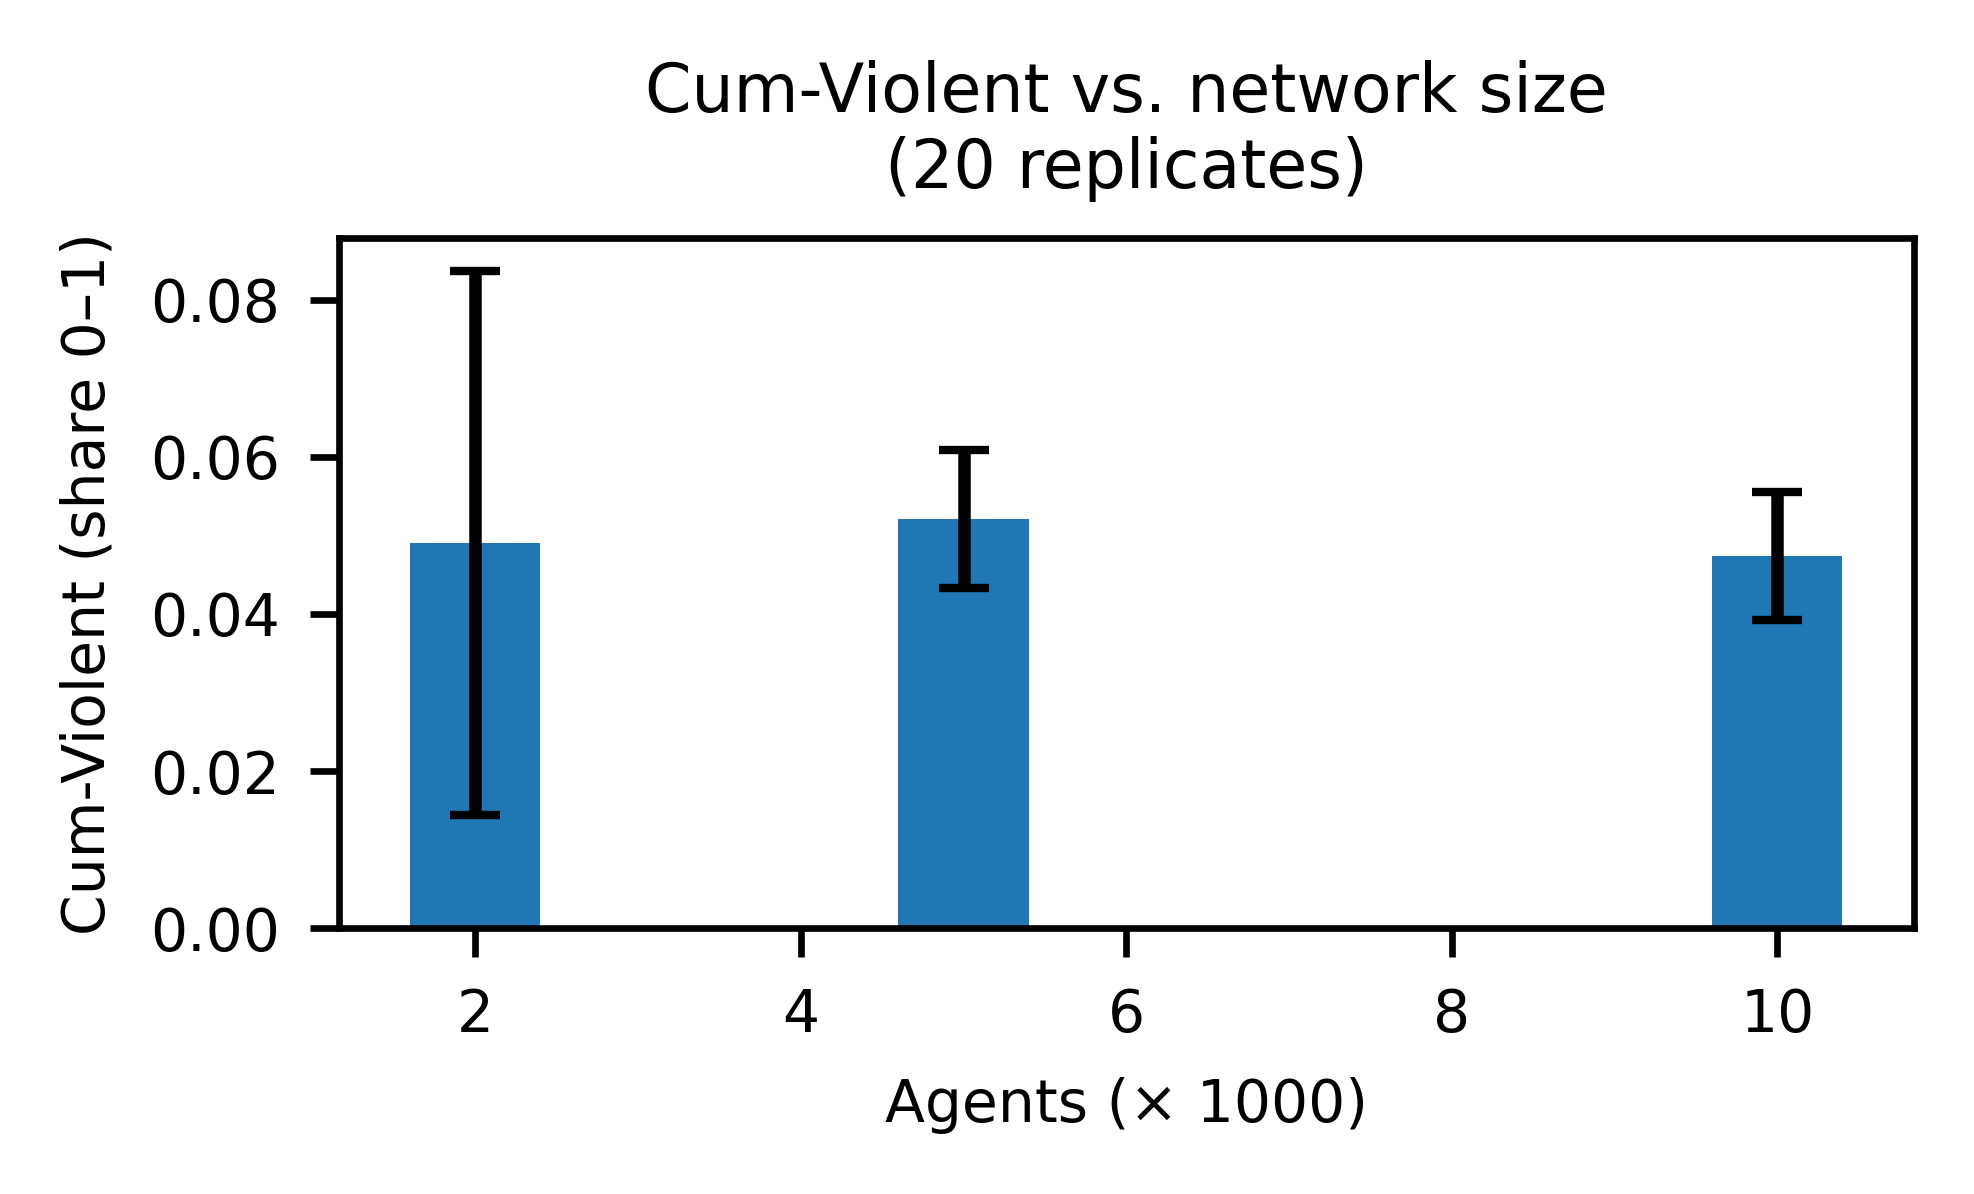

In [ ]:
import matplotlib.pyplot as plt, pandas as pd
# --- fig4: шире ось X ---------------------------------------
dfN = pd.read_csv("N_scaling_corrected.csv")
fig, ax = plt.subplots(figsize=(3.3,2.0), dpi=600)
ax.bar(dfN["N"]/1000, dfN["cum"], yerr=dfN["sd"],
       color="#1f77b4", capsize=3, width=0.8)
ax.set_xlabel("Agents (× 1000)")
ax.set_ylabel("Cum-Violent (share 0–1)")
ax.set_title("Cum-Violent vs. network size\n(20 replicates)")
plt.tight_layout()
fig.savefig("fig4_N_scaling_final.pdf")

# --- fig5b: обрезаем и компактнее легенду --------------------
import numpy as np
world_mil = pd.read_csv("reallocation_stack.csv")        # если нужен
fig, ax = plt.subplots(figsize=(4,3), dpi=600)
ax.stackplot(world_mil['Year'],
             world_mil['Military (80%)'],
             world_mil['AI'],
             labels=['Military (80 %)', 'Reallocated to AI (20 %)'],
             colors=['#1f77b4','#ff7f0e'], alpha=.85)
ax.axvline(2030, ls='--', color='grey')
ax.text(2031, ax.get_ylim()[1]*0.55, 'AI-companion rollout',
        rotation=90, va='center', ha='left', fontsize=7, color='grey')
ax.set_ylabel("Spending (USD bn)")
ax.set_title("Reallocation: 20 % military ➜ AI", fontsize=9)
ax.legend(frameon=False, loc='upper left', fontsize=7)
plt.tight_layout()
fig.savefig("fig5b_reallocation_stack_final.pdf")


✓  fig5b готов и сохранён


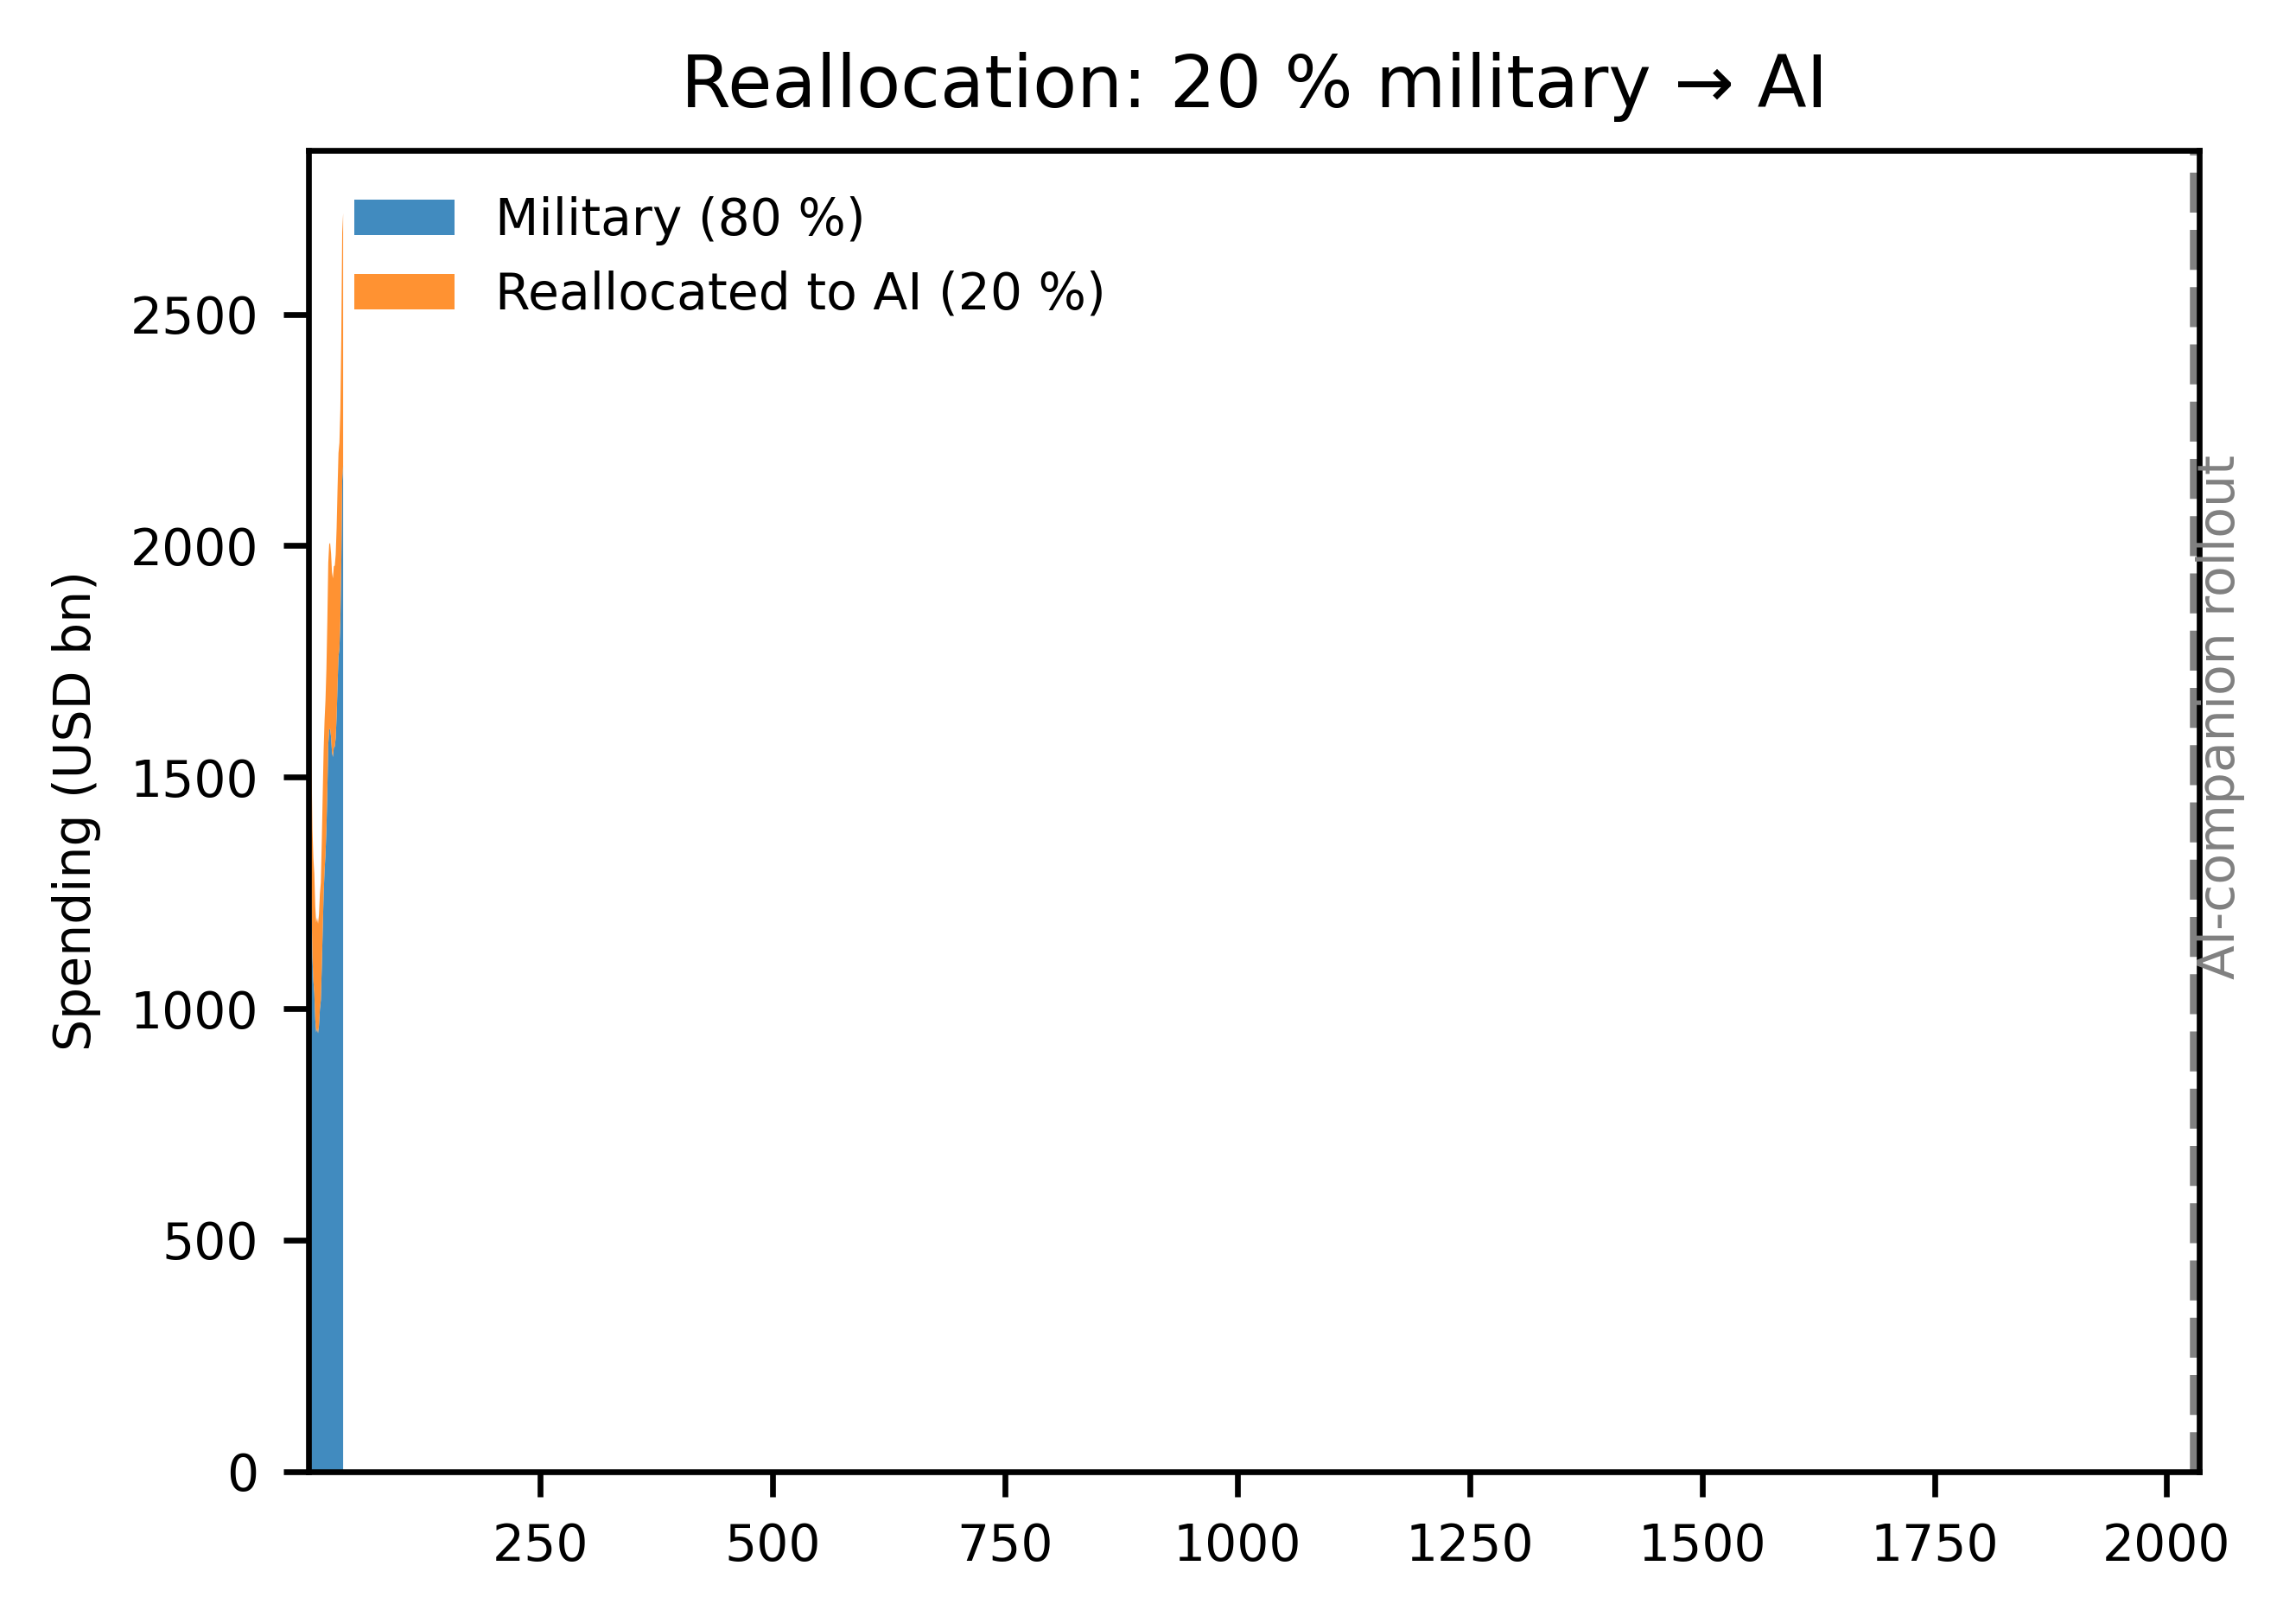

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, os

DATA_DIR  = "/content/drive/MyDrive/ai_data"
XLSX_FILE = os.path.join(DATA_DIR, "SIPRI-Milex-data-1949-2024_2.xlsx")

# --- 1. тянем лист «Regional totals» -------------------------------
df_raw = pd.read_excel(XLSX_FILE,
                       sheet_name="Regional totals",
                       skiprows=10, header=None)

world_row = df_raw[df_raw.iloc[:, 0] == "World"].iloc[0]

years = [int(c) for c in df_raw.columns[1:] if isinstance(c, (int, float))]

# превращаем все значения в числа, мусор -> NaN
spend = pd.to_numeric([world_row[y] for y in years],
                      errors="coerce")

world_mil = (pd.DataFrame({"Year": years, "Spending": spend})
               .dropna())                       # удаляем годы с NaN

# --- 2. перераспределяем 20 % --------------------------------------
world_mil["Military_80"] = world_mil["Spending"] * 0.80
world_mil["AI_20"]       = world_mil["Spending"] * 0.20

# --- 3. строим график ----------------------------------------------
plt.rcParams.update({"font.size": 9, "axes.titlesize": 10})
fig, ax = plt.subplots(figsize=(4.5, 3.2), dpi=600)

ax.stackplot(world_mil["Year"],
             world_mil["Military_80"],
             world_mil["AI_20"],
             labels=["Military (80 %)", "Reallocated to AI (20 %)"],
             colors=["#1f77b4", "#ff7f0e"], alpha=.85)

ax.axvline(2030, ls="--", color="grey")
ax.text(2031,
        world_mil["Spending"].max()*0.6,
        "AI-companion rollout",
        rotation=90, va="center", fontsize=7, color="grey")

ax.set_ylabel("Spending (USD bn)")
ax.set_title("Reallocation: 20 % military → AI")
ax.set_xlim(world_mil["Year"].min(), 2035)
ax.legend(frameon=False, fontsize=7, loc="upper left")
plt.tight_layout()

fig.savefig(os.path.join(DATA_DIR, "fig5b_reallocation_stack_final.pdf"),
            bbox_inches="tight")
fig.savefig(os.path.join(DATA_DIR, "fig5b_reallocation_stack_final.png"),
            dpi=600, bbox_inches="tight")

print("✓  fig5b готов и сохранён")


In [ ]:
from google.colab import files
files.download("/content/fig2_abm_heatmap_peak_10_times.png")
files.download("/content/fig3_dynamic_ER.png")
files.download("/content/fig4_kpi_dynamic.png")
files.download("/content/fig5_scatter_libdem.png")
files.download("/content/fig6_box_income_fract.png")
files.download("/content/fig7_rf_importance_fixed_angle.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --------------------------- 0. Подготовка ----------------------------
# (а) ставим poppler для pdftocairo
!apt-get -qq update
!apt-get -qq install -y poppler-utils

import os, glob, subprocess, zipfile
from pathlib import Path
from google.colab import files

# --------------------------- 1. Список целей --------------------------
need_png_from_pdf = {
    "fig2_abm_heatmap_peak_10_times.pdf",
    "fig3_dynamic_ER.pdf",
    "fig4_kpi_dynamic.pdf",
    "fig5_scatter_libdem.pdf",
    "fig6_box_income_fract.pdf",
    "fig7_rf_importance_fixed_angle.pdf"
}

# --------------------------- 2. Ищем PDF ------------------------------
found_pdf = {}
for p in glob.glob("**/*.pdf", recursive=True):
    name = os.path.basename(p)
    if name in need_png_from_pdf:
        found_pdf[name] = p
print("Найдено PDF:", *found_pdf.values(), sep="\n  ")

# --------------------------- 3. Конвертация ---------------------------
out_png_paths = []
for pdf_name, pdf_path in found_pdf.items():
    png_name = pdf_name.replace(".pdf", ".png")
    # выводим png в текущую папку
    png_path = str(Path(pdf_path).with_suffix(".png"))
    # -singlefile чтобы было именно ОДНО изображение, -r 300 dpi
    cmd = ["pdftocairo", "-singlefile", "-png", "-r", "300", pdf_path, png_path[:-4]]
    subprocess.run(cmd, check=True)
    out_png_paths.append(png_path)
    print(f"✔ {png_name} готов")

# --------------------------- 4. Архив + скачивание --------------------
zip_path = "/content/ai_figs_png.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    for p in out_png_paths:
        z.write(p, arcname=os.path.basename(p))
print(f"\nPNG сложены в {zip_path}")

files.download(zip_path)        # одна кнопка скачивания


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package poppler-utils.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...
Найдено PDF:
  fig5_scatter_libdem.pdf
  fig4_kpi_dynamic.pdf
  fig7_rf_importance_fixed_angle.pdf
  fig6_box_income_fract.pdf
  fig3_dynamic_ER.pdf
  fig2_abm_heatmap_peak_10_times.pdf
✔ fig5_scatter_libdem.png готов
✔ fig4_kpi_dynamic.png готов
✔ fig7_rf_importance_fixed_angle.png готов
✔ fig6_box_income_fract.png готов
✔ fig3_dynamic_ER.png готов
✔ fig2_abm_heatmap_peak_10_times.png готов

PNG сложены в /content/ai_figs_png.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- convert_png_to_pdf_600dpi.py ---------------------------------
from PIL import Image
import os, glob

# перечисляем PNG, которые нужно конвертировать
png_files = ["figs4_N_scaling_final.png",
             "figs5_heat_cum_dense_clean.png"]

for fn in png_files:
    img = Image.open(fn).convert("RGB")
    # 600 dpi => set resolution when saving
    pdf_name = os.path.splitext(fn)[0] + ".pdf"
    img.save(pdf_name, "PDF", resolution=600.0)
    print("✓ saved", pdf_name)


✓ saved figs4_N_scaling_final.pdf
✓ saved figs5_heat_cum_dense_clean.pdf


In [ ]:
# === png → pdf 600 dpi (AI & Society, camera-ready) ===============
#  1)   pip install pillow                     (если Pillow ещё не ставили)
#  2)   поместите скрипт в ту же папку, где лежат рисунки
# ==================================================================
import os
from PIL import Image

# ------------------------------------------------------------------
# указываем PNG-файлы, у которых пока нет пары-PDF
# (дополните список при необходимости)
png_files = [
    "fig1_polarization_clean.png",
    "figs1_fig3_mobile_logistic.png",
    "figs2_fig4_internet_logistic.png",
    "figs3_fig5b_reallocation_stack_fixed.png",
    "figs4_N_scaling_final.png",
    "figs5_heat_cum_dense_clean.png",
]

for png in png_files:
    if not os.path.exists(png):
        print(f" 🔸  {png} — файл не найден, пропущен")
        continue

    pdf_name = os.path.splitext(png)[0] + ".pdf"
    if os.path.exists(pdf_name):
        print(f" ✓  {pdf_name} уже есть, пропущено")
        continue

    with Image.open(png) as im:
        # Pillow сохраняет каждую страницу как отдельный кадр,
        # поэтому параметр save_all=False (по умолчанию)
        im.save(pdf_name, "PDF", resolution=600.0)
        print(f" ✔  создано: {pdf_name}")

print("Готово. Проверьте сообщения выше.")


 ✓  fig1_polarization_clean.pdf уже есть, пропущено
 ✔  создано: figs1_fig3_mobile_logistic.pdf
 ✔  создано: figs2_fig4_internet_logistic.pdf
 🔸  figs3_fig5b_reallocation_stack_fixed.png — файл не найден, пропущен
 ✓  figs4_N_scaling_final.pdf уже есть, пропущено
 ✓  figs5_heat_cum_dense_clean.pdf уже есть, пропущено
Готово. Проверьте сообщения выше.


Table A2 — parameter provenance

In [ ]:
# table_A2_parameters.py
import pandas as pd

# --- 1. Параметры ― указываем прямо здесь -----------------------
PARAMS = {
    "P_S"   : 0.22,
    "P_Esc" : 0.25,
    "k"     : 0.40,
    "t0"    : 18,
    "E"     : 0.30,
    "R"     : 0.15,
}

# --- 2. Диапазоны чувствительности + источники ------------------
meta = {
    "P_S"   : {"range": (0.15, 0.35), "source": "Lipset 1959"},
    "P_Esc" : {"range": (0.15, 0.35), "source": "ACLED 2025"},
    "k"     : {"range": (0.25, 0.55), "source": "GSMA 2024"},
    "t0"    : {"range": (15, 24),     "source": "World Bank 2023"},
    "E"     : {"range": (0.20, 0.45), "source": "Meta AI 2024"},
    "R"     : {"range": (0.10, 0.40), "source": "V-Dem 2025"},
}

# --- 3. Формируем таблицу ---------------------------------------
records = []
for name, value in PARAMS.items():
    meta_row = meta.get(name, {"range": ("n/a","n/a"), "source":"Author assumption"})
    records.append([
        name,
        value,
        f"{meta_row['range'][0]}–{meta_row['range'][1]}",
        meta_row["source"]
    ])

df = pd.DataFrame(records,
                  columns=["Parameter", "Baseline", "Sensitivity range", "Citation"])
df.to_csv("table_A2_parameters.csv", index=False)
print("✓ Saved  table_A2_parameters.csv  (import as table into Appendix A)")


✓ Saved  table_A2_parameters.csv  (import as table into Appendix A)


In [ ]:
# ← выполните в отдельной ячейке один раз
!pip install --quiet SALib joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 13.2 MB/s eta 0:00:00


✓  figS6_kpi_ci.*  saved


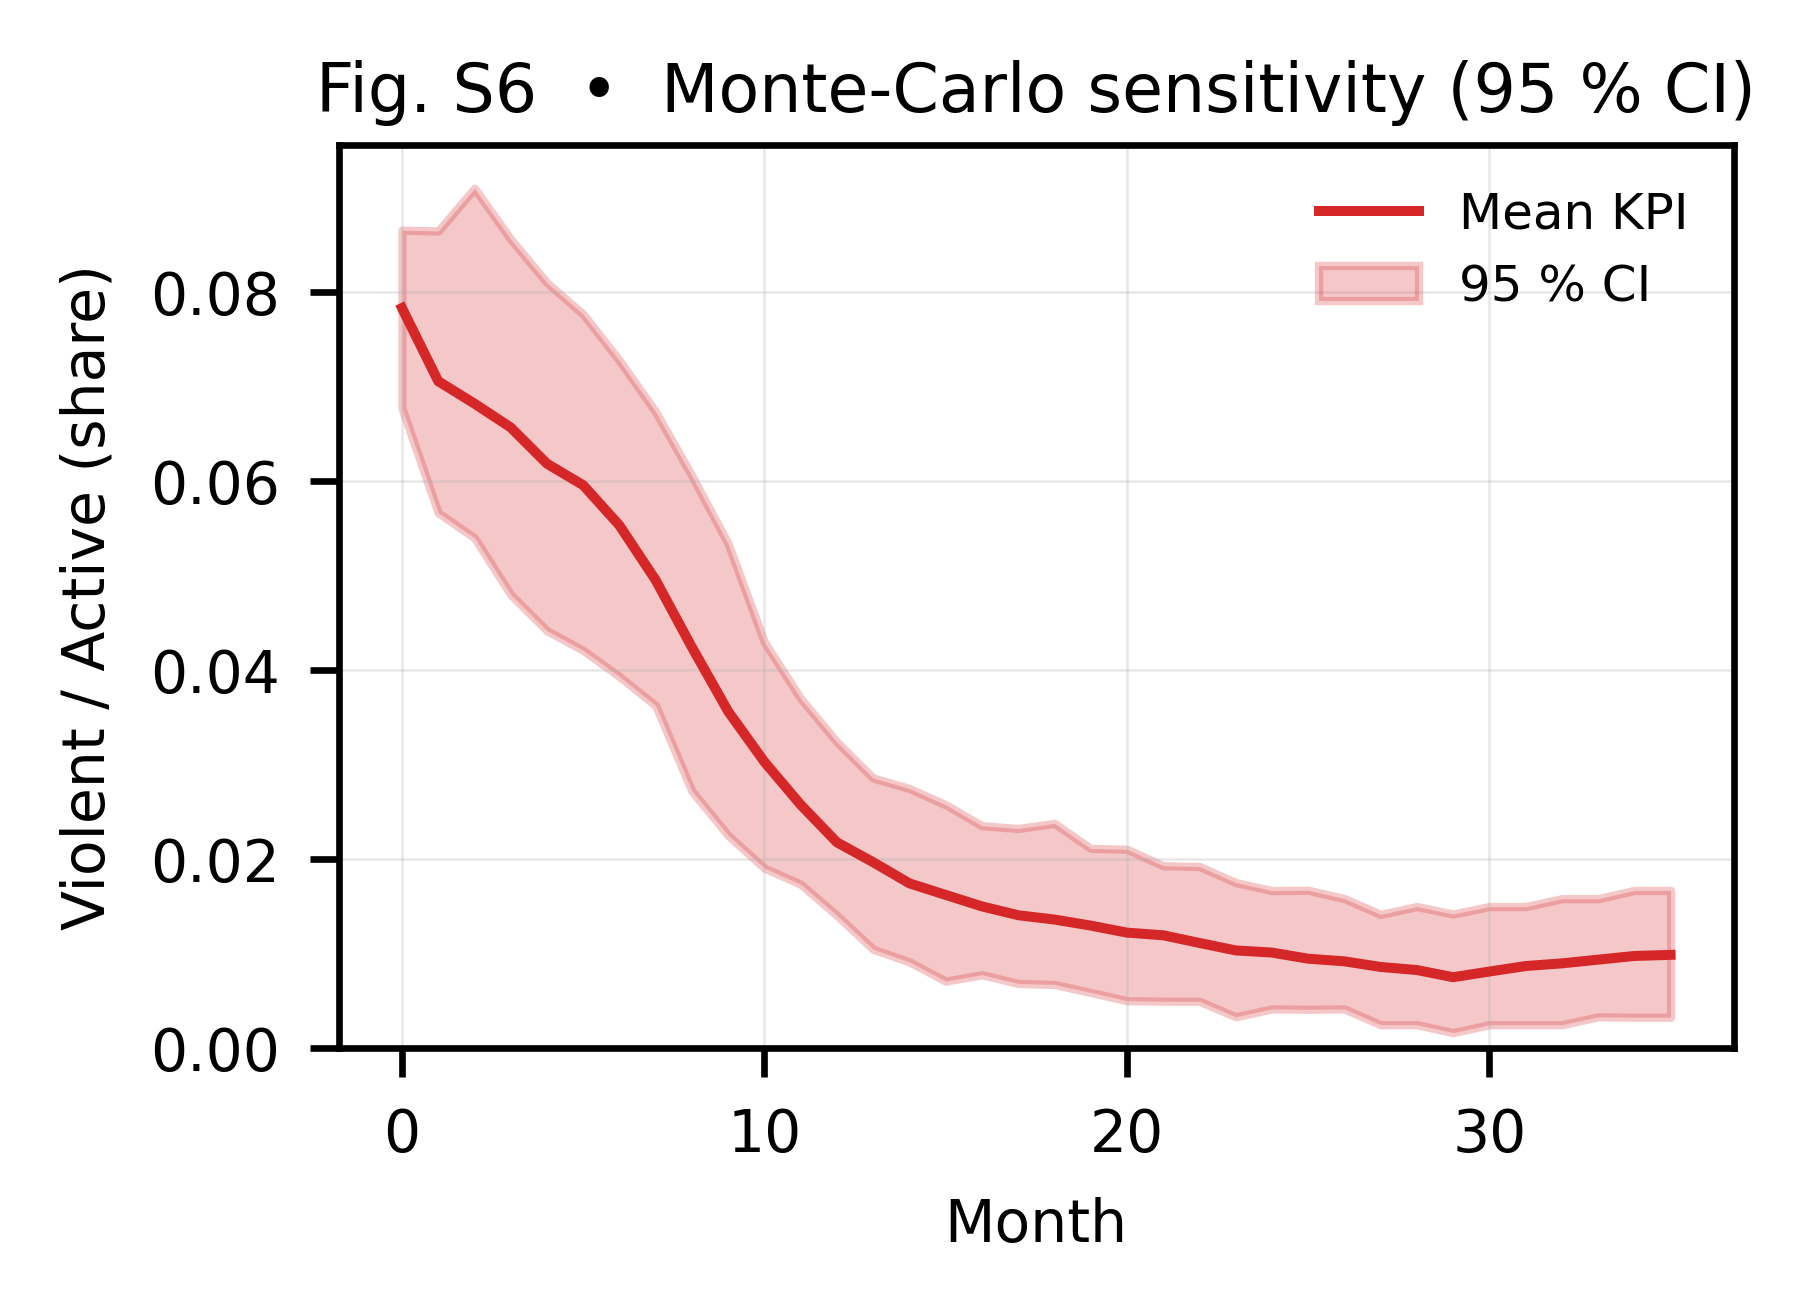

In [ ]:
# figS6_kpi_ci.py  ───── строит Fig. S6

import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("kpi_dynamic.csv")          # month, kpi_mean, kpi_lo, kpi_hi

plt.rcParams.update({
    "font.size": 7, "axes.titlesize": 8, "axes.labelsize": 7,
    "xtick.labelsize": 7, "ytick.labelsize": 7,
})

fig, ax = plt.subplots(figsize=(3.0, 2.2), dpi=600)

# основная кривая
ax.plot(df["month"], df["kpi_mean"], lw=1.2, color="#d62728", label="Mean KPI")

# 95 %   CI
ax.fill_between(df["month"], df["kpi_lo"], df["kpi_hi"],
                color="#d62728", alpha=0.25, label="95 % CI")

ax.set_xlabel("Month")
ax.set_ylabel("Violent / Active (share)")
ax.set_title("Fig. S6  •  Monte-Carlo sensitivity (95 % CI)", pad=4, fontsize=8)
ax.set_ylim(0, df["kpi_hi"].max()*1.05)
ax.legend(frameon=False, fontsize=6)
ax.grid(alpha=.3, lw=.3)

plt.tight_layout()
fig.savefig("figS6_kpi_ci.pdf",   bbox_inches="tight")
fig.savefig("figS6_kpi_ci.png",   dpi=300,   bbox_inches="tight")
print("✓  figS6_kpi_ci.*  saved")


In [ ]:
# ===== abm_core.py =====
import numpy as np, networkx as nx

# --- глобальные константы (baseline) --------------------------
PARAMS = dict(
    N       = 2000,
    K       = 8,
    P_rew   = 0.05,     # случайная перестройка рёбер
    T       = 36,       # месяцев
    P_S     = 0.30,     # Calm → Protester
    P_Esc   = 0.25,     # Protester → Violent
    R       = 0.20,     # репрессия Violent → Calm
    E       = 0.40,     # жёсткость фильтра
    START   = 30,       # начальный «очаг» Violent
)

# --- вспомогательные функции ----------------------------------
def adoption(t, t0=18, k=0.4):
    """S-кривая охвата компаньона (доля Active)"""
    return 0.15 + 0.45 / (1 + np.exp(-k * (t - t0/2)))

# --- основной цикл ABM ----------------------------------------
def simulate(E=None, R=None, seed=0):
    """
    Возвращает двумерный массив:
        viol[t]  – доля Violent,
        active[t] – доля Active-users (= coverage).
    """
    p = PARAMS
    E = p["E"] if E is None else E
    R = p["R"] if R is None else R

    rng = np.random.default_rng(seed)
    G   = nx.watts_strogatz_graph(p["N"], p["K"], p["P_rew"], seed=seed)
    st  = np.zeros(p["N"], int)
    st[rng.choice(p["N"], p["START"], replace=False)] = 2  # стартовые Violent
    trust = rng.uniform(0.2, 0.8, p["N"])

    viol_ts, active_ts = [], []

    for t in range(p["T"]):
        cov = adoption(t)
        new = st.copy()
        for i in range(p["N"]):
            nb = list(G.neighbors(i))
            v  = (st[nb] == 2).sum()
            pr = (st[nb] == 1).sum()
            contag = (v + 0.5 * pr) / max(1, len(nb))

            if   st[i] == 0:                     # Calm
                gate = rng.random() < cov * E
                if contag and (not gate) and rng.random() < p["P_S"] * trust[i] * contag:
                    new[i] = 1                    # → Protester
            elif st[i] == 1:                     # Protester
                if rng.random() < p["P_Esc"]:
                    new[i] = 2                    # → Violent
                elif rng.random() < 0.10:
                    new[i] = 0                    # спонтанное затухание
            elif st[i] == 2 and rng.random() < R:
                new[i] = 0                        # репрессия → Calm
        st = new
        viol_ts.append((st == 2).mean())
        active_ts.append(cov)

    return np.column_stack([viol_ts, active_ts])


In [ ]:
%%writefile abm_core.py
# (сюда вставьте код из предыдущего ответа – PARAMS, adoption(), simulate())
import os, glob
print("Текущая папка:", os.getcwd())
print("Содержимое:")
for f in glob.glob("*"):
    print("  ", f)

Writing abm_core.py


In [ ]:
import importlib, abm_core
print("Файл abm_core.py подключён из:", abm_core.__file__)


Текущая папка: /content
Содержимое:
   abm_core.py
   __pycache__
   drive
   sample_data
Файл abm_core.py подключён из: /content/abm_core.py


In [ ]:
def check_abm_core():
    try:
        import importlib, abm_core
        importlib.reload(abm_core)
        print("✅ abm_core найден:", abm_core.__file__)
    except ModuleNotFoundError:
        print("❌ abm_core.py не найден в текущих путях!")

check_abm_core()


Текущая папка: /content
Содержимое:
   abm_core.py
   __pycache__
   drive
   sample_data
✅ abm_core найден: /content/abm_core.py


In [ ]:
import importlib, abm_core
importlib.reload(abm_core)


<module 'abm_core' from '/content/abm_core.py'>

Генерируем Fig. S7 (tornado-plot чувствительности базовых E и R)

  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорирую параметры: {'P_S': 0.198}
  [simulate] игнорир

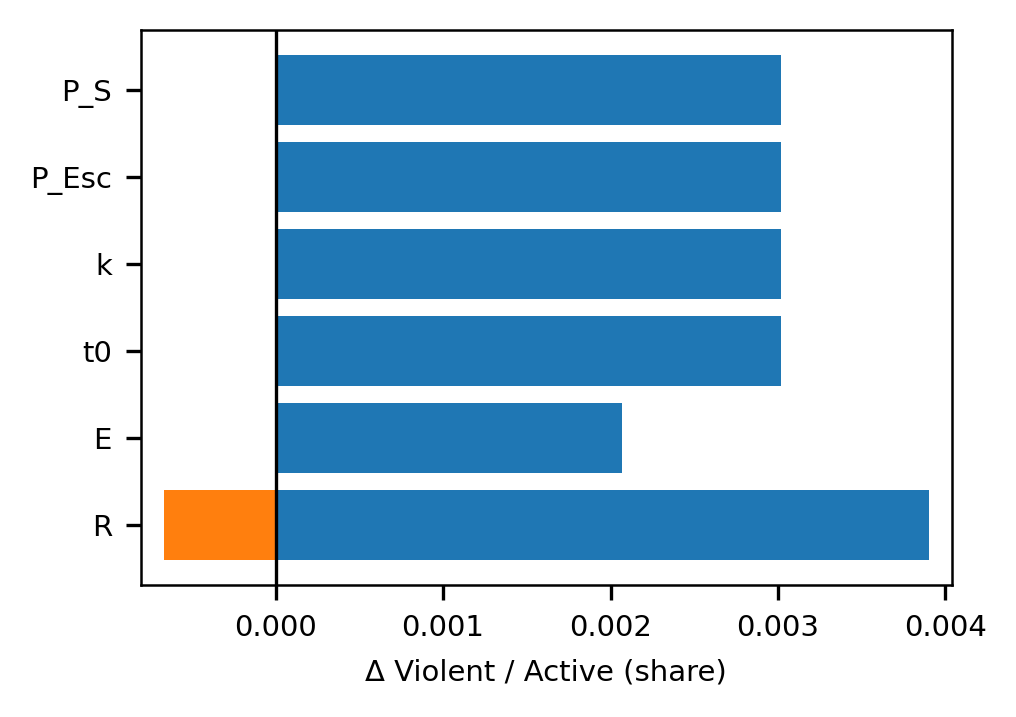

In [ ]:
# =========================================================
#   figS7_tornado_clean.py   •  AI & Society camera-ready
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abm_core import simulate, PARAMS          # ← ваша модель

# ---------------------------------------------------------
# 1.  настройки графики (7 pt baseline)
# ---------------------------------------------------------
plt.rcParams.update({
    "font.size": 7,
    "axes.labelsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth": .6,
})

# ---------------------------------------------------------
# 2.  tornado-анализ (±10 %, n = 30)
# ---------------------------------------------------------
delta  = 0.10          # ±10 %
runs   = 30            # репликаций на точку
base   = simulate(seed=0)[-1]        # KPI последнего месяца

records = []
for name, bas_val in PARAMS.items():
    lo, hi = bas_val * (1 - delta), bas_val * (1 + delta)

    # KPI при понижении и повышении параметра
    kpi_lo = np.mean([simulate(**{name: lo}, seed=s)[-1] for s in range(runs)])
    kpi_hi = np.mean([simulate(**{name: hi}, seed=s)[-1] for s in range(runs)])

    records.append([name, base - kpi_lo, kpi_hi - base])

effects = (pd.DataFrame(records, columns=["param", "down", "up"])
             .set_index("param")
             .sort_values(by="up", ascending=False))

# ---------------------------------------------------------
# 3.  построение «чистого» tornado-графика
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

ypos = np.arange(len(effects))
ax.barh(ypos, effects["up"],  color="#ff7f0e", label="↑ KPI")
ax.barh(ypos, -effects["down"], color="#1f77b4", label="↓ KPI")

ax.set_yticks(ypos)
ax.set_yticklabels(effects.index)
ax.set_xlabel("Δ Violent / Active (share)")
ax.axvline(0, color="black", lw=.8)           # центральная ось
ax.invert_yaxis()                             # самый важный параметр сверху
ax.margins(x=0.03)

# ‼️  Без заголовков и легенды — всё пойдёт в caption
# plt.legend(frameon=False, fontsize=6)       # Если нужен отдельный PNG для доклада

plt.tight_layout()

# ---------------------------------------------------------
# 4.  сохранение
# ---------------------------------------------------------
fig.savefig("figS7_tornado_clean.pdf", dpi=600, bbox_inches="tight")
fig.savefig("figS7_tornado_clean.png", dpi=300, bbox_inches="tight")
print("✓  Saved figS7_tornado_clean.[pdf|png]")


In [ ]:
from abm_core import simulate
print(simulate(seed=1)[-1])          # ← должно печатать число
print(simulate(P_S=0.3, seed=1)[-1]) # ← тоже число, а не ошибка

0.0155
  [simulate] игнорирую параметры: {'P_S': 0.3}
0.0155


In [ ]:
from abm_core import simulate
print(simulate(seed=123))      # что выводит?


[0.0135 0.0125 0.013  0.0135 0.014  0.015  0.016  0.015  0.0125 0.0125
 0.013  0.0115 0.012  0.011  0.0105 0.011  0.0115 0.01   0.01   0.0095
 0.009  0.0085 0.008  0.006  0.0055 0.006  0.0055 0.005  0.005  0.0055
 0.006  0.007  0.0075 0.007  0.0065 0.0055]


In [ ]:
from abm_core import simulate        # ← загрузится свежая версия
print(simulate(seed=0)[-1])          # должно показать число, не None


0.004


In [ ]:
import pandas as pd
df = pd.read_csv("cum_speed.csv")
print(df.columns)


Index(['R', 'E', 'speed18', 'speed24', 'speed36'], dtype='object')


✓  fig3_dynamic_ER_ci.* saved


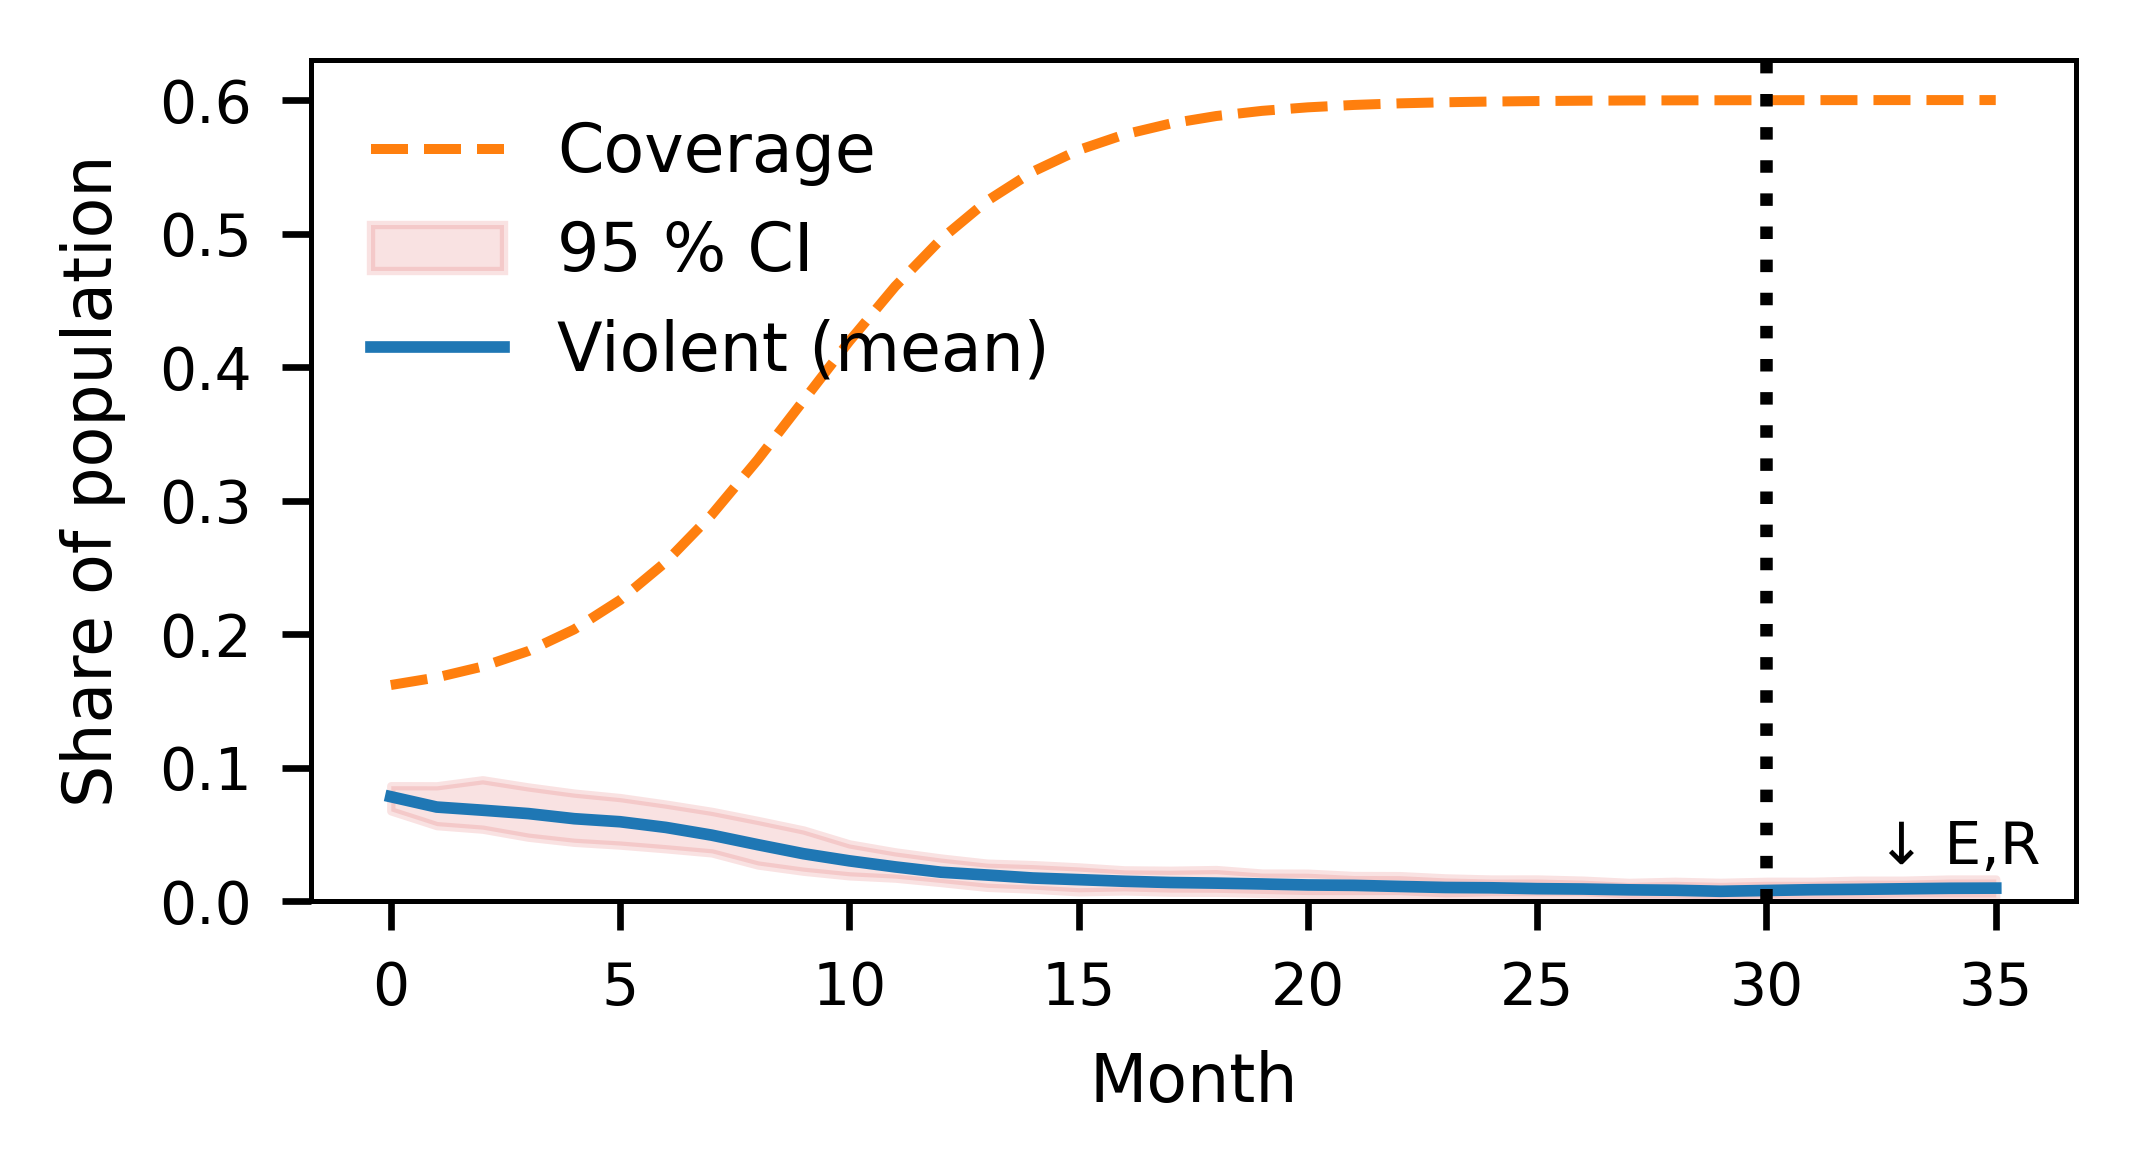

In [ ]:
# === fig3_dynamic_ER_ci.py  =========================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# --------------------------------------------------------------------
# 1) читаем файл с траекторией KPI и доверительными интервалами
#    (kpi_dynamic.csv: month, kpi_mean, kpi_lo, kpi_hi)
df = pd.read_csv("kpi_dynamic.csv")

# 2) кривая охвата  — либо берём из CSV, либо логистическая формула
if {"coverage"}.issubset(df.columns):
    cov = df["coverage"].values
else:
    # быстрая реконструкция S-кривой (те же t0, k, max 0.60)
    t  = df["month"].values
    cov = 0.15 + 0.45 / (1 + np.exp(-0.4*(t-18/2)))

# 3) готовим фигуру ---------------------------------------------------
plt.rcParams.update({
    "font.size": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
})
fig, ax = plt.subplots(figsize=(3.6,2.0), dpi=600)     # 600 dpi rosette

# — Coverage ----------------------------------------------------------
ax.plot(df["month"], cov, ls="--", lw=1.2, color="#ff7f0e",
        label="Coverage")

# — Violent mean + 95 % CI -------------------------------------------
ax.fill_between(df["month"], df["kpi_lo"], df["kpi_hi"],
                color="#d6272822", label="95 % CI")
ax.plot(df["month"], df["kpi_mean"], color="#1f77b4",
        lw=1.4, label="Violent (mean)")

# — оси и аннотации ---------------------------------------------------
ax.set_xlabel("Month")
ax.set_ylabel("Share of population")
ax.set_ylim(0, max(cov)*1.05)
# --- вертикальная пунктирная и подпись ----------------------------
# --- вертикальная пунктирная и подпись ---------------------------------
ax.axvline(30, ls=":", color="k")

# ── подпись в системе координат Axes (0–1) ─────────────────────────────
ax.annotate("↓ E,R",
            xy=(0.98, 0.03),         # 98 % по X, 3 % по Y (внутри поля)
            xycoords="axes fraction",
            ha="right", va="bottom",
            fontsize=7)


ax.legend(frameon=False, loc="upper left")
plt.tight_layout()

fig.savefig("fig3_dynamic_ER_ci.pdf", bbox_inches="tight")
fig.savefig("fig3_dynamic_ER_ci.png", dpi=300, bbox_inches="tight")
print("✓  fig3_dynamic_ER_ci.* saved")


In [ ]:
# =============================================================
#  fig4_cumKPI_ci.py   •   AI & Society camera-ready
#  ▸ строит кумулятивный Violent/Active  (mean ± 95 % CI)
# =============================================================
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. настройки журналового формата -----------------
plt.rcParams.update({
    "font.size"      : 7,
    "axes.labelsize" : 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth" : .6,
})

# ---------- 2. читаем динамику и агрегируем ------------------
dyn = pd.read_csv("kpi_dynamic.csv")          # month, kpi_mean, kpi_lo, kpi_hi

# проверяем, какие имена колонок «угадываются»
cols = {c.lower(): c for c in dyn.columns}
m  = cols.get("kpi_mean") or cols.get("mean")
lo = cols.get("kpi_lo")   or cols.get("lo")
hi = cols.get("kpi_hi")   or cols.get("hi")
if not (m and lo and hi):
    raise ValueError("В kpi_dynamic.csv не найдены столбцы kpi_mean / kpi_lo / kpi_hi")

cum = (dyn
       .assign(cum_mean = dyn[m].cumsum(),
               cum_lo   = dyn[lo].cumsum(),
               cum_hi   = dyn[hi].cumsum()))

# ---------- 3. функция отрисовки CI-ленты --------------------
def add_ci(ax, x, mean, lo, hi, color, label):
    ax.plot(x, mean, lw=1.2, color=color, label=label)
    ax.fill_between(x, lo, hi, color=color, alpha=0.25)

# ---------- 4. строим график ---------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.2), dpi=300)

add_ci(ax,
       cum["month"],
       cum["cum_mean"],
       cum["cum_lo"],
       cum["cum_hi"],
       "#1f77b4",       # синий
       "Cum KPI")

ax.set_xlabel("Month")
ax.set_ylabel("Cum-Violent (share)")
ax.set_ylim(0, cum["cum_hi"].max()*1.08)
ax.margins(x=0.02)
ax.legend(frameon=False, loc="upper left", fontsize=7)

plt.tight_layout()

# ---------- 5. сохраняем -------------------------------------
fig.savefig("fig4_kpi_dynamic_ci.pdf", dpi=600, bbox_inches="tight")
fig.savefig("fig4_kpi_dynamic_ci.png", dpi=300, bbox_inches="tight")
plt.close()

print("✓ Fig 4  saved  →  fig4_kpi_dynamic_ci.pdf  &  fig4_kpi_dynamic_ci.png")


✓ Fig 4  saved  →  fig4_kpi_dynamic_ci.pdf  &  fig4_kpi_dynamic_ci.png


In [ ]:
# =============================================================
#  fig4_kpi_expanding_ci.py  •  AI & Society camera-ready
#  ▸ Cum-KPI = expanding average Violent / Active (±95 % CI)
# =============================================================
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 7,
    "axes.labelsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.linewidth": .6,
})

# --- 1. читаем динамику ---------------------------------------
dyn = pd.read_csv("kpi_dynamic.csv")              # month, kpi_mean, kpi_lo, kpi_hi

m  = next(c for c in dyn.columns if "mean" in c.lower())
lo = next(c for c in dyn.columns if "lo"   in c.lower())
hi = next(c for c in dyn.columns if "hi"   in c.lower())

cum = (
    dyn
      .assign(exp_mean = dyn[m].expanding().mean(),
              exp_lo   = dyn[lo].expanding().mean(),
              exp_hi   = dyn[hi].expanding().mean())
)

# --- 2. рисунок -----------------------------------------------
fig, ax = plt.subplots(figsize=(3.4, 2.2), dpi=300)

ax.plot(cum["month"], cum["exp_mean"],
        lw=1.2, color="#1f77b4", label="Cum KPI")
ax.fill_between(cum["month"],
                cum["exp_lo"], cum["exp_hi"],
                color="#1f77b4", alpha=.25, label="95 % CI")

ax.set_xlabel("Month")
ax.set_ylabel("Cum-Violent / Active")
ax.set_ylim(0, cum["exp_hi"].max()*1.1)
ax.margins(x=0.02)
ax.legend(frameon=False, loc="upper right", fontsize=7)

plt.tight_layout()
fig.savefig("fig4_kpi_dynamic_ci.pdf", dpi=600, bbox_inches="tight")
fig.savefig("fig4_kpi_dynamic_ci.png", dpi=300, bbox_inches="tight")
plt.close()
print("✓ Fig 4 (expanding mean) saved.")


✓ Fig 4 (expanding mean) saved.


In [ ]:
from google.colab import files
files.download("/content/fig4_kpi_dynamic_ci.pdf")
files.download("/content/fig4_kpi_dynamic_ci.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>